In [285]:
# Libraries
import pandas as pd  
import numpy as np  
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV 
from sklearn.linear_model import Perceptron, LogisticRegressionCV, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error, confusion_matrix, silhouette_score
from sklearn.metrics import roc_auc_score,roc_curve, auc, classification_report,precision_score,recall_score,log_loss,f1_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, LabelEncoder, OneHotEncoder, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer,minmax_scale
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
import pandas_bokeh
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV
from numpy import mean, std
import pandas.testing as tm
from scipy import stats
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import ExtraTreeClassifier

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

#other
from math import sqrt
import inspect
from matplotlib.font_manager import FontProperties
from scipy.stats import loguniform, uniform
from bokeh import io

import eli5

from yellowbrick.features import Rank2D
from yellowbrick.features import PCA as PCA_YB
from yellowbrick.features.radviz import RadViz
from yellowbrick.features import pca_decomposition
from yellowbrick.features import Manifold
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import CVScores
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import ParallelCoordinates
from yellowbrick.model_selection import RFECV
from yellowbrick.classifier import ROCAUC
import warnings
warnings.filterwarnings("ignore")

In [295]:
DATASET_URL = "https://gist.githubusercontent.com/YHYeoh/ad1a7f7170c72d621d05a70637540152/raw/5a6059c199e2c46d2f3d258f03d93cfea98e2749/marketing_campaign.csv"
data = pd.read_csv(DATASET_URL, sep = ';')

pd.set_option('plotting.backend','pandas_bokeh')

data.fillna(method = "ffill", inplace = True)
data.isnull().values.any()

label_encoder = LabelEncoder()
enc = OneHotEncoder()

data["Education"] = label_encoder.fit_transform(data["Education"])
print(label_encoder.classes_)
# enc_df = pd.DataFrame(enc.fit_transform(data[["Marital_Status"]]).toarray())
# print(enc.get_feature_names())
# data = data.join(enc_df)
data_copy = data
marital_status_ohe = pd.get_dummies(data["Marital_Status"],prefix="Marital")
ohe_cols = marital_status_ohe.columns
data = pd.concat([data, marital_status_ohe], axis=1)


data['enroll_year'] = pd.DatetimeIndex(data.Dt_Customer).year
data['enroll_month'] = pd.DatetimeIndex(data.Dt_Customer).month
data['enroll_day'] = pd.DatetimeIndex(data.Dt_Customer).day

data.drop(["ID", 'Dt_Customer',"Z_CostContact","Z_Revenue","Marital_Status"], axis=1, inplace=True)

categorical = ['Marital_Status']
numerical = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'enroll_year', 'enroll_month', 'enroll_day']
numerical_no_bool = ['Education','Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','enroll_day','enroll_month','enroll_year']

y = data.Response
print(y.value_counts())
X = data.drop(['Response'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)
X_train_cont = X_train.drop(['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Education','Complain','Year_Birth','Marital_Absurd', 'Marital_Alone', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Together',
       'Marital_Widow', 'Marital_YOLO', 'enroll_year', 'enroll_month',
       'enroll_day'],axis=1)
X_test_cont = X_test.drop(['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Education','Complain','Year_Birth','Marital_Absurd', 'Marital_Alone', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Together',
       'Marital_Widow', 'Marital_YOLO', 'enroll_year', 'enroll_month',
       'enroll_day'],axis=1)
X_cont_column = X_train_cont.columns
pcaX_train = X_train_cont
pcaX_test = X_test_cont

['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
0    1906
1     334
Name: Response, dtype: int64


Year_Birth  Education   Income  Kidhome  Teenhome  Recency  MntWines  \
994         1954          2  64587.0        1         1       49        66   
2162        1957          2  47320.0        0         1       10       200   
906         1961          2  86429.0        0         0       10       464   
572         1978          0  38593.0        1         0       42        51   
1877        1958          2  72905.0        0         0       52       407   
...          ...        ...      ...      ...       ...      ...       ...   
1638        1969          2  44078.0        1         1       17        24   
1095        1979          2  61825.0        0         1       56       162   
1130        1951          3  67381.0        0         1       67       815   
1294        1963          4  48918.0        1         1       21        52   
860         1969          2  23228.0        1         0       71        13   

      MntFruits  MntMeatProducts  MntFishProducts  ...  Marital_Alone  \
994           0               16                0  ...              0   
2162         19              111               50  ...              0   
906          28              873               29  ...              0   
572          12               49               17  ...              0   
1877        114              445              181  ...              0   
...         ...              ...              ...  ...            ...   
1638          1               10                2  ...              0   
1095         50              100               55  ...              0   
1130          8               53               11  ...              0   
1294          0                9                0  ...              0   
860           2               18                6  ...              0   

      Marital_Divorced  Marital_Married  Marital_Single  Marital_Together  \
994                  1                0               0                 0   
2162                 0                0               0                 1   
906                  0                0               1                 0   
572                  0                0               1                 0   
1877                 0                1               0                 0   
...                ...              ...             ...               ...   
1638                 0                1               0                 0   
1095                 0                0               1                 0   
1130                 0                1               0                 0   
1294                 0                0               1                 0   
860                  0                0               0                 1   

      Marital_Widow  Marital_YOLO  enroll_year  enroll_month  enroll_day  
994               0             0         2014             6          22  
2162              0             0         2013             8           1  
906               0             0         2013            11          21  
572               0             0         2013             9          13  
1877              0             0         2014             1          21  
...             ...           ...          ...           ...         ...  
1638              0             0         2014             6          19  
1095              0             0         2013             8           7  
1130              0             0         2013             1          15  
1294              0             0         2014             4          12  
860               0             0         2014             1          26  

[1568 rows x 34 columns]

In [297]:
def hasmethod(obj, name):
	return inspect.ismethod(getattr(obj, name, None))

def ROC_Curve_Plot(model,X_test,y_test,name):
	predProb = model.predict_proba(X_test)
	preds = predProb[:,1]
	fpr, tpr, threshold = roc_curve(y_test, preds,pos_label=1)
	roc_auc = auc(fpr, tpr)
	plt.close()
	plt.title(name+' Receiver Operating Characteristic')
	plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
	plt.legend(loc = 'lower right')
	plt.plot([0, 1], [0, 1],'r--')
	plt.ylabel('True Positive Rate')
	plt.xlabel('False Positive Rate')
	plt.show()
	return fpr,tpr

def setupPreprocessPipeline(scaler):
	ss = Pipeline(steps=[('scaler',scaler)])
	#ohe = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
	preprocess = ColumnTransformer(
                    transformers=[
                        ('cont', ss, numerical_no_bool)
                        #('cat', ohe, categorical),
                        #('le', le, ordinal),
                        ],remainder='passthrough')
	return preprocess

def feature_importance(classifier, feature_names, scaler_name):
	if (hasattr(classifier,'coef_')):
		importance = classifier.coef_[0]
	elif (hasattr(classifier,'coefs_')):
		importance = classifier.coefs_
	elif (hasattr(classifier,'feature_importances_')):
		importance = classifier.feature_importances_
	else:
		print("Cannot extract feature importance, skipping")
		return

	#for i,v in enumerate(importance):
	#	print('Feature: %d, Score: %.5f' % (i,v))
	zipped = zip(feature_names, importance)
	df = pd.DataFrame(zipped, columns=["feature", "value"])
	# Sort the features by the absolute value of their coefficient
	df["abs_value"] = df["value"].apply(lambda x: abs(x))
	df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
	df = df.sort_values("abs_value", ascending=False)
	# plot feature importance
	fig, ax = plt.subplots(1, 1, figsize=(16, 9))
	sns.barplot(x="feature",
	            y="value",
	            data=df.head(20),
	           palette=df.head(20)["colors"])
	plt.gcf().subplots_adjust(bottom=0.30)
	ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)
	ax.set_title("Top 20 Features for {} w/ {}".format(classifier.__class__.__name__, scaler_name), fontsize=25)
	ax.set_ylabel("Coef", fontsize=22)
	ax.set_xlabel("Feature Name", fontsize=22)
	plt.show()

def evaluation(y, y_hat, title):
	cm = confusion_matrix(y, y_hat)
	precision = precision_score(y, y_hat)
	recall = recall_score(y, y_hat)
	accuracy = accuracy_score(y,y_hat)
	f1 = f1_score(y,y_hat)
	print('Recall: ', recall)
	print('Accuracy: ', accuracy)
	print('Precision: ', precision)
	print('F1: ', f1)
	sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
	plt.xlabel('predicted', fontsize=18)
	plt.ylabel('actual', fontsize=18)
	plt.title(title, fontsize=18)
	plt.show()
    
def metrics_summary(y_test,y_pred):
	tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
	accuracy=accuracy_score(y_test, y_pred)
	precision = precision_score(y_test, y_pred)
	recall =  recall_score(y_test, y_pred) #sensitivity
	specificity = tn / (tn+fp)
	g_mean= sqrt(recall * specificity)
	mse =mean_squared_error(y_test, y_pred, squared=False)
	r2=r2_score(y_test, y_pred)
	ros = roc_auc_score(y_test, y_pred)
	ll = log_loss(y_test, y_pred)
	f1 = f1_score(y_test, y_pred)
	
	metrics_collection_dict ={
        'accuracy':['accuracy',accuracy],
        'precision':['precision',precision],
        'recall':['recall',recall],
        'specificity':['specificity',specificity],
        'g_mean':['g_mean',g_mean],
        'mean_square_error':['mean_square_error',mse],
        'r2':['r2',r2],
        'roc_auc_score':['roc_auc_score',ros],
        'log_loss':['log_loss',ll],
        'f1_score':['f1_score',f1]
    } 
	return metrics_collection_dict

def correlationPlot():
	visualizer = Rank2D(
        features=X.columns, algorithm='covariance'
    )
	visualizer.fit(X, y)                # Fit the data to the visualizer
	visualizer.transform(X)             # Transform the data
	visualizer.show()                   # Finalize and render the figure

def radVisualize():
	visualizer = RadViz() #nice
	visualizer.fit(X, y)
	visualizer.transform(X)
	visualizer.show()
def pca_scatter_plot():
	visualizer = pca_decomposition(X, y, scale=True, classes=['yes','no'])
	visualizer.show()
def precision_recall_curve(model):
	viz = PrecisionRecallCurve(model)
	viz.fit(X_train, y_train)
	viz.score(X_test, y_test)          #ok
	viz.show()
    
def overallClassificationReport(model,classes):
	visualizer = ClassificationReport(model, classes=classes, support=True) #might can change
	visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
	if(model.__class__.__name__ == "XGBClassifier"): #special treatment for xgboost as it reordered column
		model.fit(X_train, y_train)
		reorderedColumn = model.get_booster().feature_names
		reordered_Xtest = X_test[reorderedColumn] #reorderColumn
		visualizer.score(X_test, y_test)        
		visualizer.show()
		return
	visualizer.score(X_test, y_test)        # Evaluate the model on the test data
	visualizer.show()

def class_predict_err_plot(model,classes):
	visualizer = ClassPredictionError(model, classes=classes,encoder={1: 'yes',0: 'no'})
	# Fit the training data to the visualizer
	visualizer.fit(X_train, y_train)
	# Evaluate the model on the test data
	visualizer.score(X_test, y_test)
	# Draw visualization
	visualizer.show()

def learning_curve_plot(model):
	cv = StratifiedKFold(n_splits=12)
	sizes = np.linspace(0.3, 1.0, 10)

	# Instantiate the classification model and visualizer
	visualizer = LearningCurve(
	    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
	)
	visualizer.fit(X, y)        # Fit the data to the visualizer
	visualizer.show()
    
def cv_scores_plot(model):
	cv = StratifiedKFold(n_splits=12, random_state=42, shuffle= True)
	visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

	visualizer.fit(X, y)        # Fit the data to the visualizer
	visualizer.show()
def overall_feature_importance(model):
	labels = list(map(lambda s: s.title(), X.columns))
	viz = FeatureImportances(model, labels=labels,encoder={1: 'yes',0: 'no'}, relative=False, topn = 8)
	viz.fit(X, y)
	viz.show()
def RFECV_plot(model):
	cv= StratifiedKFold(5)
	# Instantiate RFECV visualizer with a linear SVM classifier
	visualizer = RFECV(model, cv= cv)
	visualizer.fit(X, y)        # Fit the data to the visualizer
	visualizer.show()      #ok
    
def has_feature_imp(classifier):
	status = False
	if (hasattr(classifier,'coef_')):
		status = True
	elif (hasattr(classifier,'coefs_')):
		status = True
	elif (hasattr(classifier,'feature_importances_')):
		status = True
	print("Cannot extract feature importance, skipping")
	return status

def make_plot(item_idx):
	title, X = distributions[item_idx]
	ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
	axarr = (ax_zoom_out, ax_zoom_in)
	plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

	# zoom-in
	zoom_in_percentile_range = (0, 99)
	cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
	cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

	non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
	plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

	norm = mpl.colors.Normalize(y_full.min(), y_full.max())
	mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')
    
def scorer(pcamodel, X, y=None):
    try:
        X_val = X.values
    except:
        X_val = X
    
    try:
        y_val = y.values
    except:
        y_val = y
    data_inv = pcamodel.fit(X_val,y_val).transform(X_val)
    reconstructed = pcamodel.inverse_transform(data_inv)
    #find reconstrucition error
    mse = mean_squared_error(reconstructed.ravel(), X_val.ravel())
    return abs(mse)

def pcaComparison(X_train,y_train,X_test,y_test):
    cv=10
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train,y_train)
    X_test_scaled = scaler.transform(X_test)
    pcaPerformance = pd.DataFrame()
    for transformer in pcaParamGrid :
        pca = transformer['transformer']
        param_grid =  transformer['param_grid']
        PCASearch = RandomizedSearchCV(pca,param_grid,n_iter=10,verbose=2,
                         scoring= scorer,
                         n_jobs=-1,cv=cv,random_state=42)
        PCASearch = PCASearch.fit(X_train_scaled,y_train)

        param = PCASearch.best_params_
        name = PCASearch.best_estimator_.__class__.__name__
        score = PCASearch.best_score_
        pcaResult = {"Model":name,"MSE": score,"Parameter":param}
        pcaPerformance = pcaPerformance.append(pcaResult,ignore_index=True)
    pcaPerformance.sort_values(by='MSE',ascending=True,inplace=True)
    return pcaPerformance

In [49]:
def cross_validate(classifier, cv):
	scalers = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(), RobustScaler()]
	train_acc = []
	test_acc = []
	mean = []
	result = []
	for scaler in scalers:
		fpr = None
		tpr = None
		preprocess = setupPreprocessPipeline(scaler)
		pipeline = Pipeline(steps=[
	        ('preprocess', preprocess),
	        ('classifier', classifier)
    	])

		train_acc = []
		test_acc = []
		mean = []

		for train_ind, val_ind in cv.split(X_train, y_train):
			X_t, y_t = X_train.iloc[train_ind], y_train.iloc[train_ind]
			pipeline.fit(X_t, y_t)
			y_hat_t = pipeline.predict(X_t)
			train_acc.append(accuracy_score(y_t, y_hat_t))
			X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind] 
			y_hat_val = pipeline.predict(X_val)
			test_acc.append(accuracy_score(y_val, y_hat_val))

		#ohe_cols = list(pipeline.named_steps['preprocess'].named_transformers_['cat'].named_steps['ohe'].get_feature_names(input_features=categorical))
		numeric_feature_list = list(numerical)
		for i in ohe_cols:
			numeric_feature_list.append(i)
		#print(len(numeric_feature_list))
		#evaluation(y_val, y_hat_val, 'Confusion Matrix {} + {}'.format(classifier.__class__.__name__, scaler.__class__.__name__).strip())
		print('Mean Training Accuracy: {} | Standard Deviation: {}'.format(np.mean(train_acc),np.std(test_acc)))
		print('Mean Validation Accuracy: {} | Standard Deviation: {}'.format(np.mean(test_acc),np.std(test_acc)))
		print('\n')
		feature_importance(classifier, numeric_feature_list, scaler.__class__.__name__ )
		metrics_summ = metrics_summary(y_val,y_hat_val)
		if hasmethod(pipeline['classifier'], 'predict_proba'):
			fpr,tpr = ROC_Curve_Plot(pipeline,X_val,y_val,classifier.__class__.__name__ +" w "+scaler.__class__.__name__)
		result.append({
            'classifier':classifier.__class__.__name__,
            'scalerName':scaler.__class__.__name__,
            'metrics_summ':metrics_summ,
            'fpr':fpr,
            'tpr':tpr
        })
	return result

SGDClassifier
Mean Training Accuracy: 0.847575821117444 | Standard Deviation: 0.014564758662263538
Mean Validation Accuracy: 0.847565169613968 | Standard Deviation: 0.014564758662263538




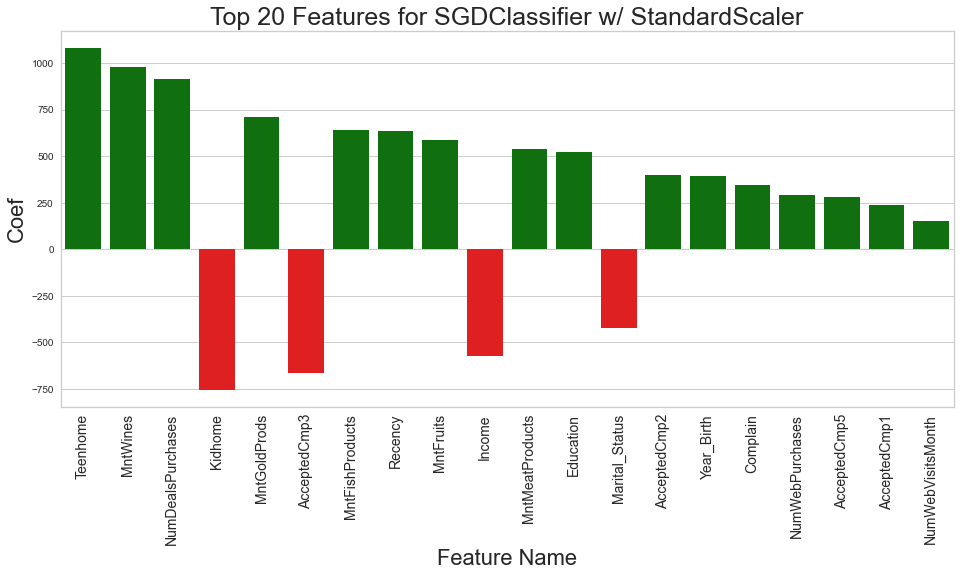

Mean Training Accuracy: 0.7074961398425438 | Standard Deviation: 0.27523625069984115
Mean Validation Accuracy: 0.7127408884638082 | Standard Deviation: 0.27523625069984115




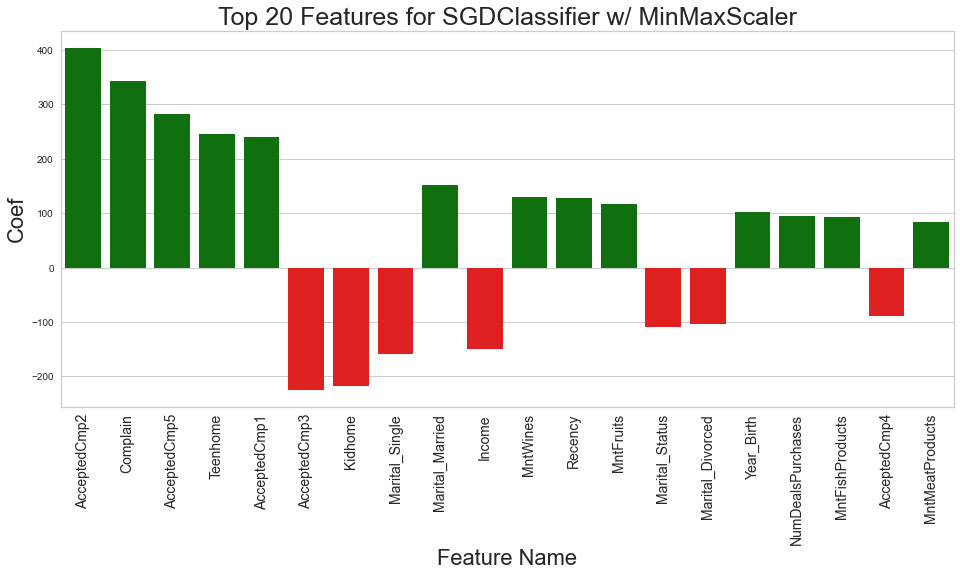

Mean Training Accuracy: 0.847575821117444 | Standard Deviation: 0.014564758662263538
Mean Validation Accuracy: 0.847565169613968 | Standard Deviation: 0.014564758662263538




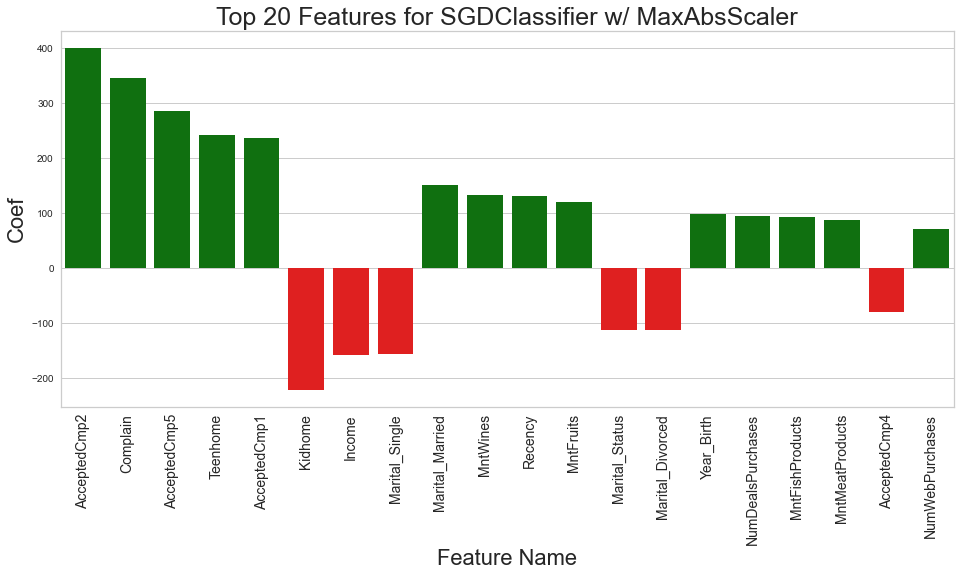

Mean Training Accuracy: 0.7074961398425438 | Standard Deviation: 0.27523625069984115
Mean Validation Accuracy: 0.7127408884638082 | Standard Deviation: 0.27523625069984115




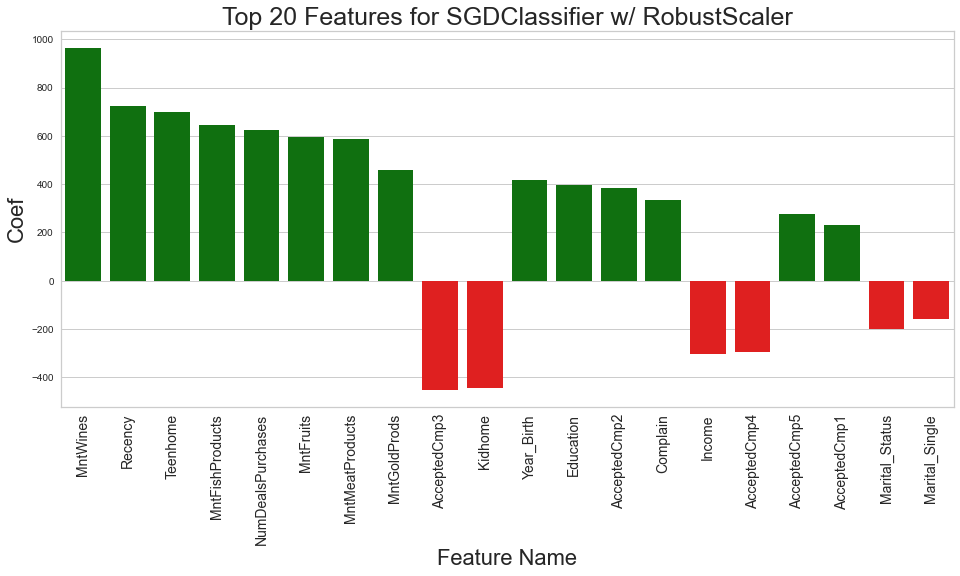

LinearSVC
Mean Training Accuracy: 0.8474163314842702 | Standard Deviation: 0.014936755973749322
Mean Validation Accuracy: 0.8469261919781852 | Standard Deviation: 0.014936755973749322




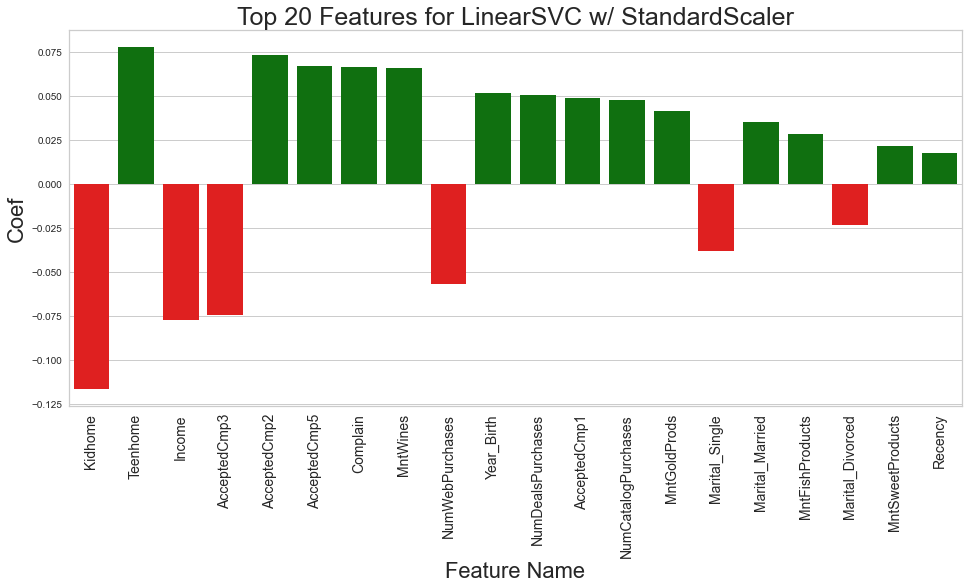

Mean Training Accuracy: 0.7097767780552432 | Standard Deviation: 0.2820534576144495
Mean Validation Accuracy: 0.7036161250279808 | Standard Deviation: 0.2820534576144495




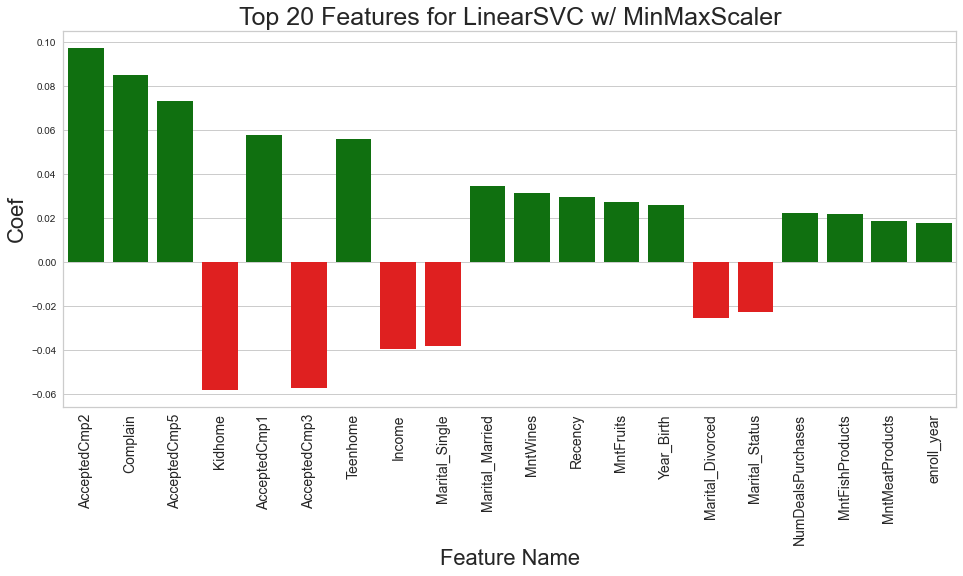

Mean Training Accuracy: 0.5709727596789874 | Standard Deviation: 0.34198973498600493
Mean Validation Accuracy: 0.5636922325553001 | Standard Deviation: 0.34198973498600493




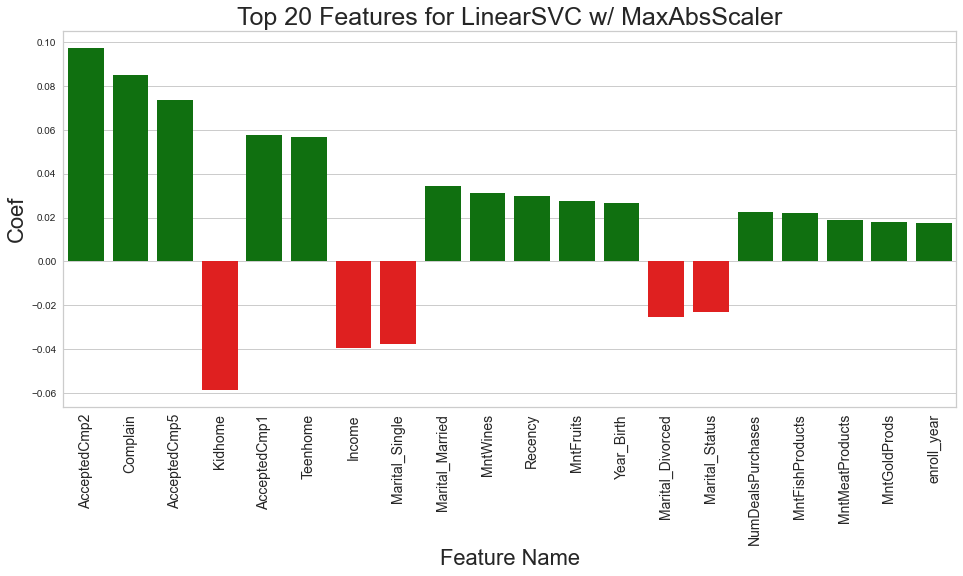

Mean Training Accuracy: 0.847575821117444 | Standard Deviation: 0.014564758662263538
Mean Validation Accuracy: 0.847565169613968 | Standard Deviation: 0.014564758662263538




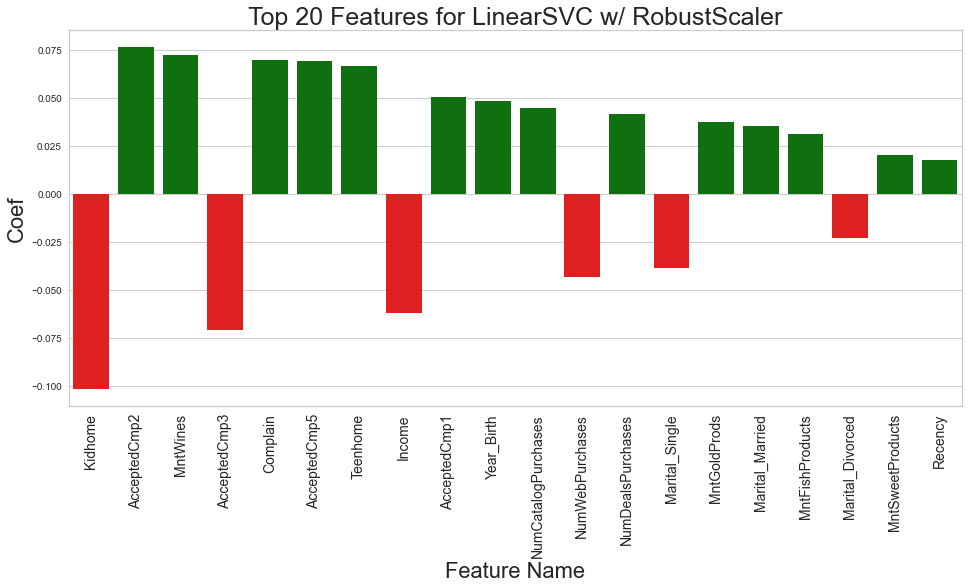

GaussianProcessClassifier
Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.011613309007112839
Mean Validation Accuracy: 0.8552349362039845 | Standard Deviation: 0.011613309007112839


Cannot extract feature importance, skipping


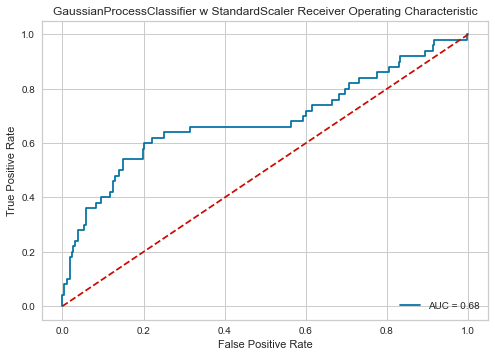

Mean Training Accuracy: 0.9072061355852507 | Standard Deviation: 0.015043220373519543
Mean Validation Accuracy: 0.853948841089925 | Standard Deviation: 0.015043220373519543


Cannot extract feature importance, skipping


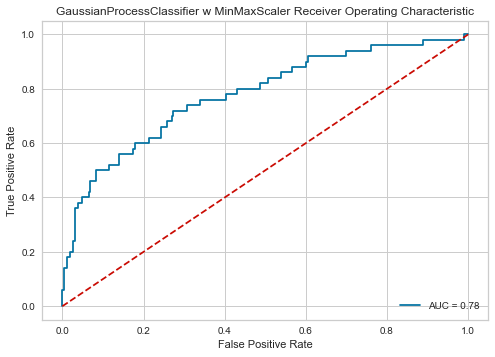

Mean Training Accuracy: 0.9048146806712545 | Standard Deviation: 0.014367576589389076
Mean Validation Accuracy: 0.8545878187257078 | Standard Deviation: 0.014367576589389076


Cannot extract feature importance, skipping


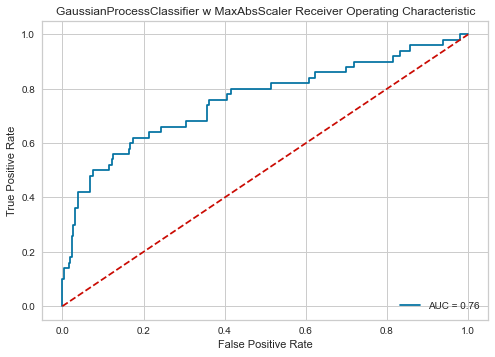

Mean Training Accuracy: 0.990911886743298 | Standard Deviation: 0.015001768637999832
Mean Validation Accuracy: 0.8564986467511855 | Standard Deviation: 0.015001768637999832


Cannot extract feature importance, skipping


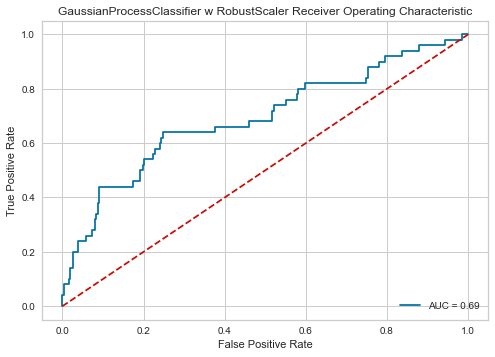

ExtraTreeClassifier
Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.03213165166578632
Mean Validation Accuracy: 0.809297735088826 | Standard Deviation: 0.03213165166578632




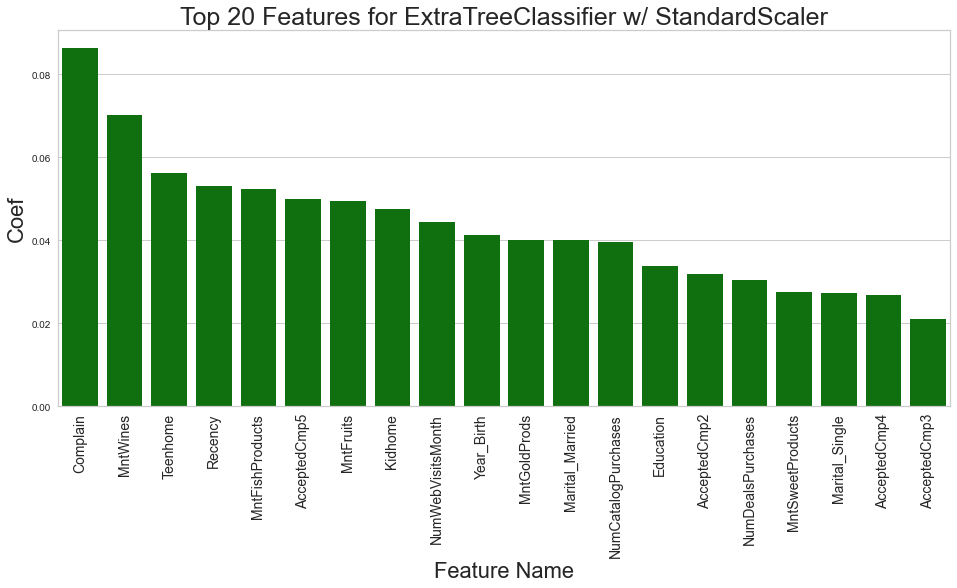

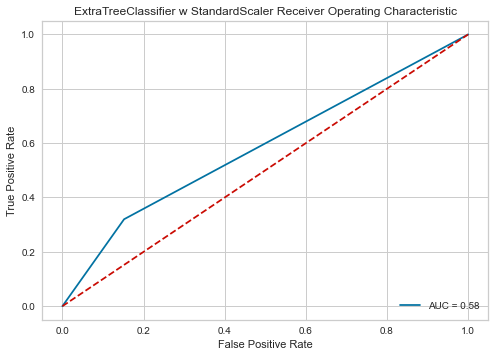

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.020523193411597505
Mean Validation Accuracy: 0.8150587086139884 | Standard Deviation: 0.020523193411597505




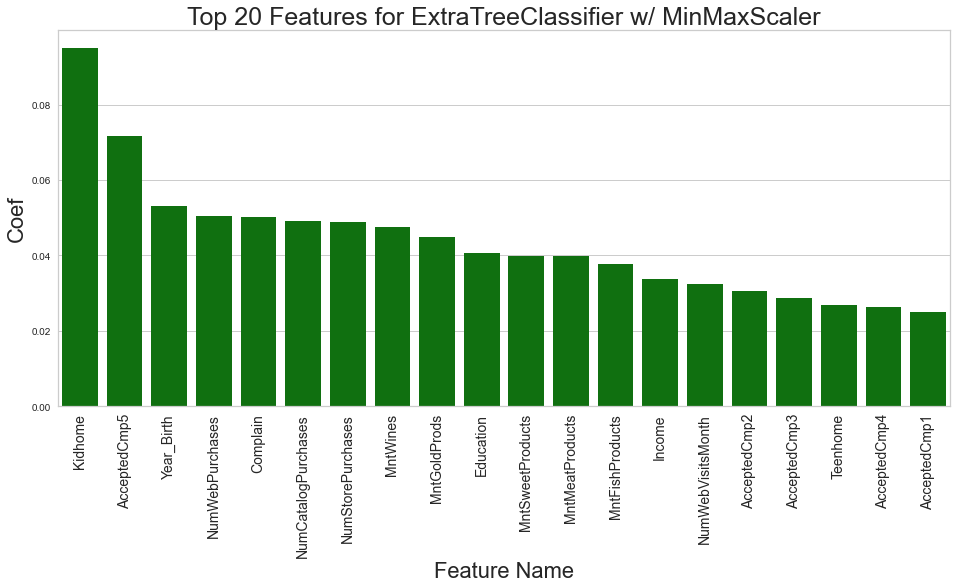

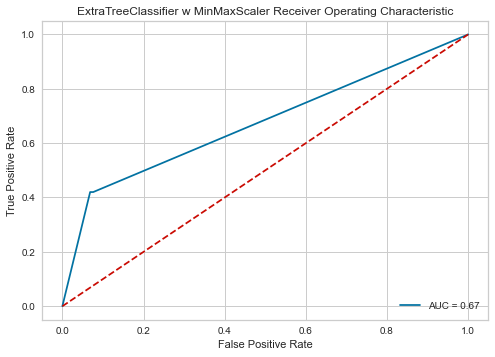

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.011247473495387326
Mean Validation Accuracy: 0.8373700168901731 | Standard Deviation: 0.011247473495387326




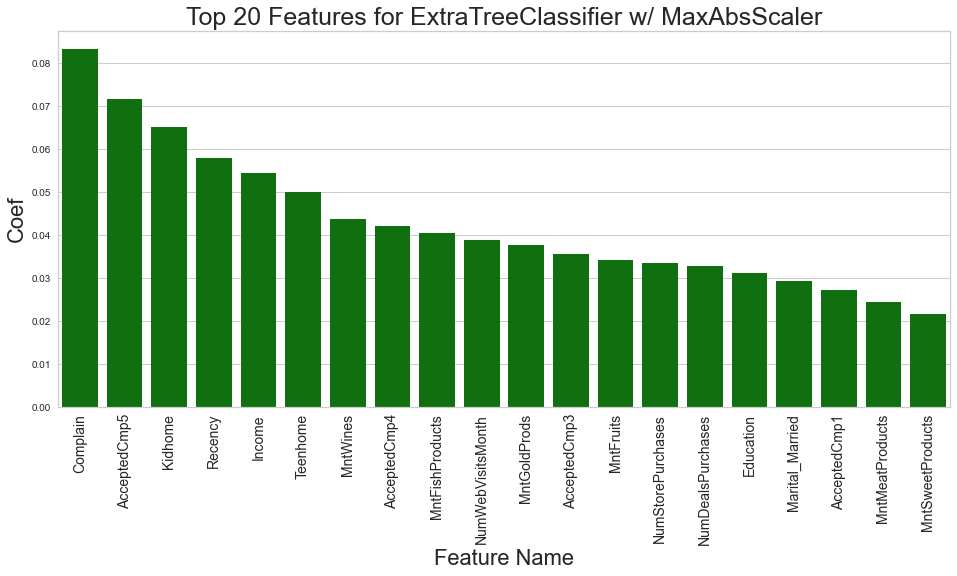

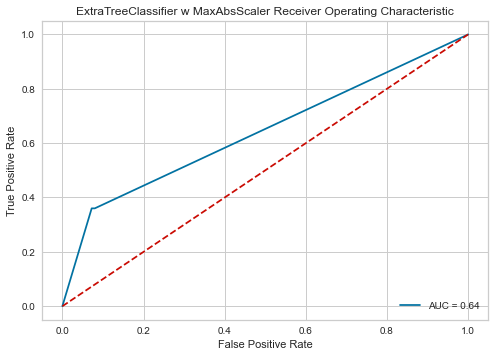

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.017864343632510736
Mean Validation Accuracy: 0.8265419914124662 | Standard Deviation: 0.017864343632510736




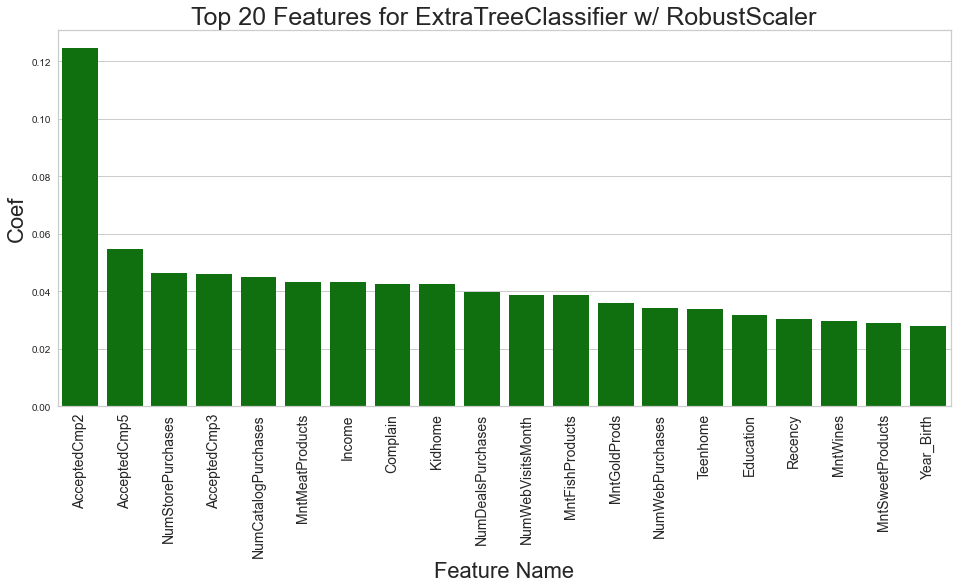

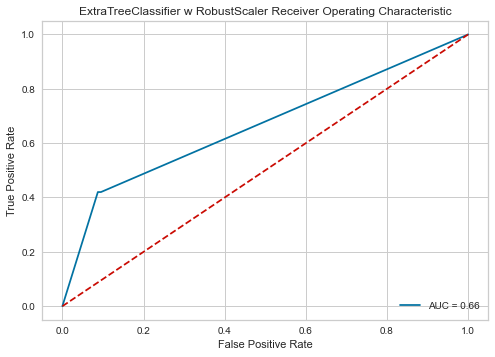

BernoulliNB
Mean Training Accuracy: 0.7610009086461174 | Standard Deviation: 0.022062090708500397
Mean Validation Accuracy: 0.7589426344600232 | Standard Deviation: 0.022062090708500397




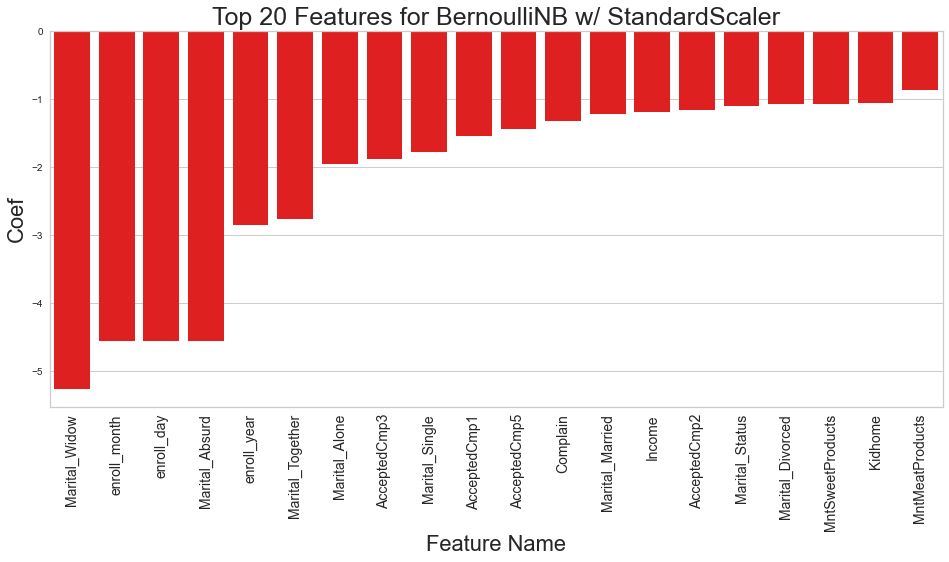

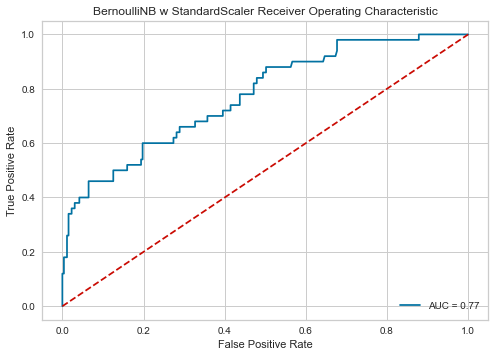

Mean Training Accuracy: 0.8706944470920147 | Standard Deviation: 0.00878029127271757
Mean Validation Accuracy: 0.8648053560163611 | Standard Deviation: 0.00878029127271757




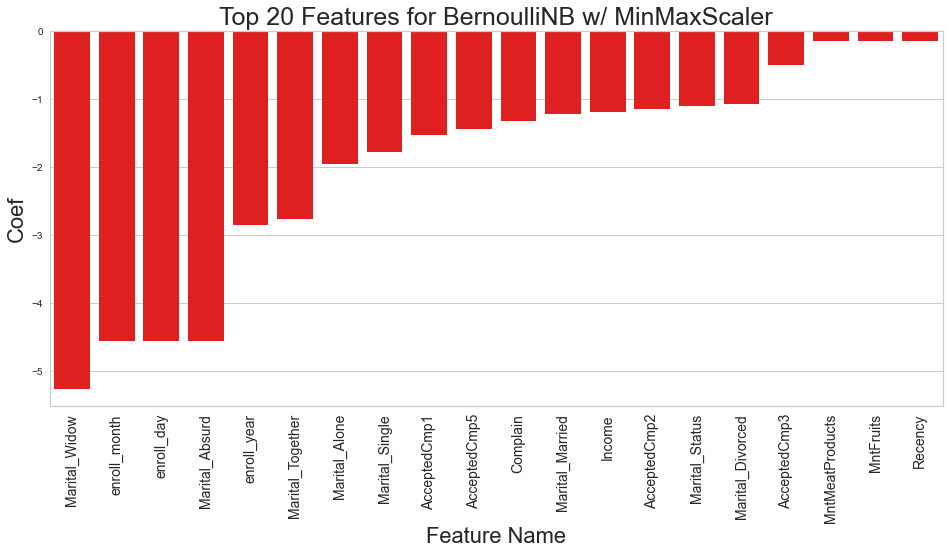

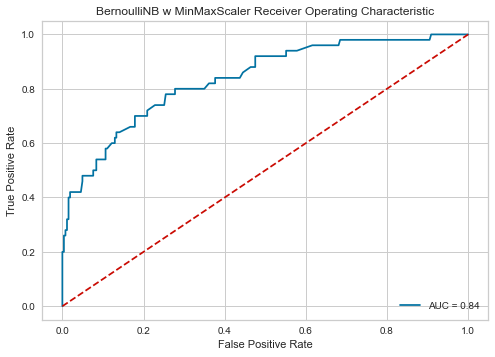

Mean Training Accuracy: 0.8667089854298912 | Standard Deviation: 0.012679444959147357
Mean Validation Accuracy: 0.8673633015201154 | Standard Deviation: 0.012679444959147357




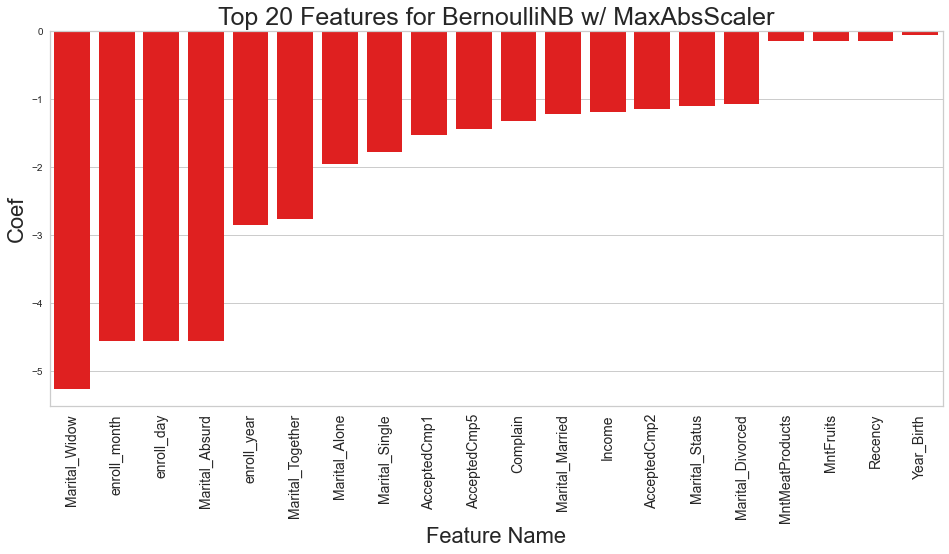

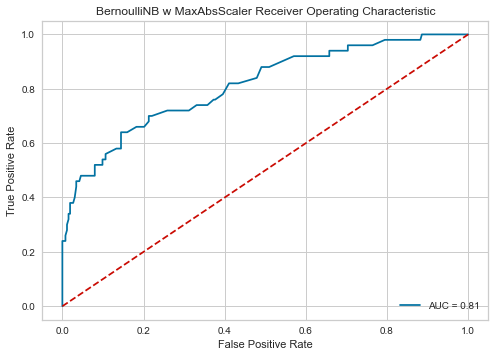

Mean Training Accuracy: 0.7458547309962701 | Standard Deviation: 0.025761554737515874
Mean Validation Accuracy: 0.7372703038196211 | Standard Deviation: 0.025761554737515874




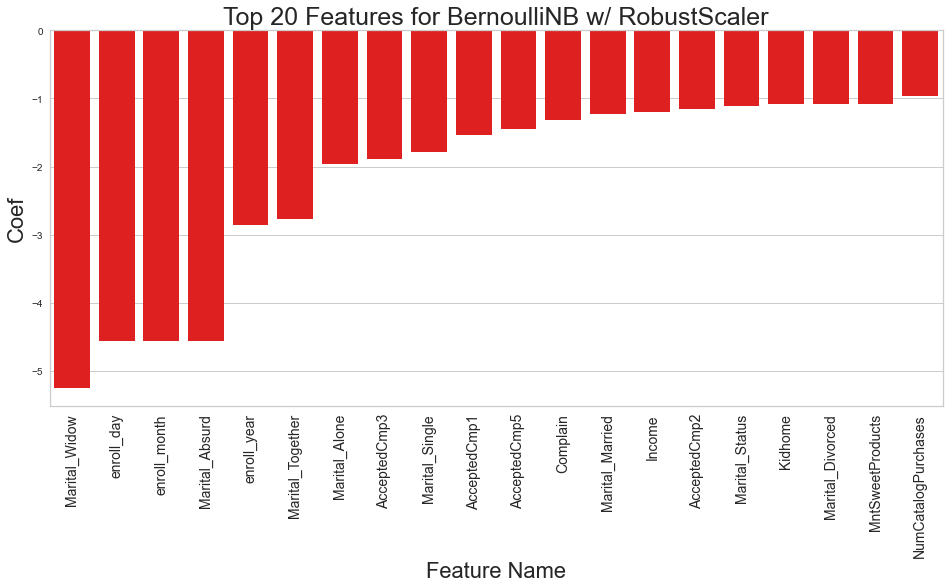

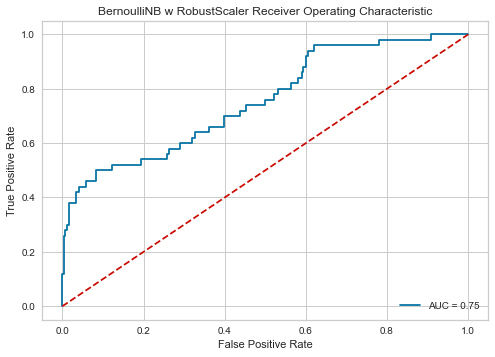

LogisticRegressionCV
Mean Training Accuracy: 0.8982771307116033 | Standard Deviation: 0.011020196563471031
Mean Validation Accuracy: 0.8890213874361532 | Standard Deviation: 0.011020196563471031




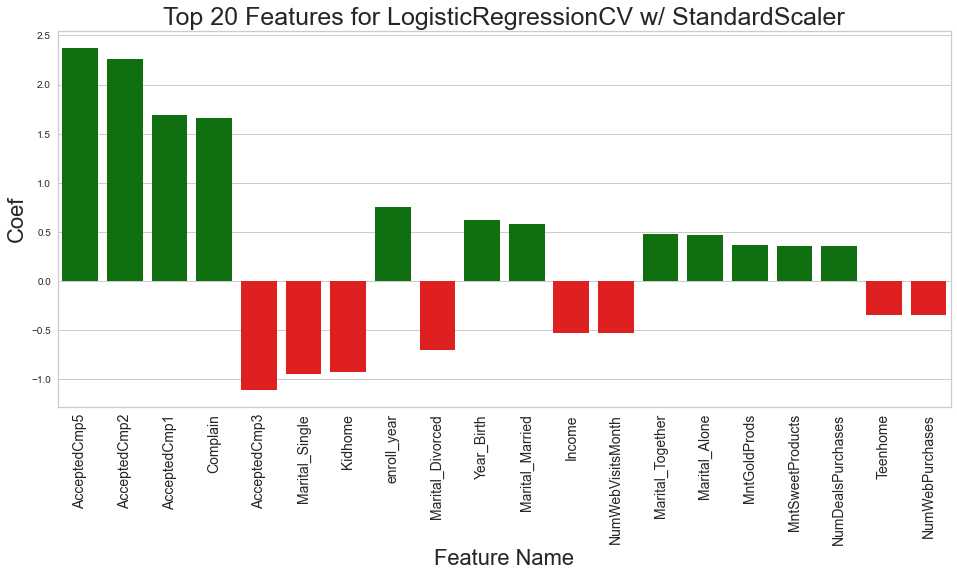

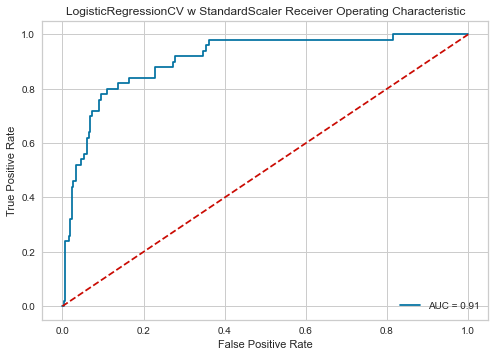

Mean Training Accuracy: 0.8982768765448572 | Standard Deviation: 0.010583460256933512
Mean Validation Accuracy: 0.8883824098003703 | Standard Deviation: 0.010583460256933512




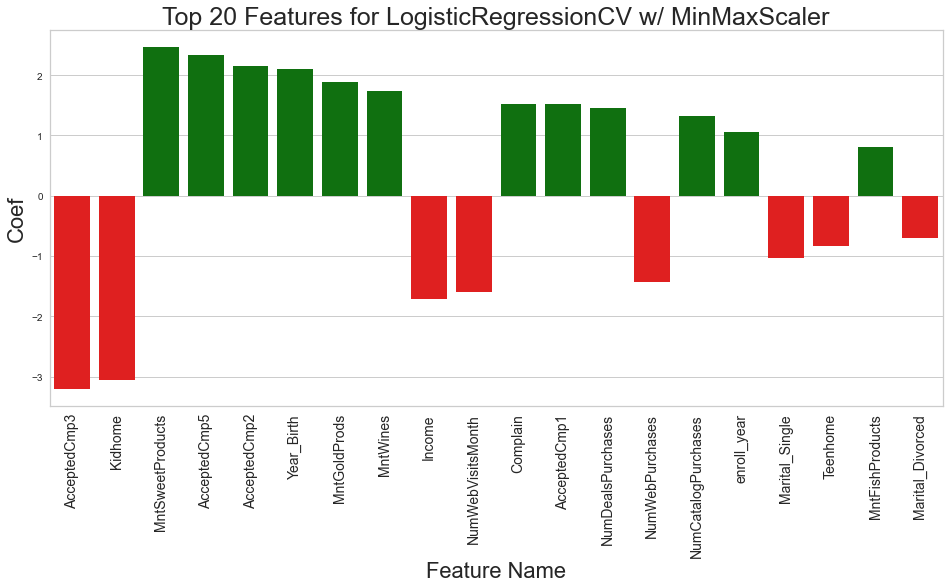

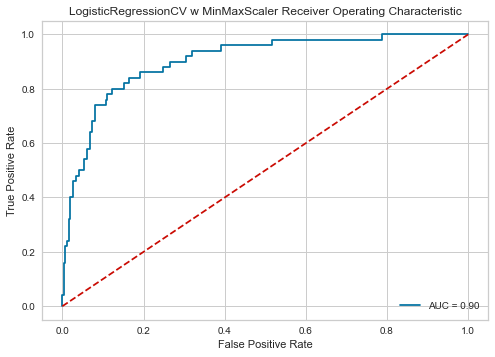

Mean Training Accuracy: 0.8895090133882334 | Standard Deviation: 0.013382207105385277
Mean Validation Accuracy: 0.8864715817748927 | Standard Deviation: 0.013382207105385277




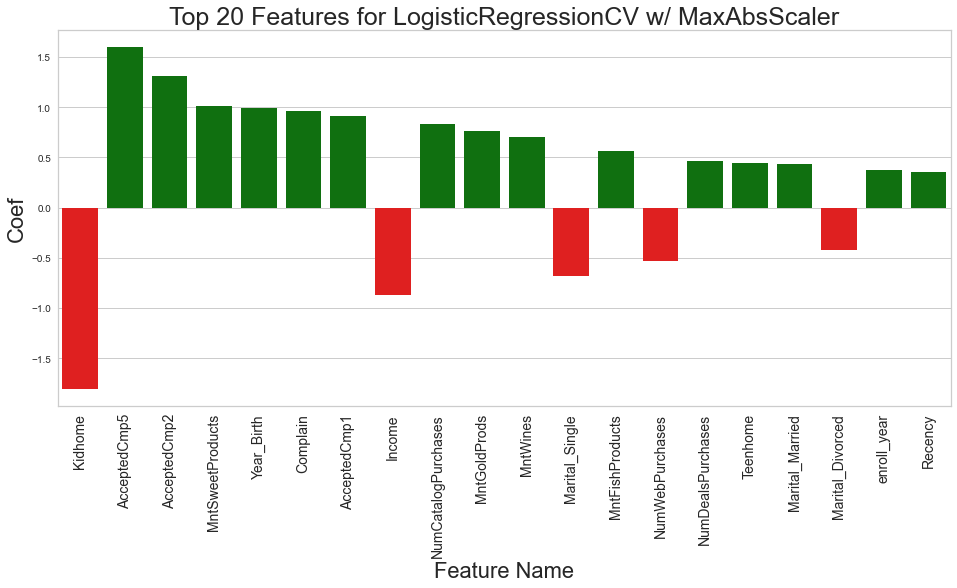

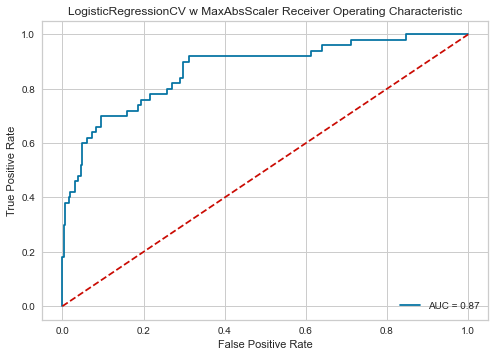

Mean Training Accuracy: 0.8976389180121618 | Standard Deviation: 0.010240246588726494
Mean Validation Accuracy: 0.8909362853828778 | Standard Deviation: 0.010240246588726494




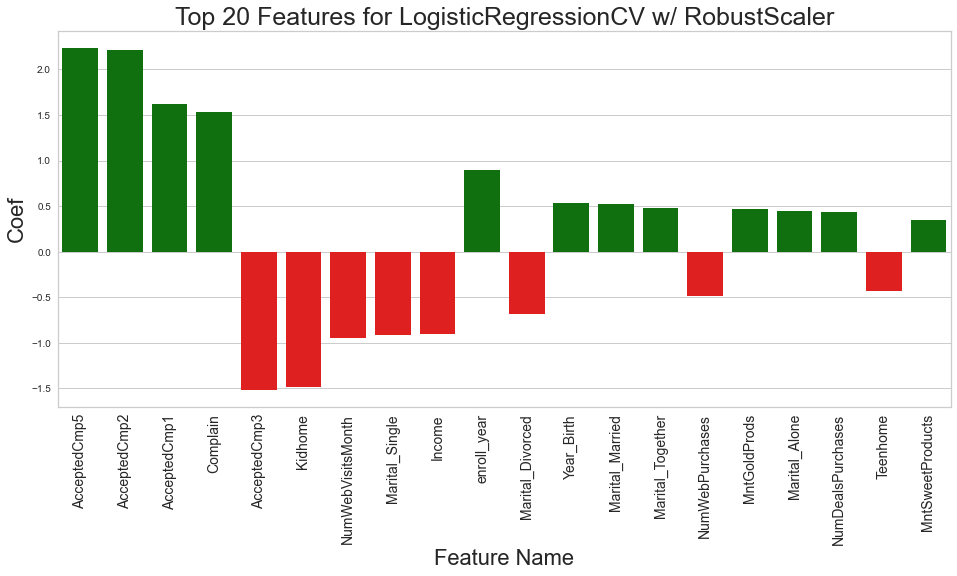

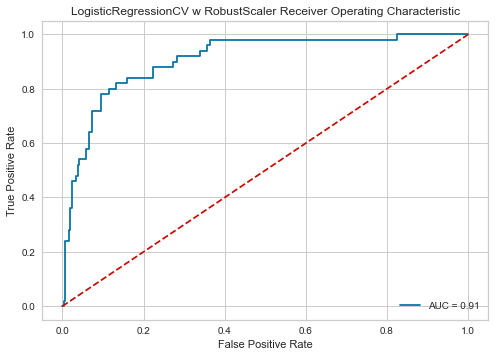

RidgeClassifier
Mean Training Accuracy: 0.8971609574461326 | Standard Deviation: 0.009435828249731666
Mean Validation Accuracy: 0.8928511833296024 | Standard Deviation: 0.009435828249731666




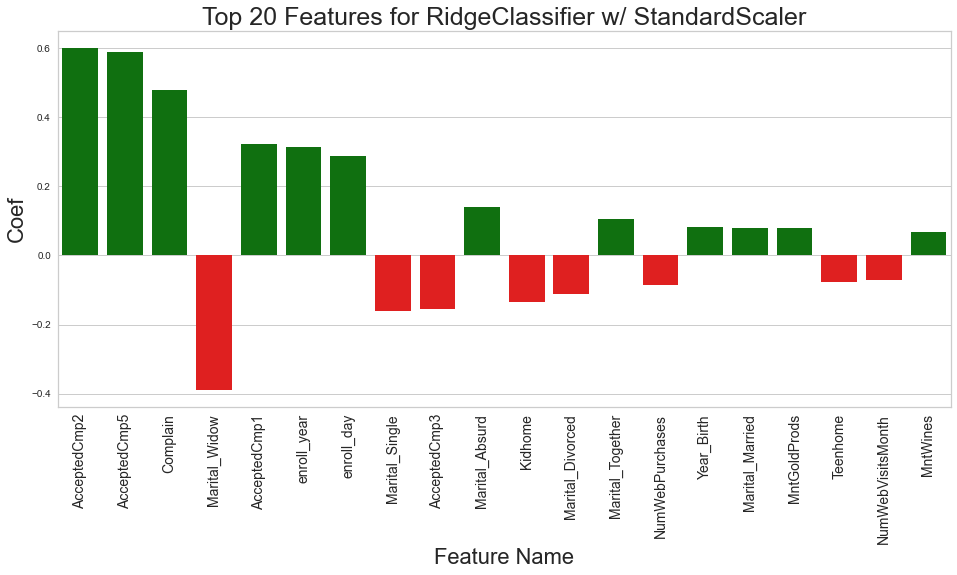

Mean Training Accuracy: 0.8970019761464508 | Standard Deviation: 0.009502353168054888
Mean Validation Accuracy: 0.8915772979792841 | Standard Deviation: 0.009502353168054888




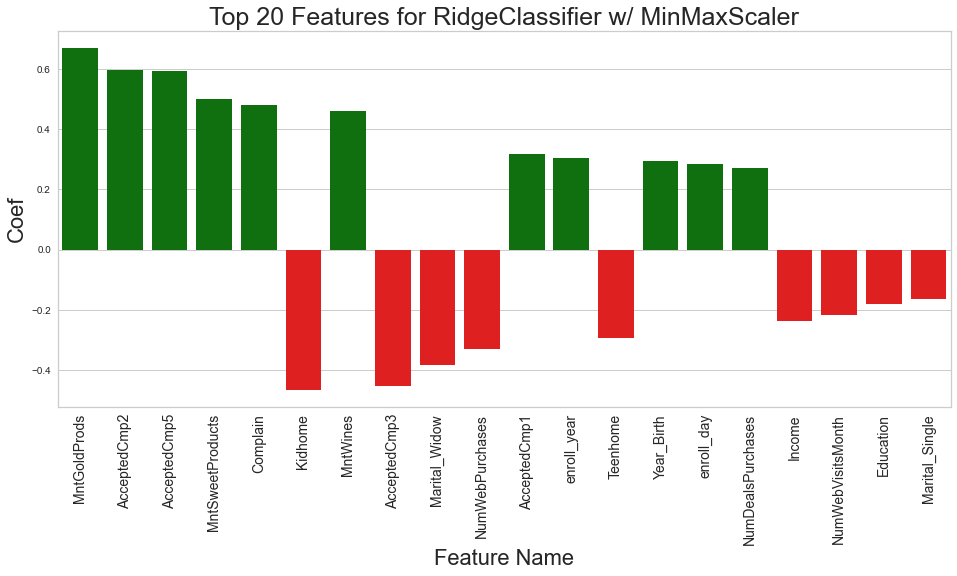

Mean Training Accuracy: 0.8898269759875965 | Standard Deviation: 0.015202074694949242
Mean Validation Accuracy: 0.8800960501414299 | Standard Deviation: 0.015202074694949242




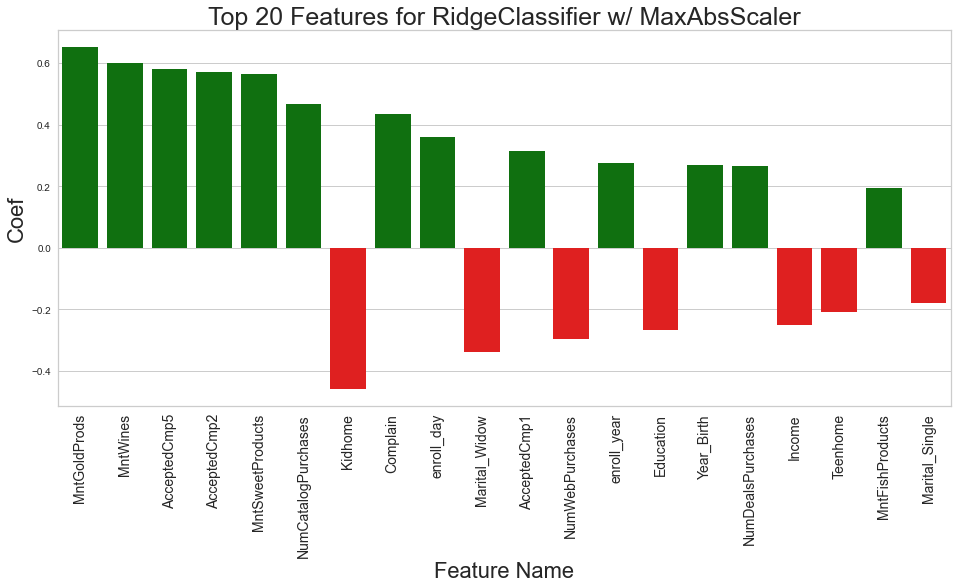

Mean Training Accuracy: 0.8970015948963317 | Standard Deviation: 0.009435828249731666
Mean Validation Accuracy: 0.8928511833296024 | Standard Deviation: 0.009435828249731666




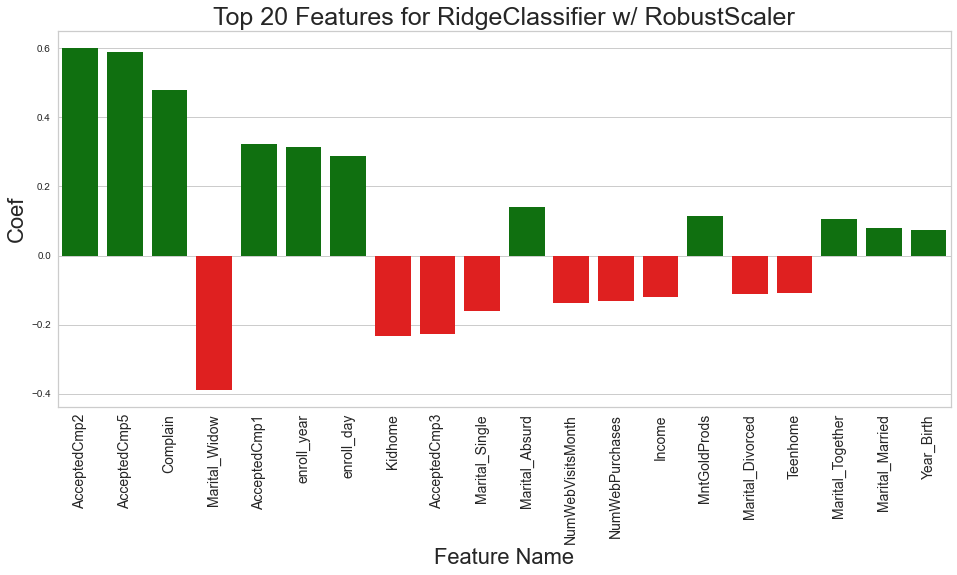

SVC
Mean Training Accuracy: 0.8976396805124001 | Standard Deviation: 0.009173207497694992
Mean Validation Accuracy: 0.8890254573574001 | Standard Deviation: 0.009173207497694992




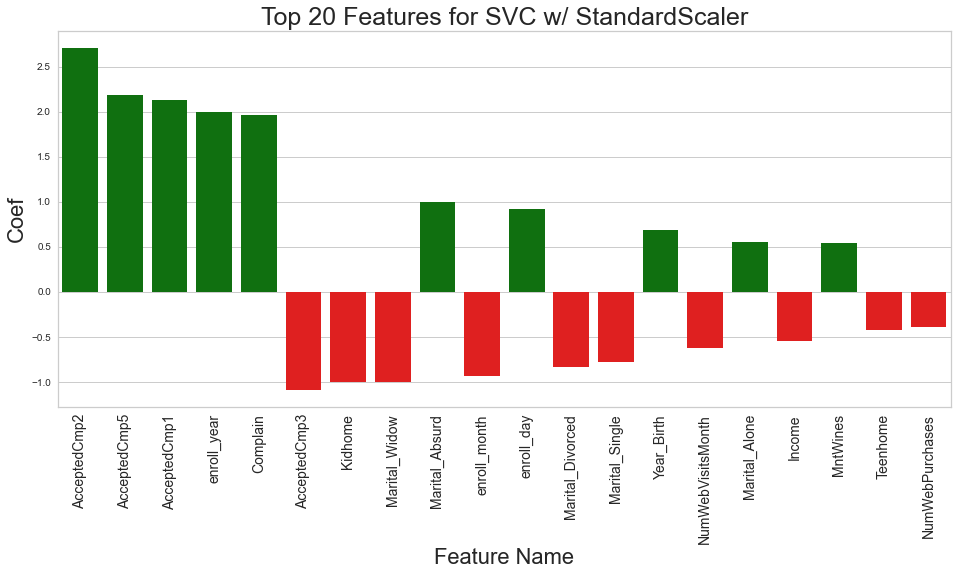

Mean Training Accuracy: 0.8979584056120018 | Standard Deviation: 0.012476465560304018
Mean Validation Accuracy: 0.8877556419283286 | Standard Deviation: 0.012476465560304018




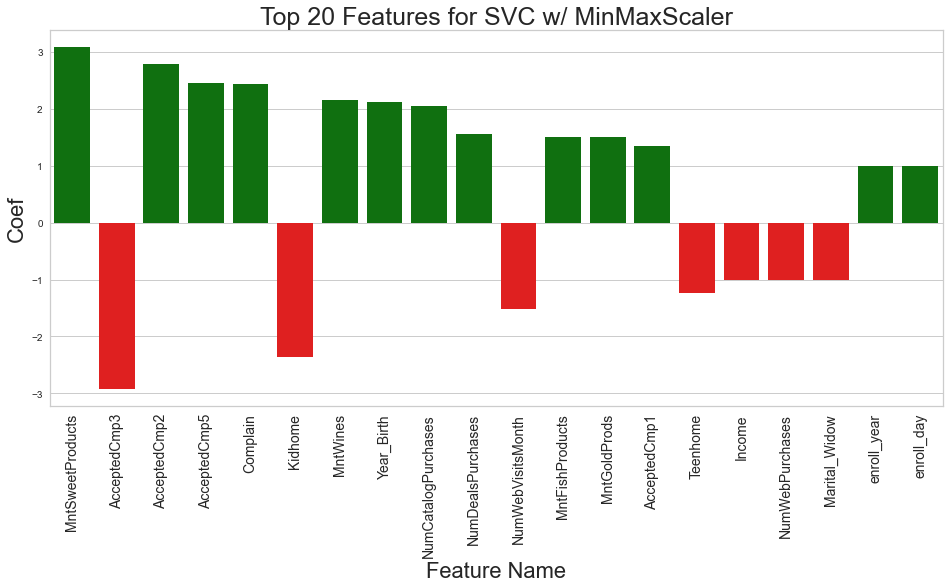

Mean Training Accuracy: 0.8899865927041436 | Standard Deviation: 0.017996585443669357
Mean Validation Accuracy: 0.8864756516961396 | Standard Deviation: 0.017996585443669357




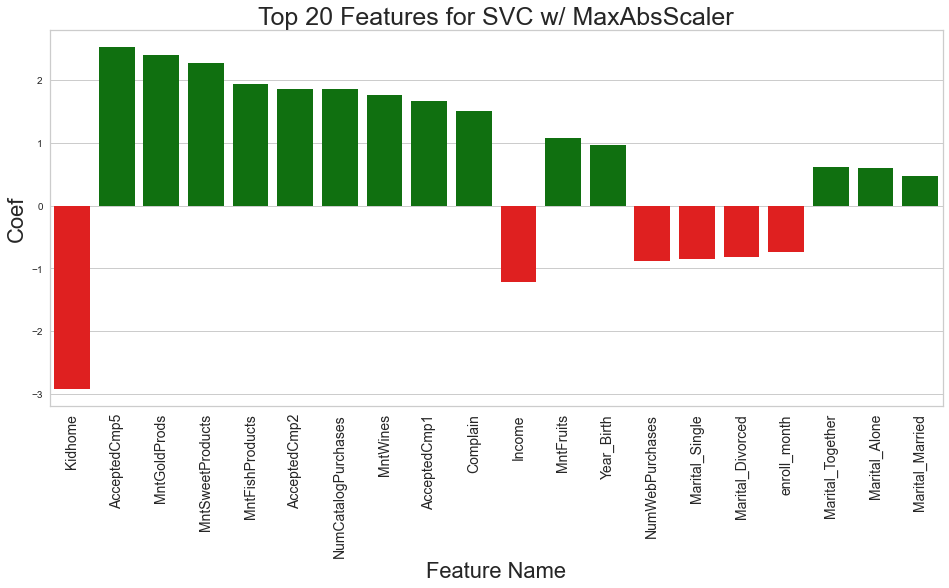

Mean Training Accuracy: 0.8970018490630778 | Standard Deviation: 0.010497954186095355
Mean Validation Accuracy: 0.8922061008119494 | Standard Deviation: 0.010497954186095355




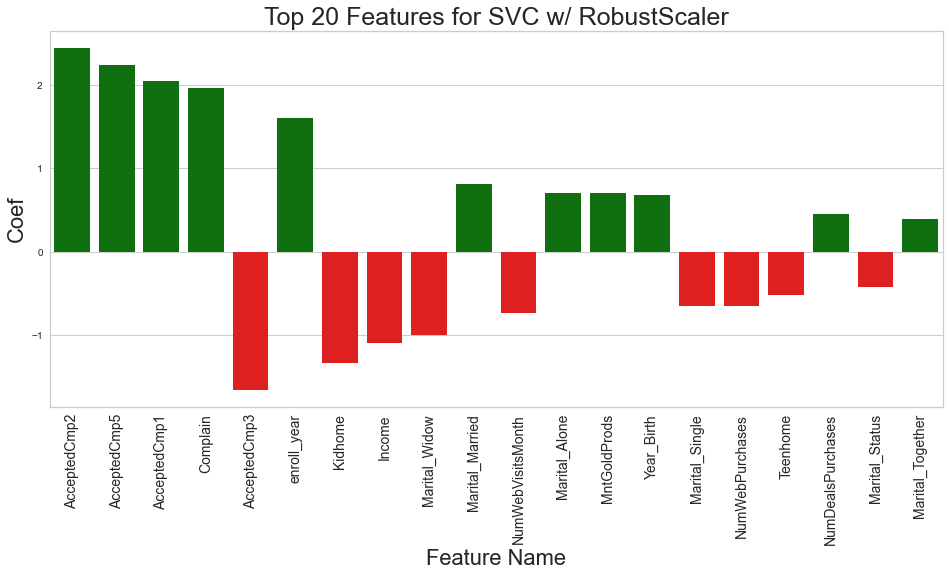

Perceptron
Mean Training Accuracy: 0.848692248549661 | Standard Deviation: 0.009793829347861093
Mean Validation Accuracy: 0.8411957428623756 | Standard Deviation: 0.009793829347861093




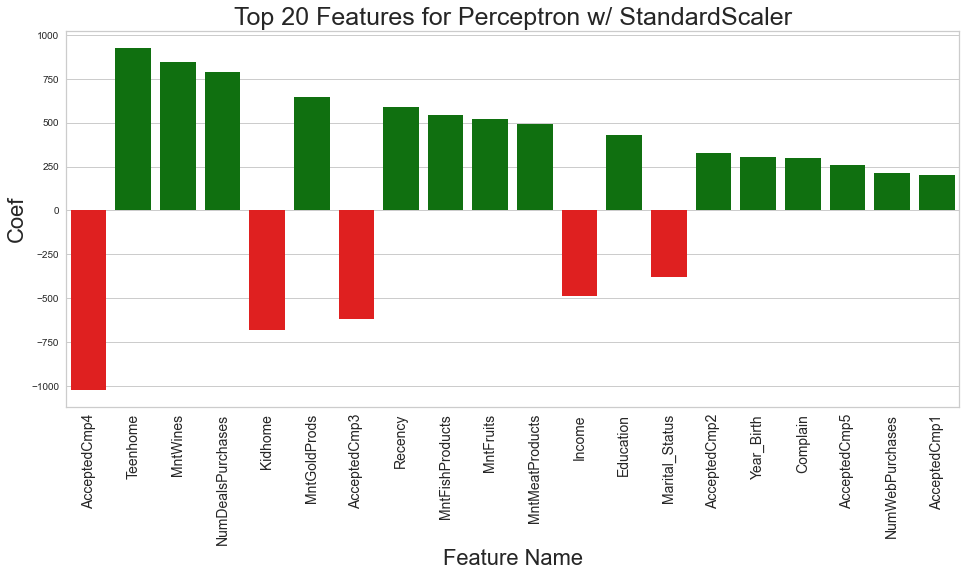

Mean Training Accuracy: 0.847575821117444 | Standard Deviation: 0.014564758662263538
Mean Validation Accuracy: 0.847565169613968 | Standard Deviation: 0.014564758662263538




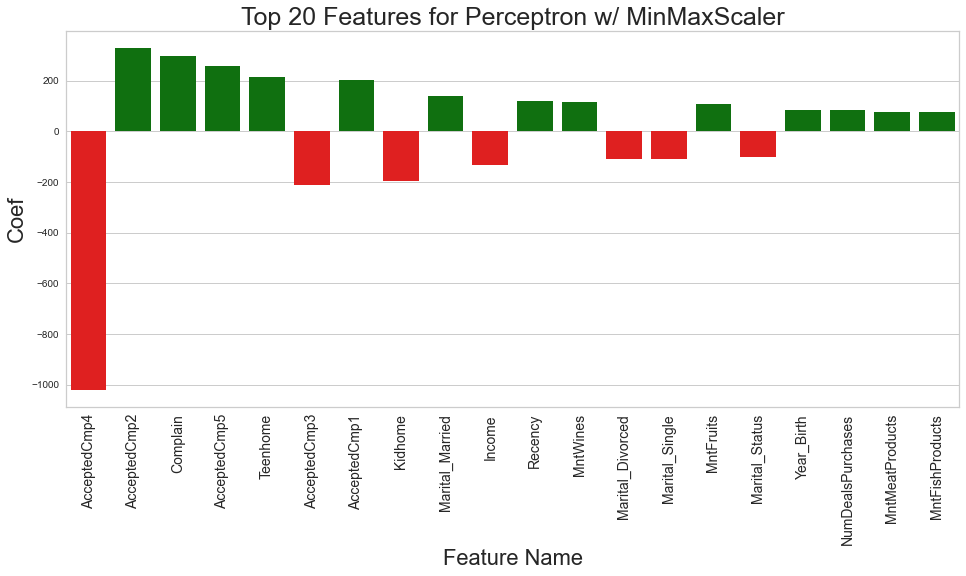

Mean Training Accuracy: 0.847575821117444 | Standard Deviation: 0.014564758662263538
Mean Validation Accuracy: 0.847565169613968 | Standard Deviation: 0.014564758662263538




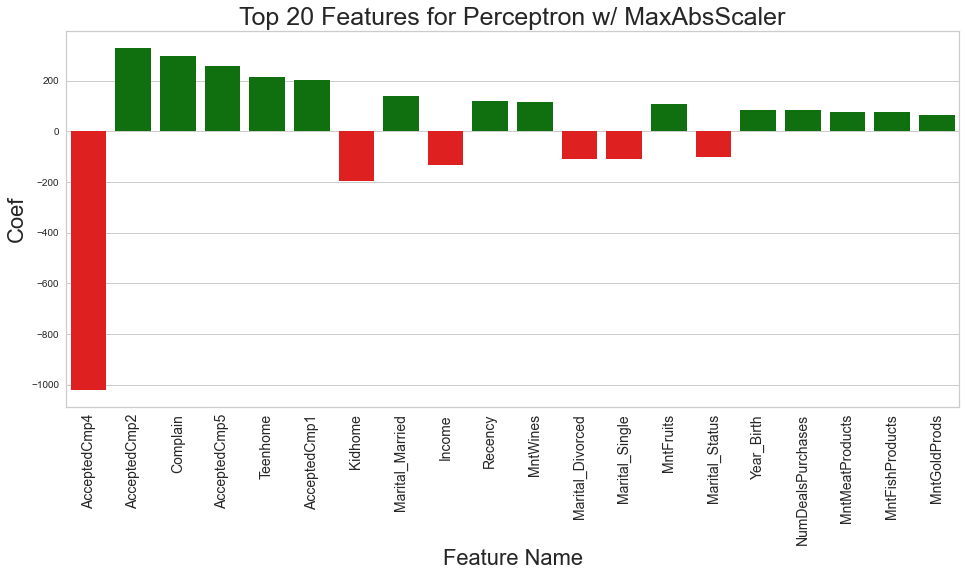

Mean Training Accuracy: 0.8435917573724243 | Standard Deviation: 0.0135855053322937
Mean Validation Accuracy: 0.850121080157099 | Standard Deviation: 0.0135855053322937




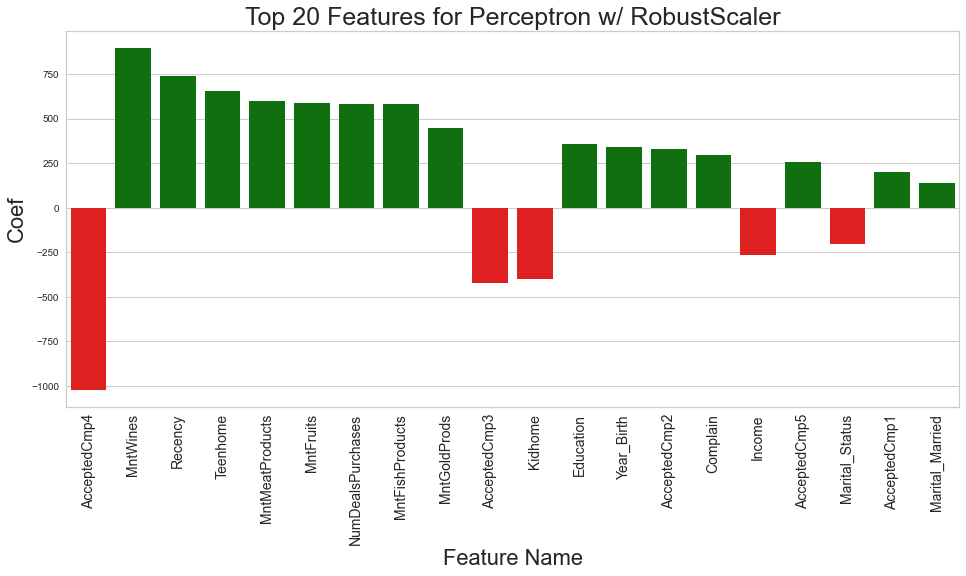

PassiveAggressiveClassifier
Mean Training Accuracy: 0.847575821117444 | Standard Deviation: 0.014564758662263538
Mean Validation Accuracy: 0.847565169613968 | Standard Deviation: 0.014564758662263538




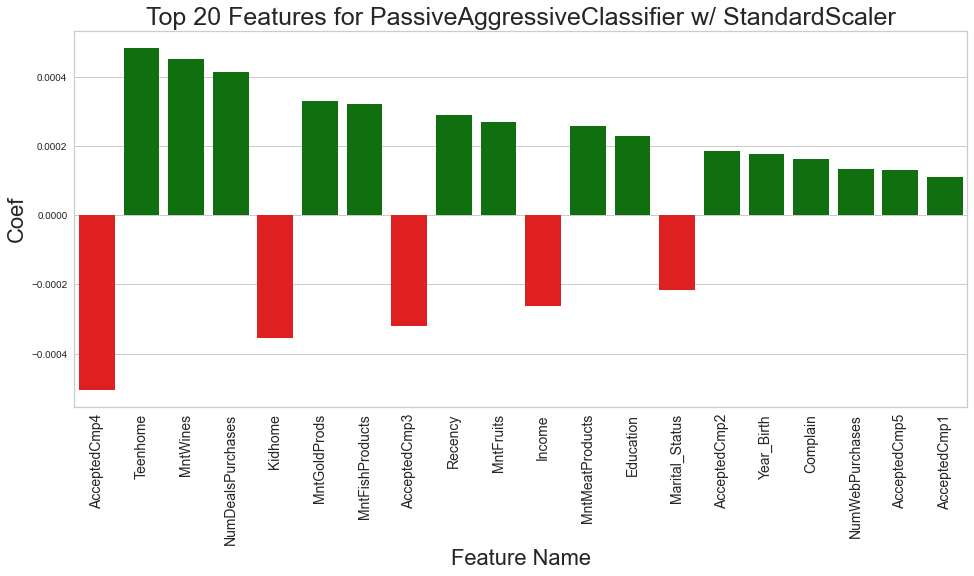

Mean Training Accuracy: 0.7074961398425438 | Standard Deviation: 0.27523625069984115
Mean Validation Accuracy: 0.7127408884638082 | Standard Deviation: 0.27523625069984115




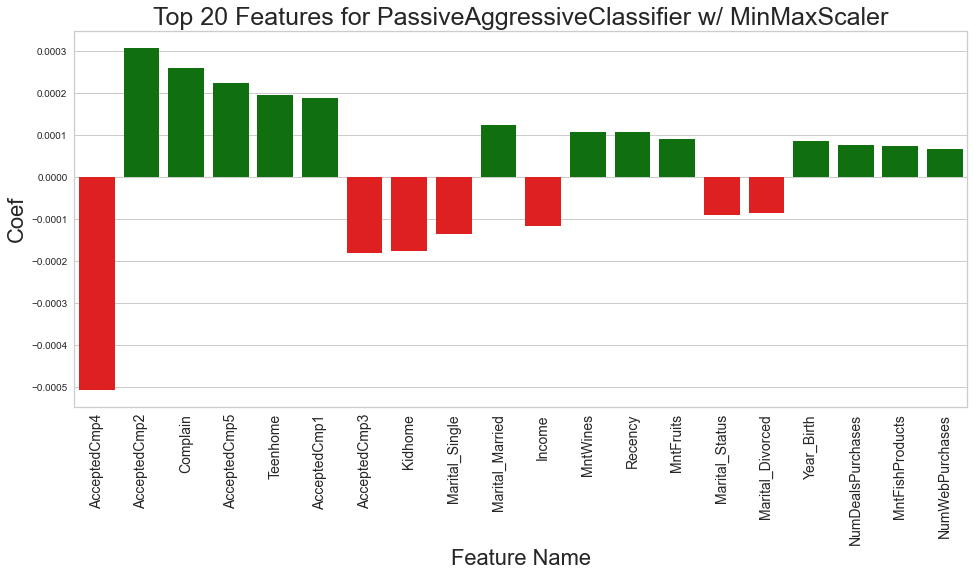

Mean Training Accuracy: 0.5706540345793858 | Standard Deviation: 0.3417492560597874
Mean Validation Accuracy: 0.5649701878268656 | Standard Deviation: 0.3417492560597874




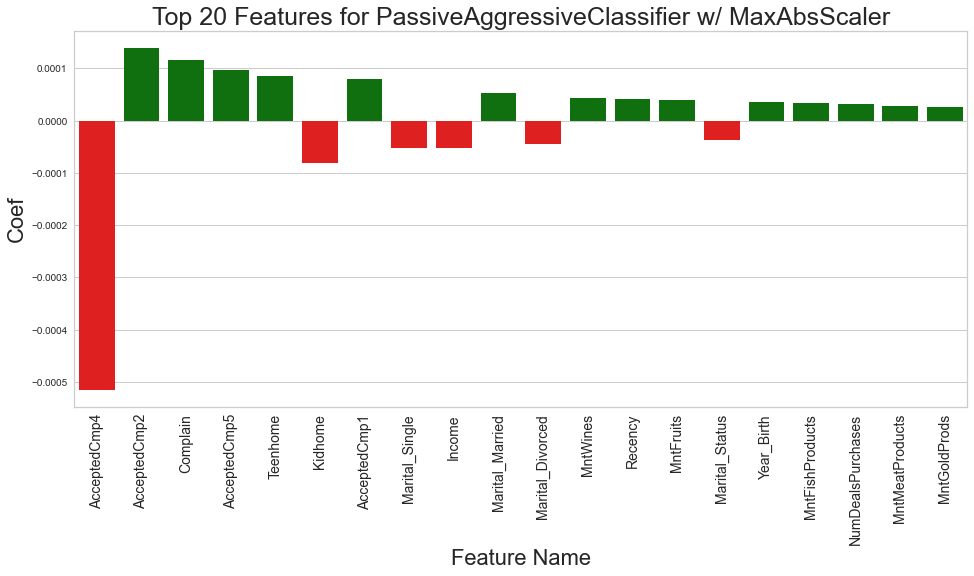

Mean Training Accuracy: 0.5709727596789874 | Standard Deviation: 0.34198973498600493
Mean Validation Accuracy: 0.5636922325553001 | Standard Deviation: 0.34198973498600493




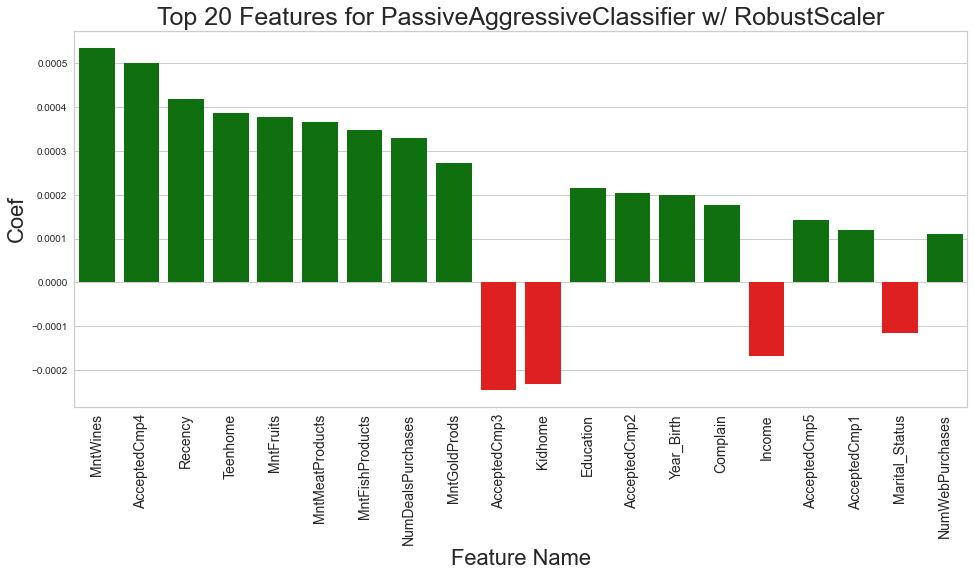

DecisionTreeClassifier
Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.00928903110156377
Mean Validation Accuracy: 0.8386398323192447 | Standard Deviation: 0.00928903110156377




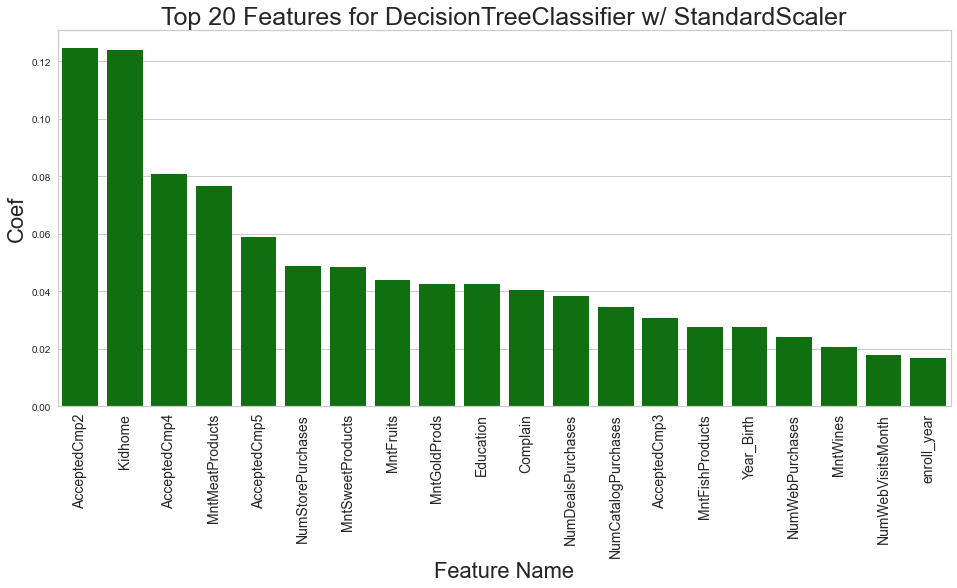

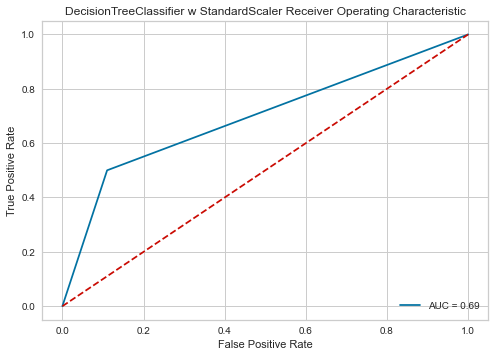

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.007629983299105922
Mean Validation Accuracy: 0.8360879916973607 | Standard Deviation: 0.007629983299105922




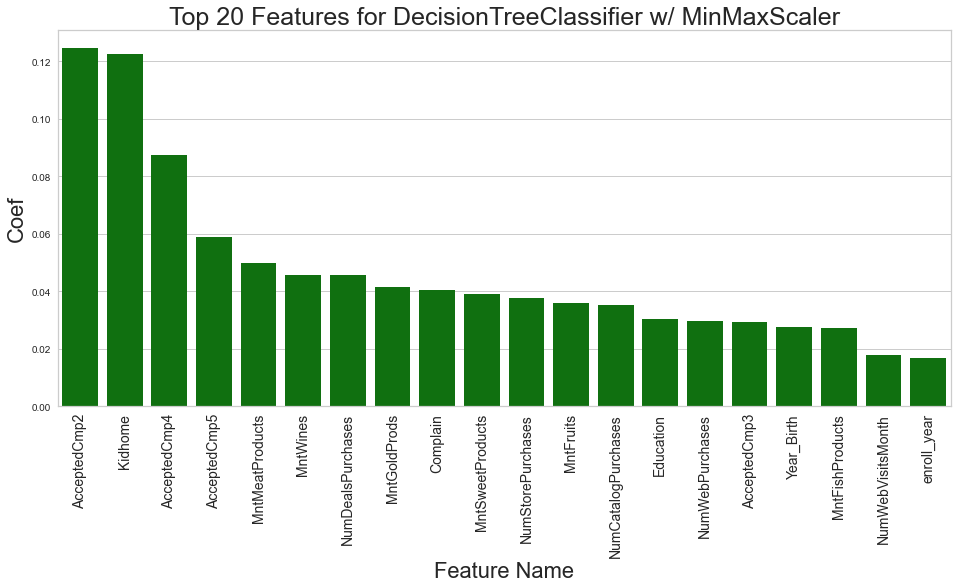

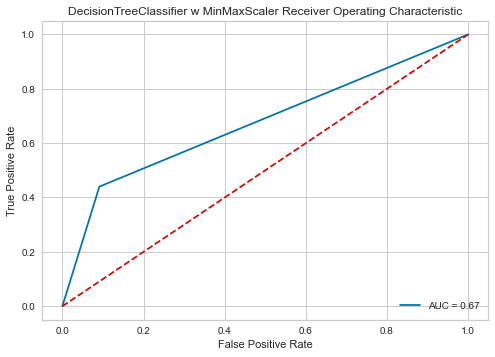

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.0081273117361881
Mean Validation Accuracy: 0.8322622657251582 | Standard Deviation: 0.0081273117361881




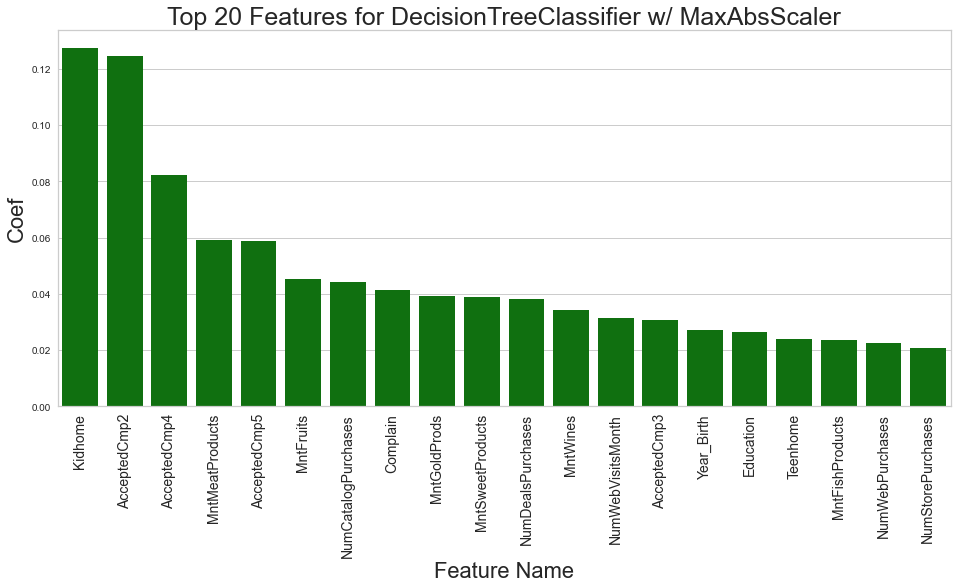

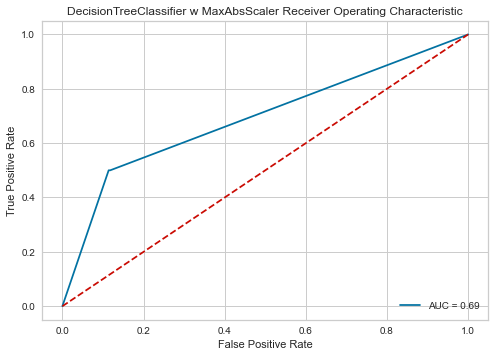

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.014300420785558678
Mean Validation Accuracy: 0.8335463258785942 | Standard Deviation: 0.014300420785558678




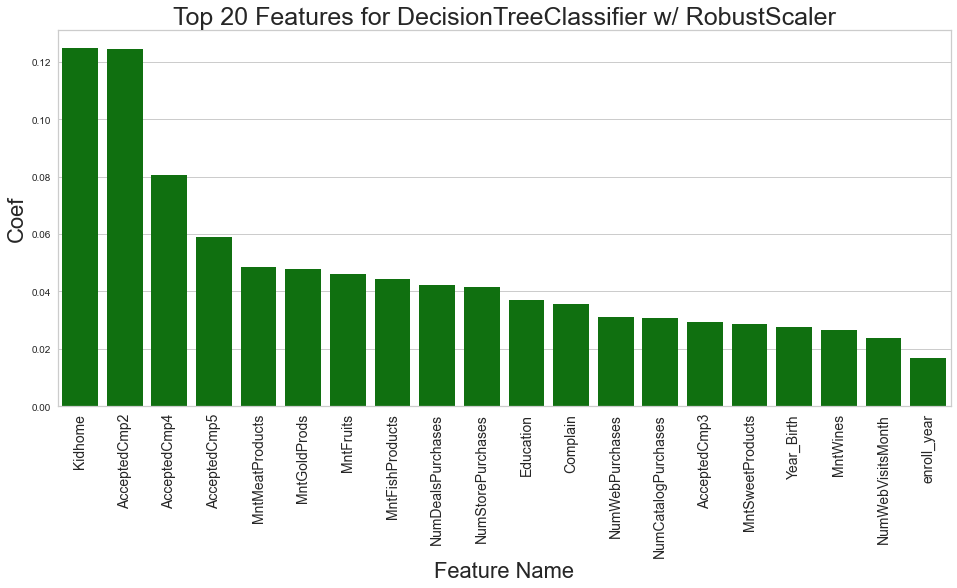

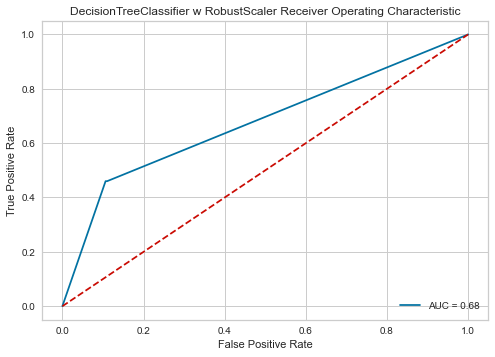

KNeighborsClassifier
Mean Training Accuracy: 0.8783491869841209 | Standard Deviation: 0.012513257315148525
Mean Validation Accuracy: 0.8488532996886511 | Standard Deviation: 0.012513257315148525


Cannot extract feature importance, skipping


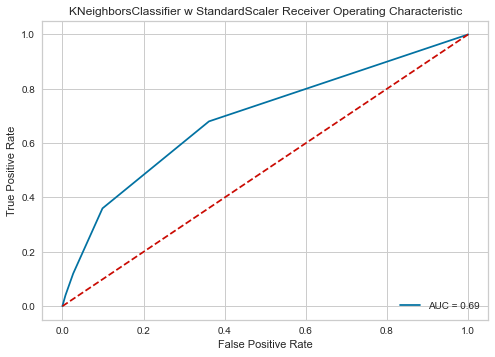

Mean Training Accuracy: 0.8743624544882669 | Standard Deviation: 0.013685700999787427
Mean Validation Accuracy: 0.852668850857736 | Standard Deviation: 0.013685700999787427


Cannot extract feature importance, skipping


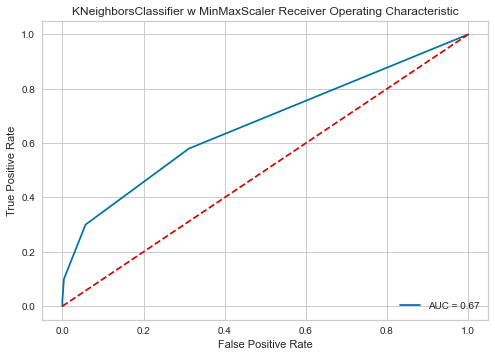

Mean Training Accuracy: 0.8759569695698863 | Standard Deviation: 0.012785130466109261
Mean Validation Accuracy: 0.8539427362080543 | Standard Deviation: 0.012785130466109261


Cannot extract feature importance, skipping


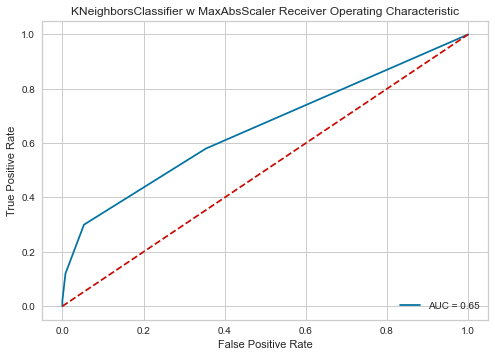

Mean Training Accuracy: 0.875319138120564 | Standard Deviation: 0.016931140941590952
Mean Validation Accuracy: 0.8443723163956778 | Standard Deviation: 0.016931140941590952


Cannot extract feature importance, skipping


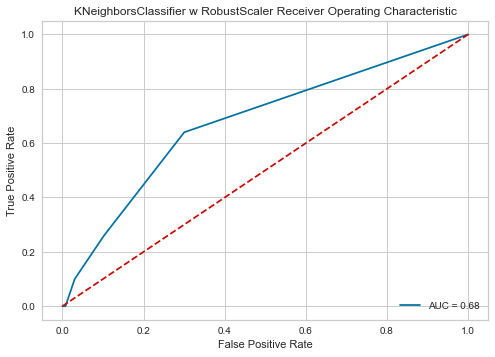

GaussianNB
Mean Training Accuracy: 0.8399232416426796 | Standard Deviation: 0.015425760725036184
Mean Validation Accuracy: 0.8348181762682891 | Standard Deviation: 0.015425760725036184


Cannot extract feature importance, skipping


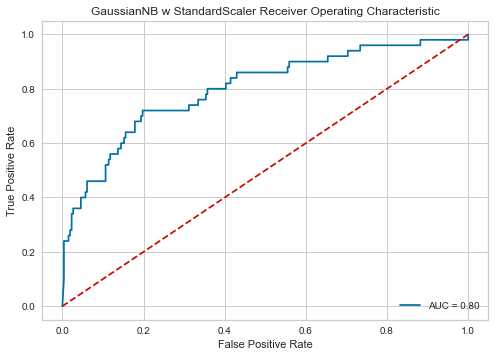

Mean Training Accuracy: 0.8399232416426796 | Standard Deviation: 0.015425760725036184
Mean Validation Accuracy: 0.8348181762682891 | Standard Deviation: 0.015425760725036184


Cannot extract feature importance, skipping


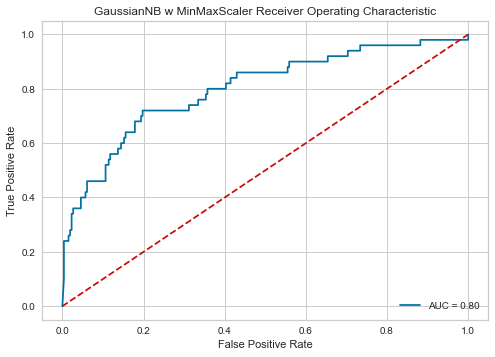

Mean Training Accuracy: 0.8396040082095858 | Standard Deviation: 0.014372960737410269
Mean Validation Accuracy: 0.8354551189434485 | Standard Deviation: 0.014372960737410269


Cannot extract feature importance, skipping


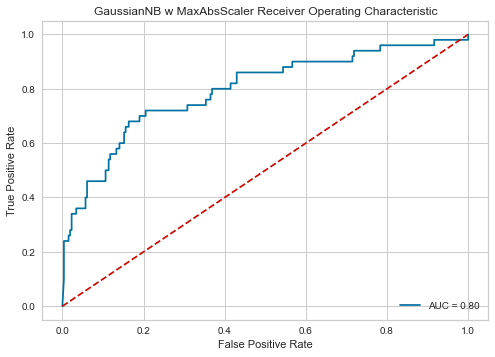

Mean Training Accuracy: 0.8399232416426796 | Standard Deviation: 0.015425760725036184
Mean Validation Accuracy: 0.8348181762682891 | Standard Deviation: 0.015425760725036184


Cannot extract feature importance, skipping


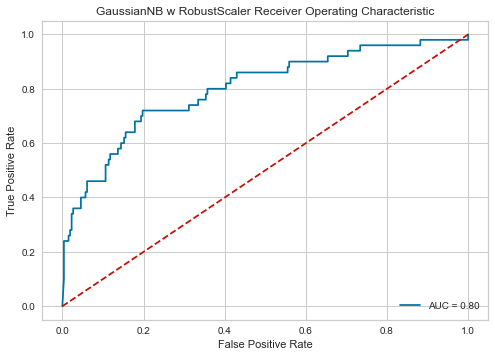

LGBMClassifier
Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.011454965971240254
Mean Validation Accuracy: 0.8807452025803301 | Standard Deviation: 0.011454965971240254




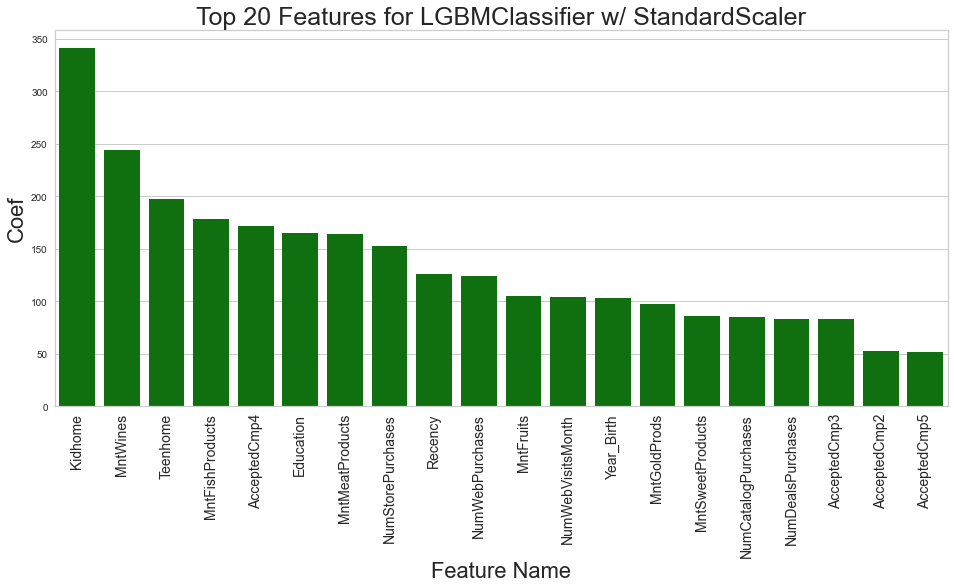

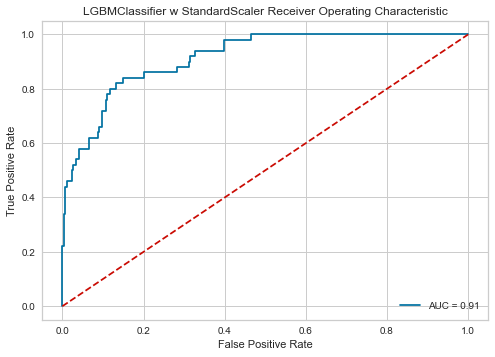

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.008628634747085306
Mean Validation Accuracy: 0.8839339858773734 | Standard Deviation: 0.008628634747085306




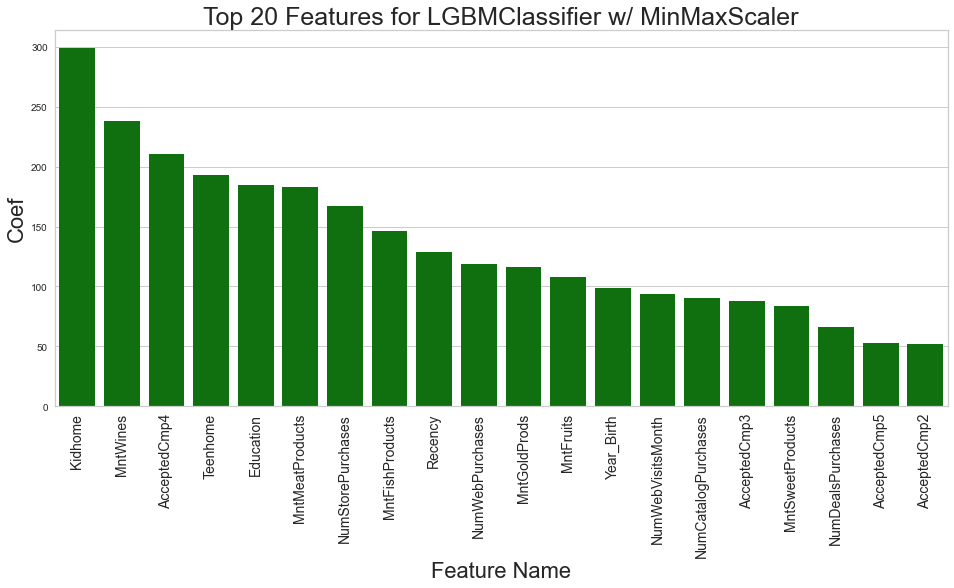

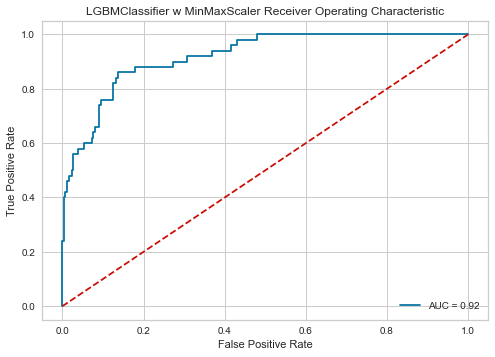

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.008628634747085306
Mean Validation Accuracy: 0.8839339858773734 | Standard Deviation: 0.008628634747085306




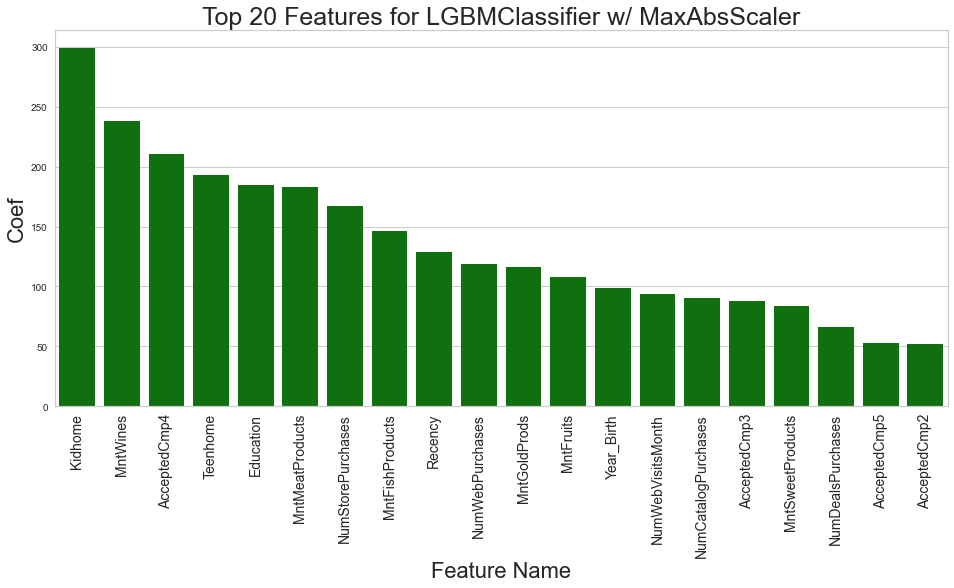

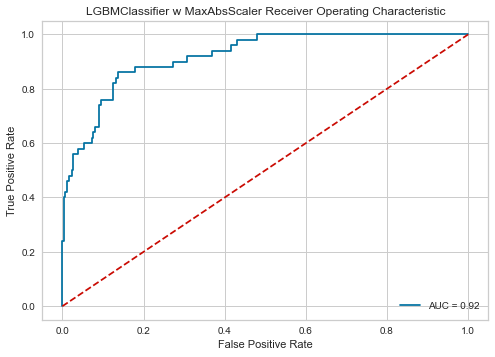

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.009444535723294307
Mean Validation Accuracy: 0.8845749984737795 | Standard Deviation: 0.009444535723294307




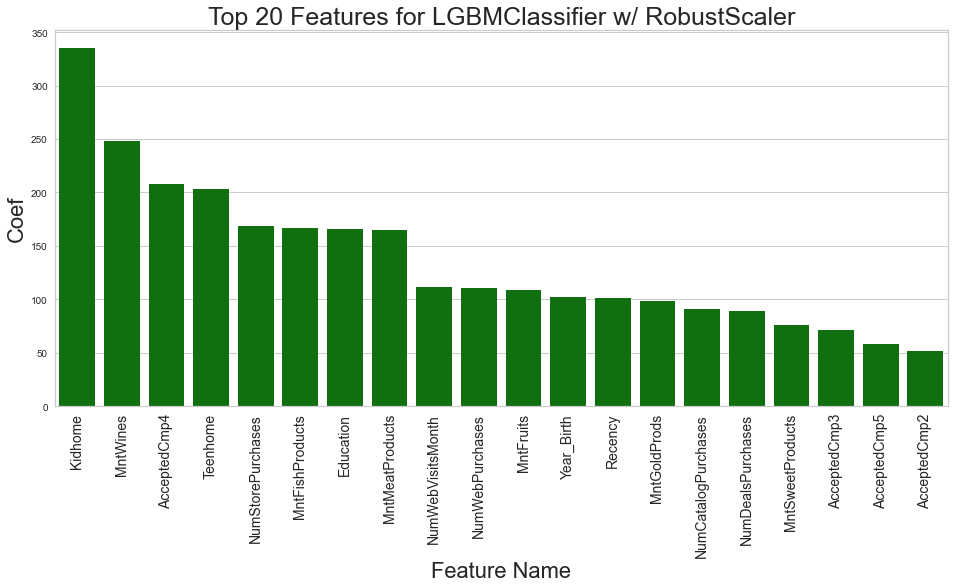

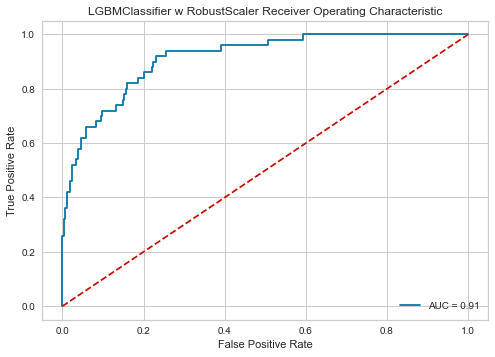

RandomForestClassifier
Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.012902450189767045
Mean Validation Accuracy: 0.8820150180094016 | Standard Deviation: 0.012902450189767045




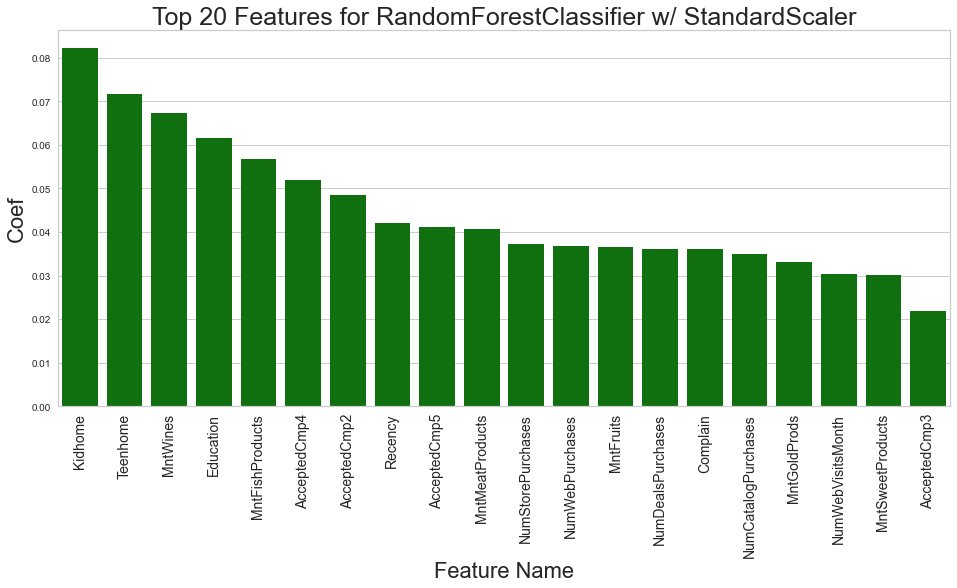

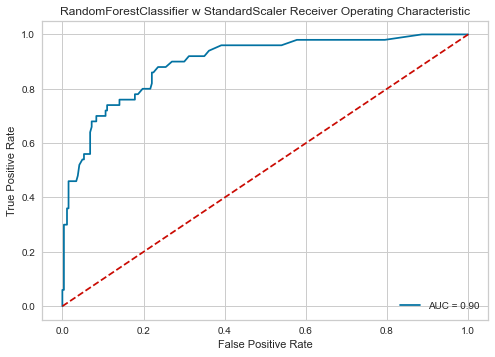

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.016933360139880824
Mean Validation Accuracy: 0.8852099061883152 | Standard Deviation: 0.016933360139880824




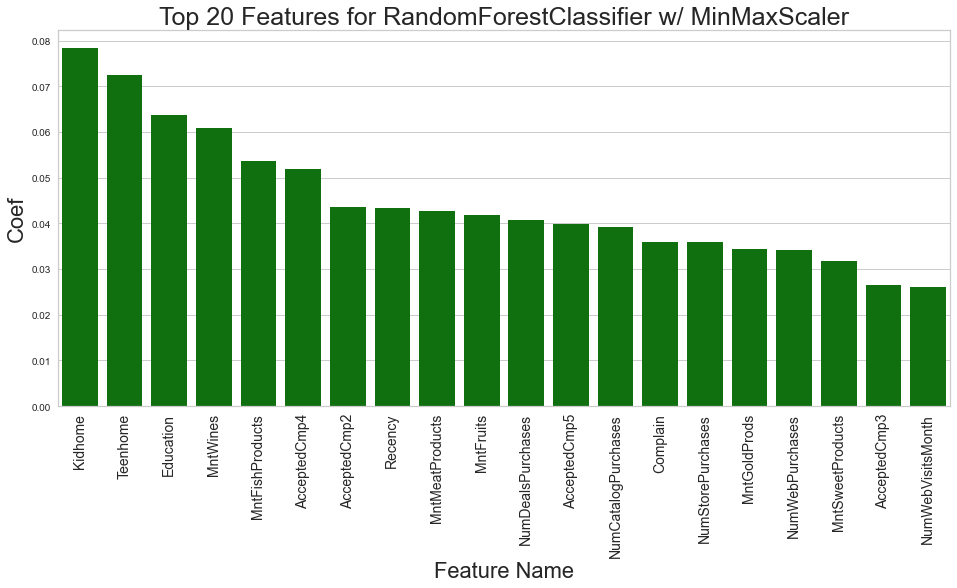

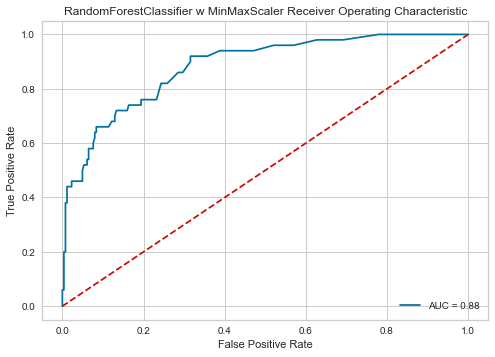

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.014213609848100736
Mean Validation Accuracy: 0.8788303046336055 | Standard Deviation: 0.014213609848100736




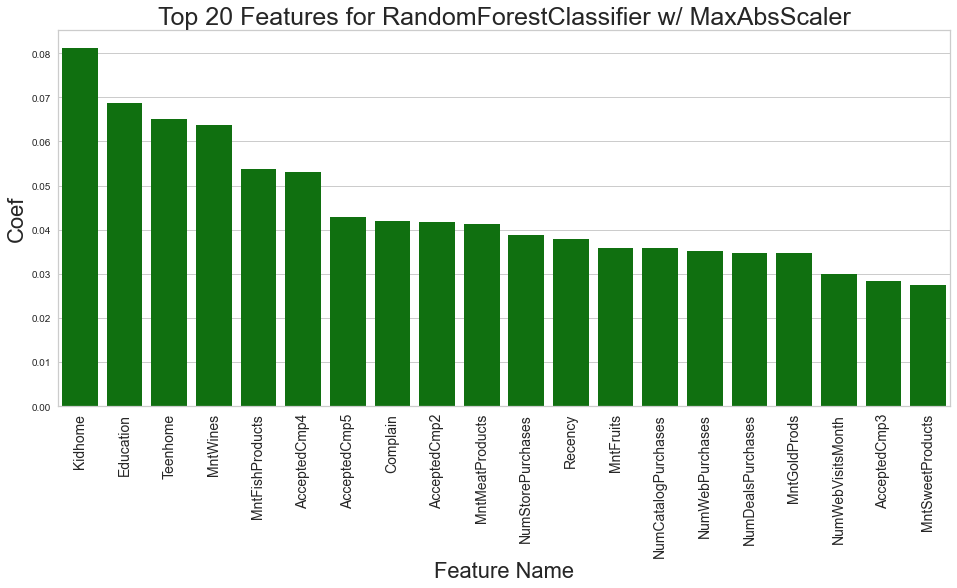

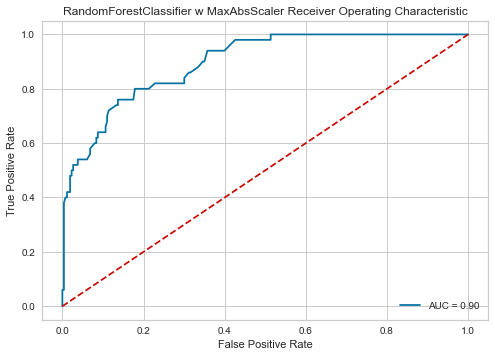

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.016998465451783552
Mean Validation Accuracy: 0.8832990781628375 | Standard Deviation: 0.016998465451783552




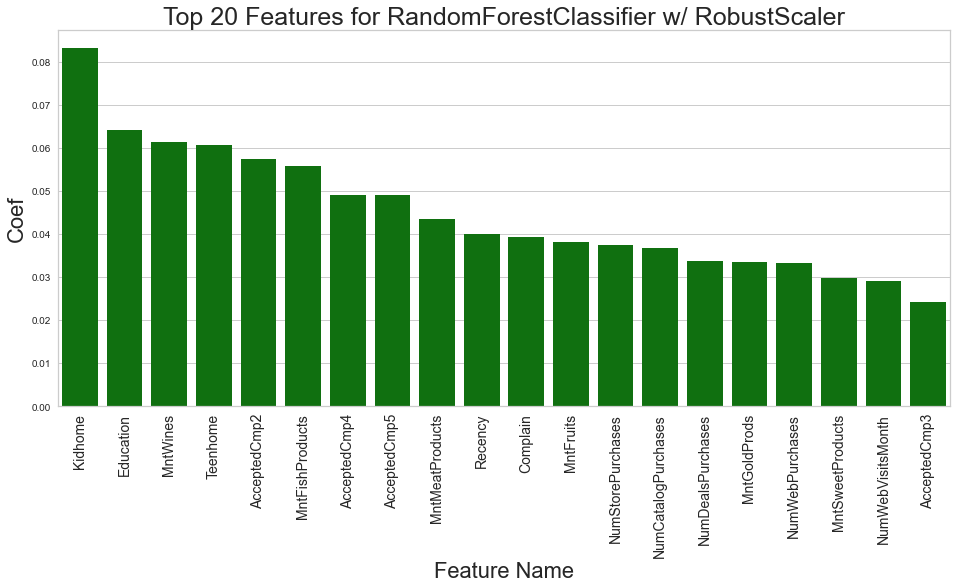

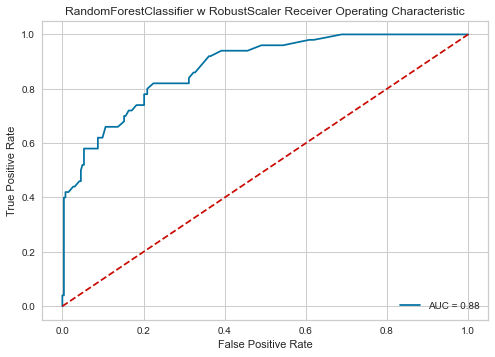

GradientBoostingClassifier
Mean Training Accuracy: 0.9623718840745472 | Standard Deviation: 0.014721442995886925
Mean Validation Accuracy: 0.8845668586312854 | Standard Deviation: 0.014721442995886925




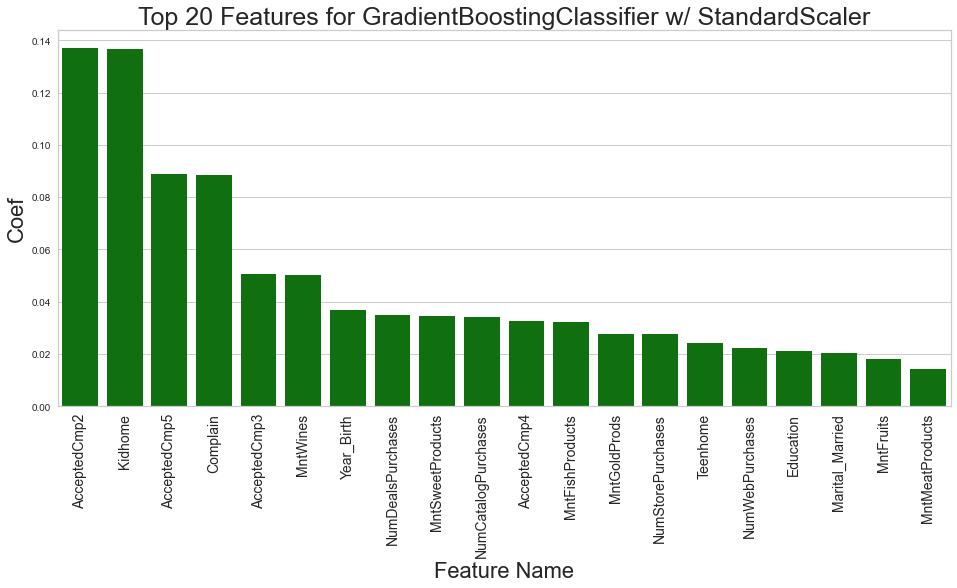

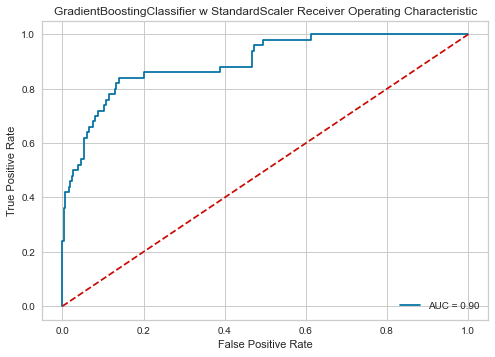

Mean Training Accuracy: 0.9623718840745472 | Standard Deviation: 0.015504575322683522
Mean Validation Accuracy: 0.8858448139028509 | Standard Deviation: 0.015504575322683522




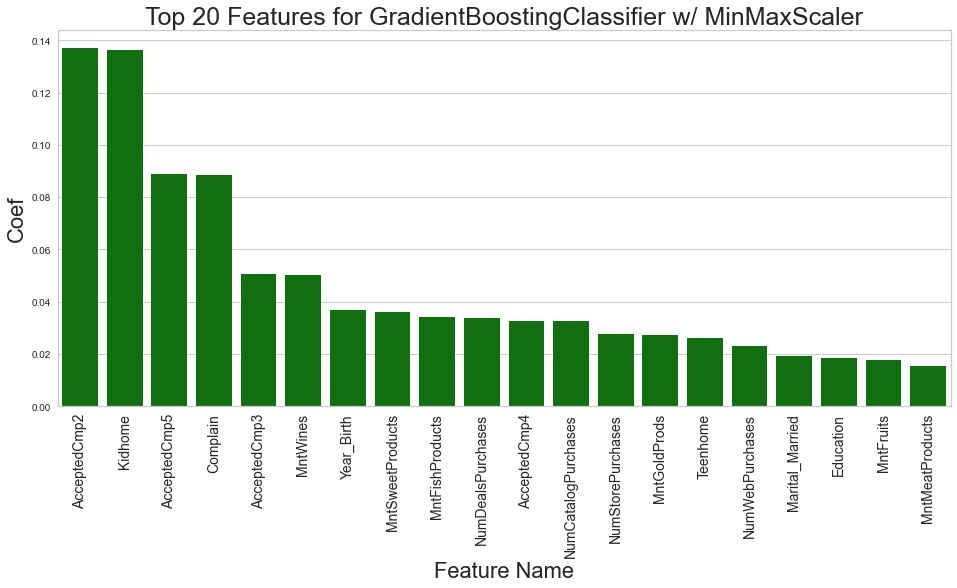

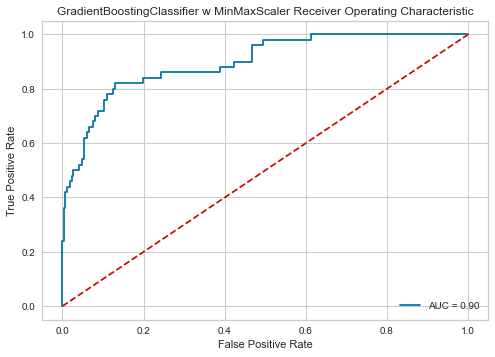

Mean Training Accuracy: 0.9623718840745472 | Standard Deviation: 0.01449789269491973
Mean Validation Accuracy: 0.8852078712276917 | Standard Deviation: 0.01449789269491973




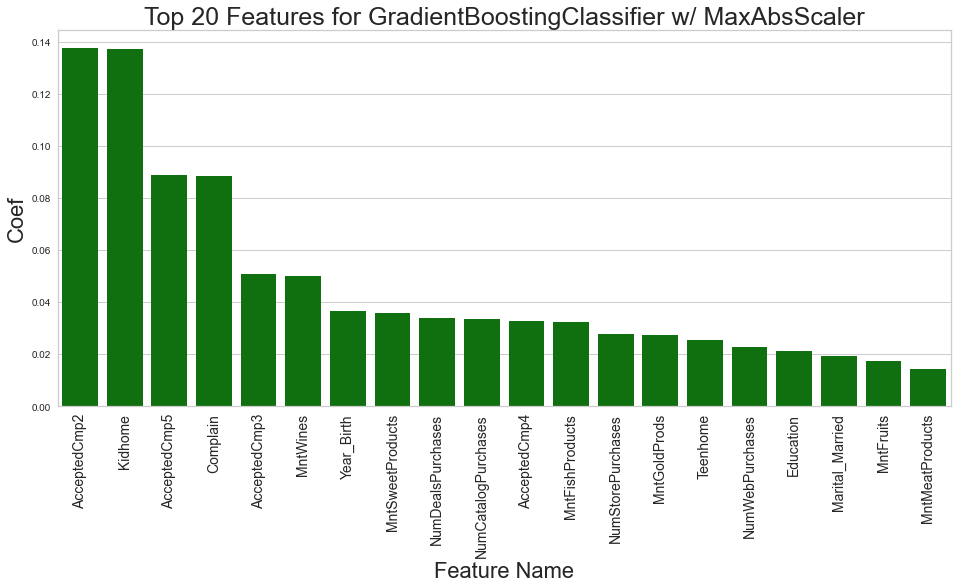

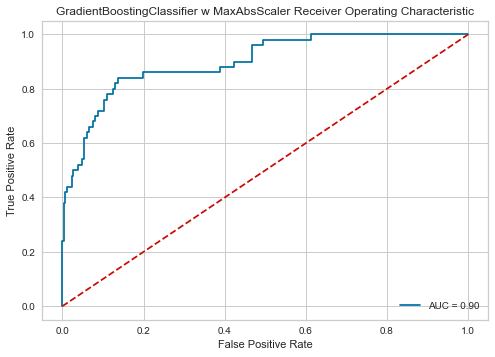

Mean Training Accuracy: 0.9623718840745472 | Standard Deviation: 0.015156697647847652
Mean Validation Accuracy: 0.8864797216173868 | Standard Deviation: 0.015156697647847652




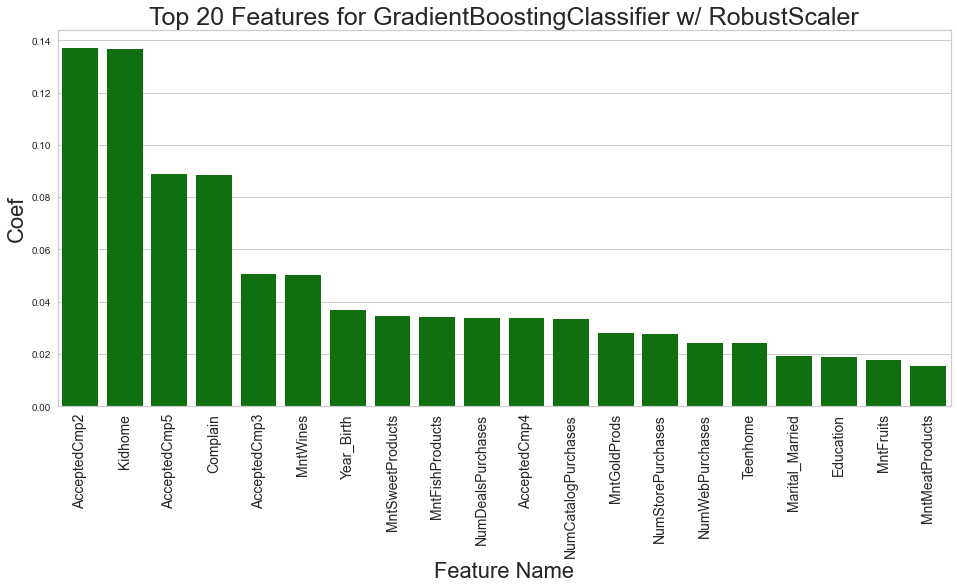

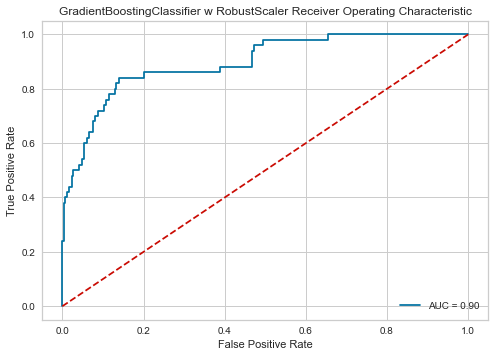

PassiveAggressiveClassifier
Mean Training Accuracy: 0.847575821117444 | Standard Deviation: 0.014564758662263538
Mean Validation Accuracy: 0.847565169613968 | Standard Deviation: 0.014564758662263538




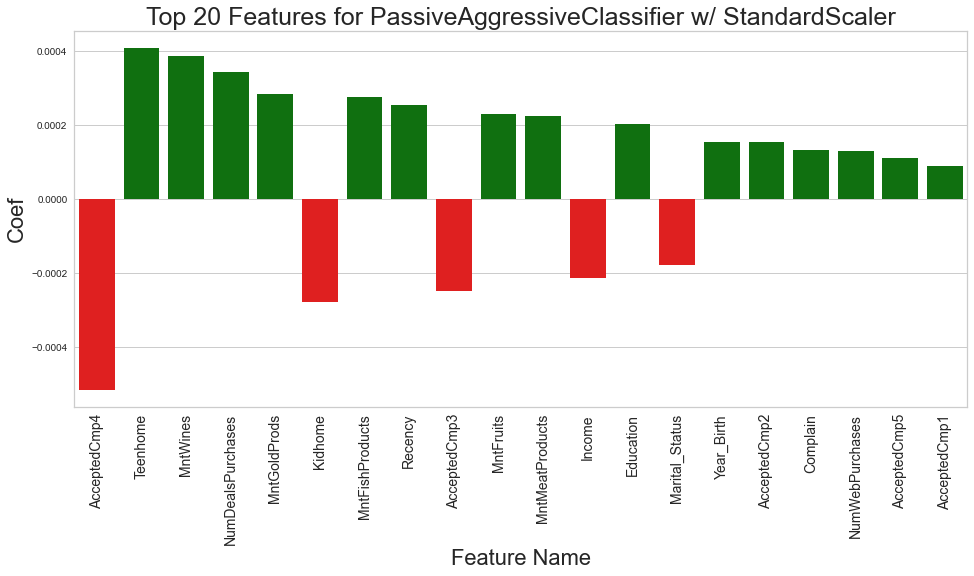

Mean Training Accuracy: 0.847575821117444 | Standard Deviation: 0.014564758662263538
Mean Validation Accuracy: 0.847565169613968 | Standard Deviation: 0.014564758662263538




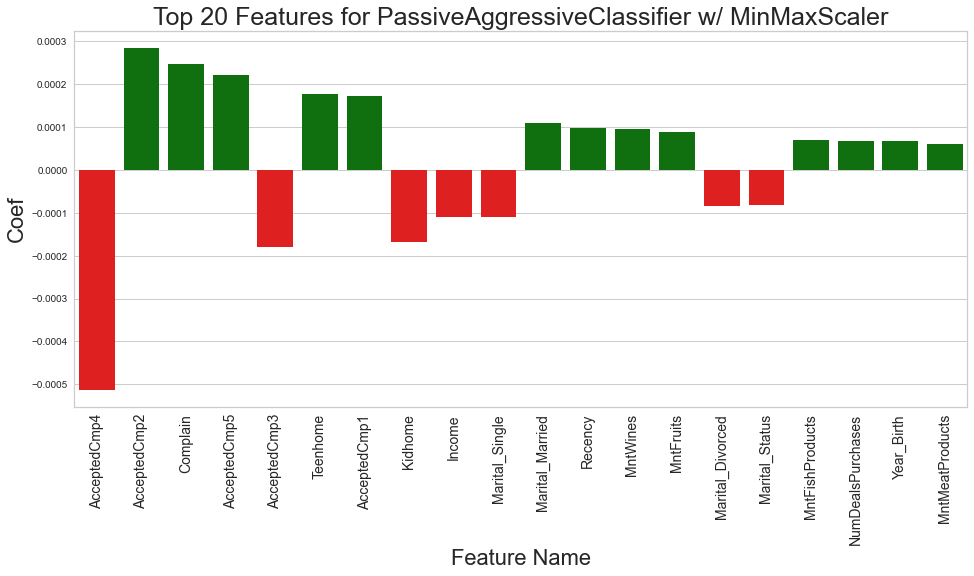

Mean Training Accuracy: 0.7074961398425438 | Standard Deviation: 0.27523625069984115
Mean Validation Accuracy: 0.7127408884638082 | Standard Deviation: 0.27523625069984115




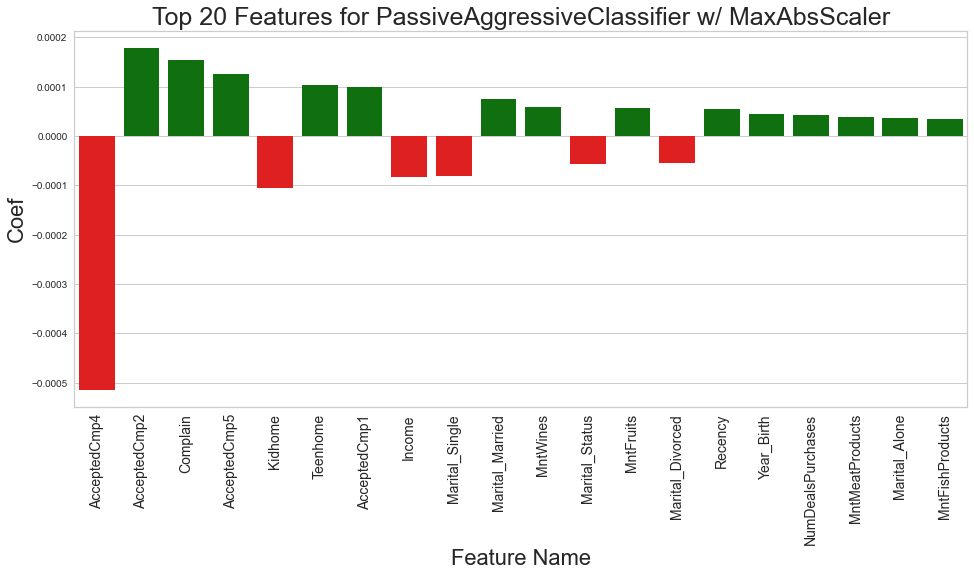

Mean Training Accuracy: 0.847575821117444 | Standard Deviation: 0.014564758662263538
Mean Validation Accuracy: 0.847565169613968 | Standard Deviation: 0.014564758662263538




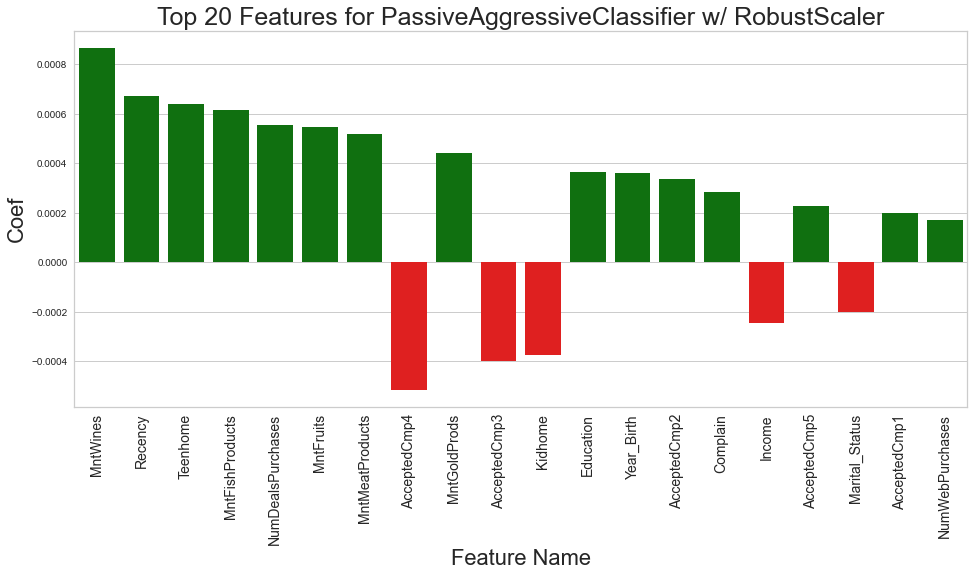

ExtraTreesClassifier
Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.017906358927661452
Mean Validation Accuracy: 0.8820150180094016 | Standard Deviation: 0.017906358927661452




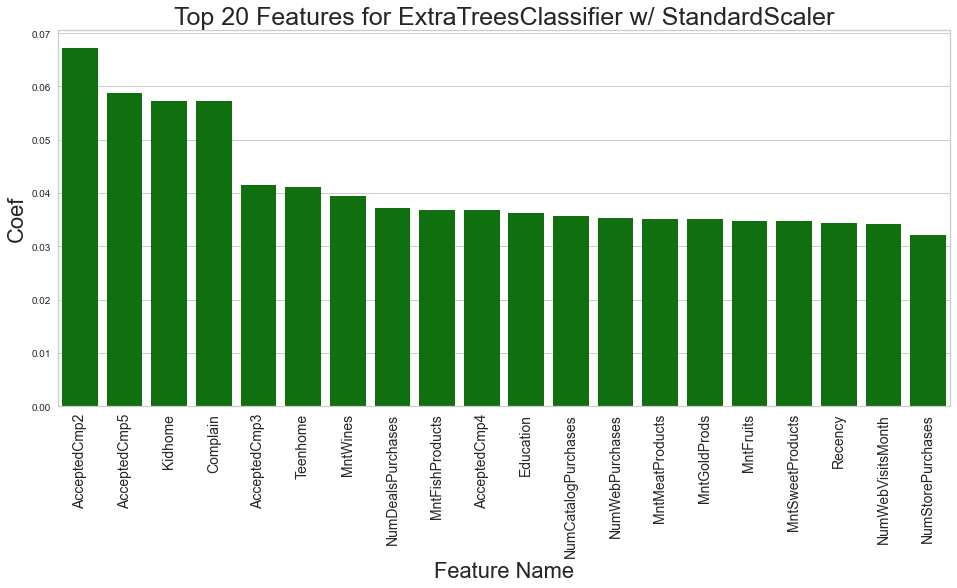

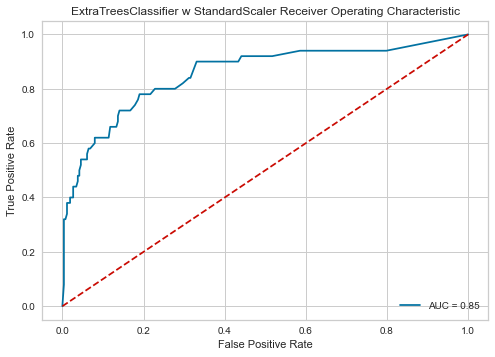

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.014602557554064574
Mean Validation Accuracy: 0.8820231578518957 | Standard Deviation: 0.014602557554064574




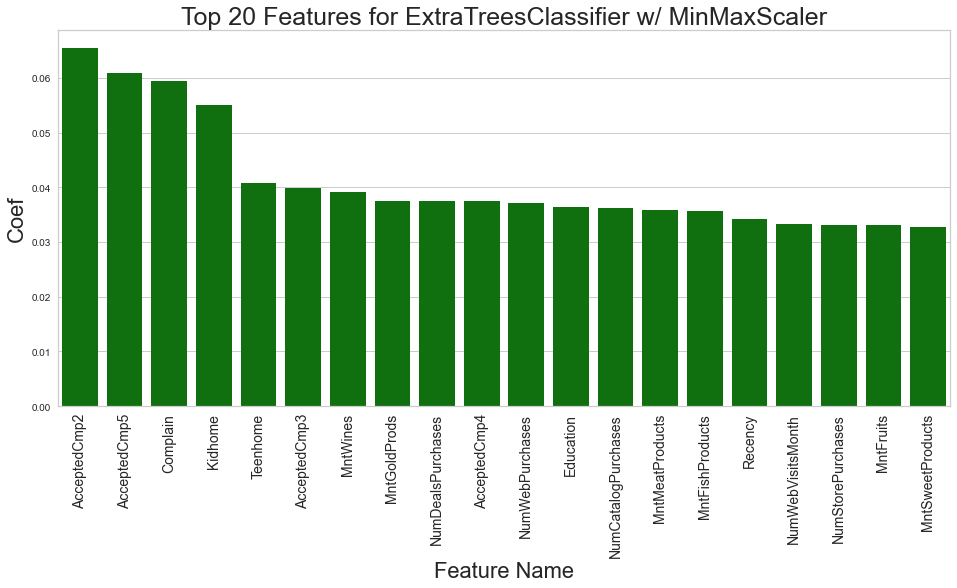

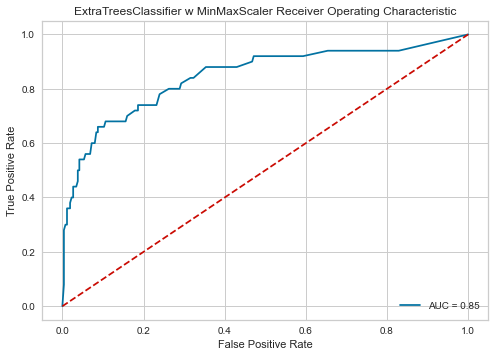

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.01881127044293905
Mean Validation Accuracy: 0.8826560306058078 | Standard Deviation: 0.01881127044293905




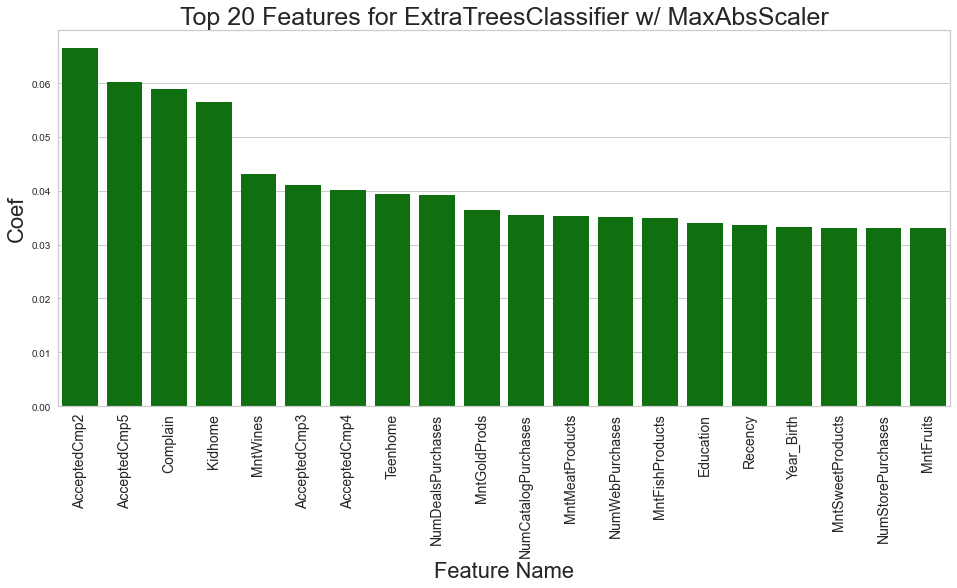

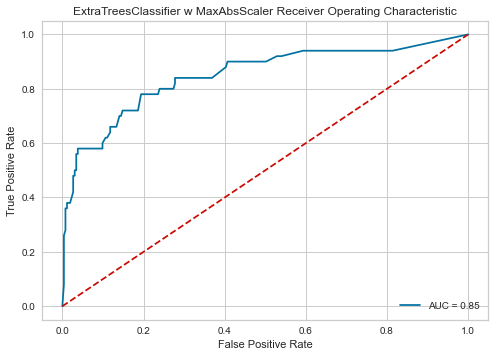

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.014587787221624031
Mean Validation Accuracy: 0.885840743981604 | Standard Deviation: 0.014587787221624031




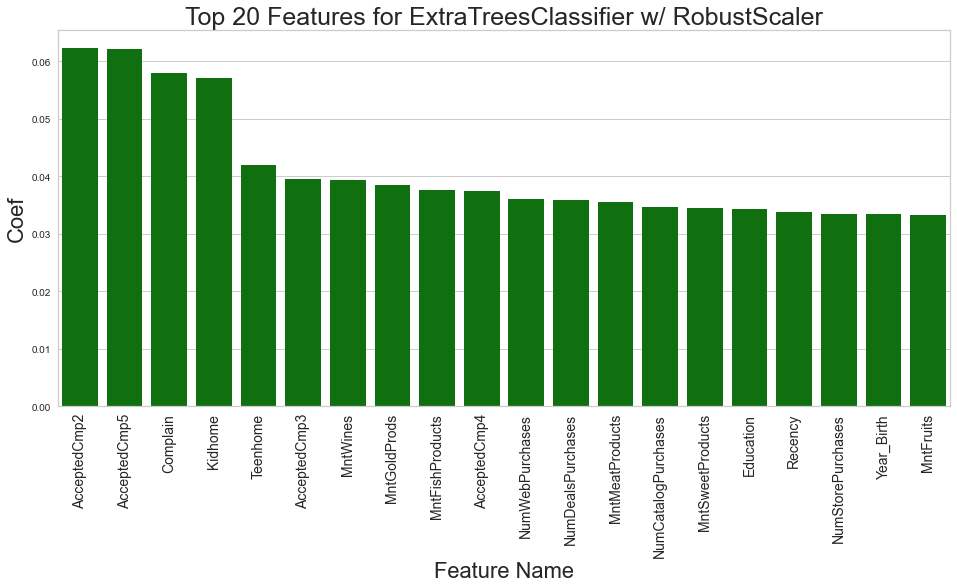

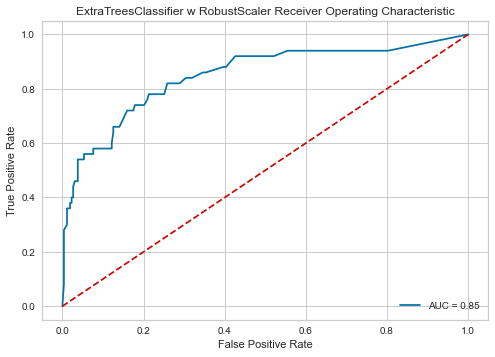

XGBClassifier
[09:54:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:54:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:54:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:54:55] WARNING: C:/Users/Administrator/workspace/xgb

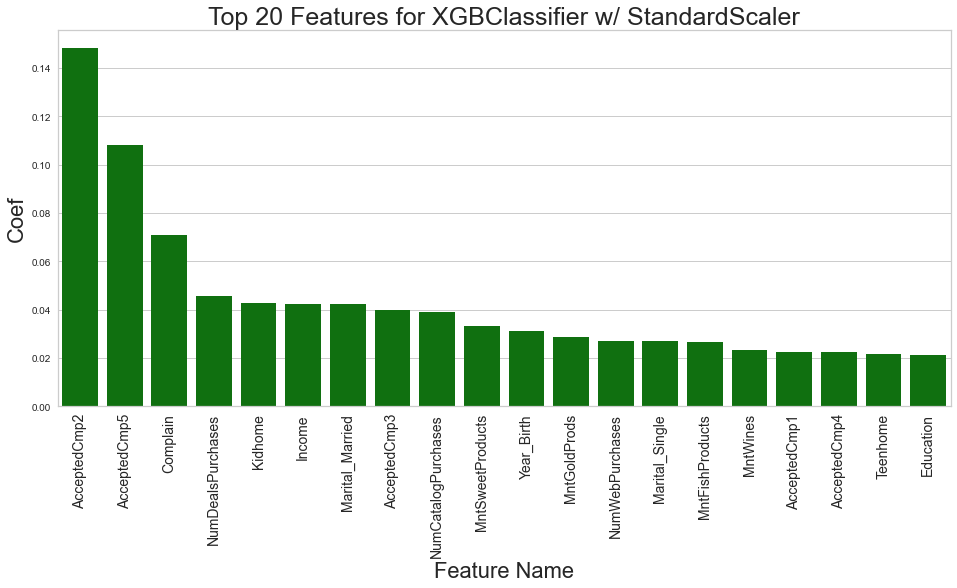

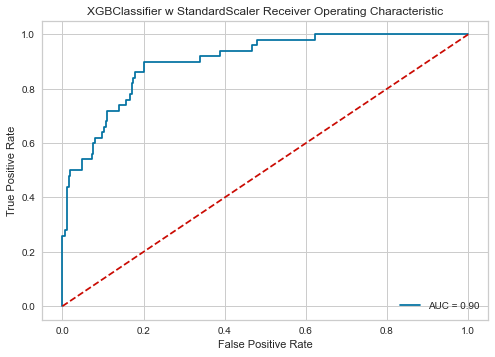

[09:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

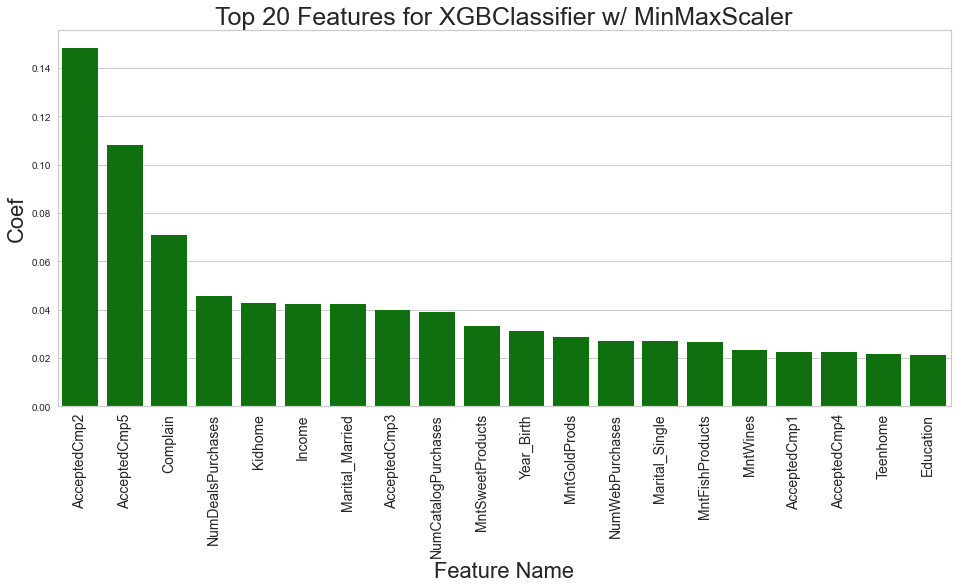

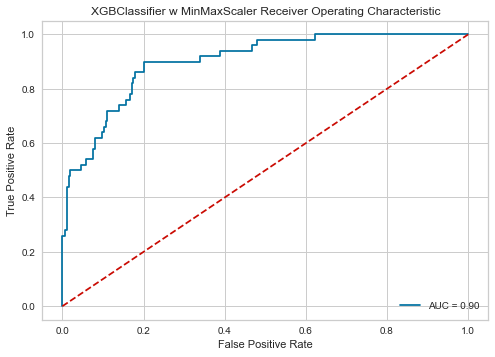

[09:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

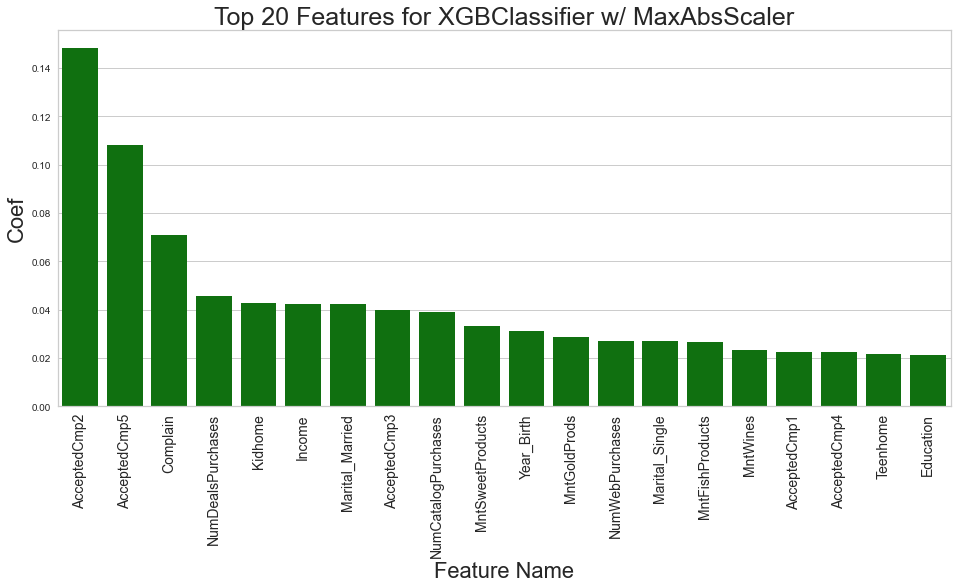

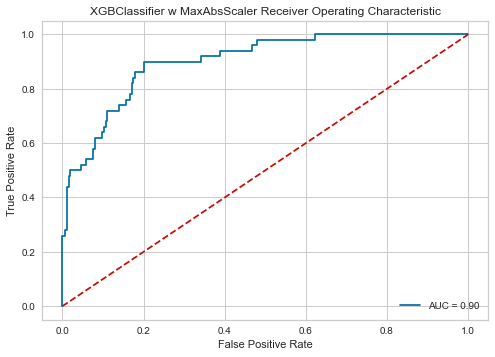

[09:55:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:55:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:55:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:55:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

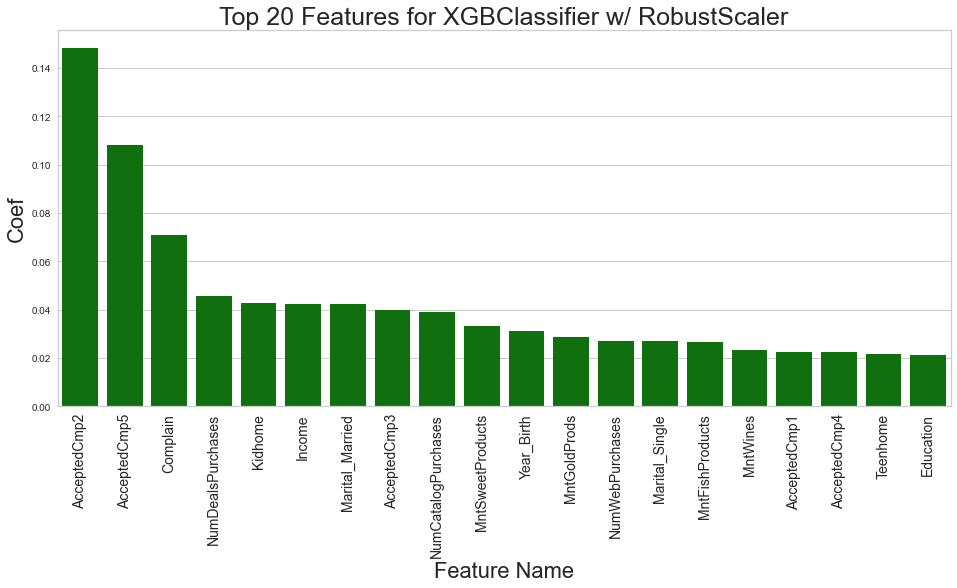

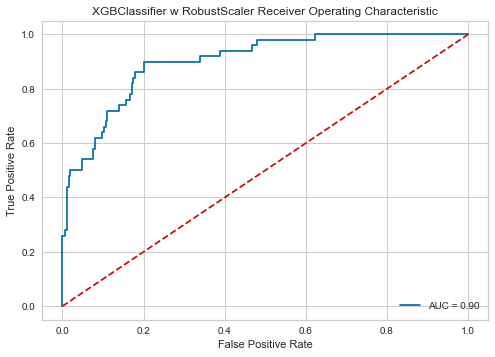

AdaBoostClassifier
Mean Training Accuracy: 0.9150194755269194 | Standard Deviation: 0.015550760329891345
Mean Validation Accuracy: 0.8845648236706619 | Standard Deviation: 0.015550760329891345




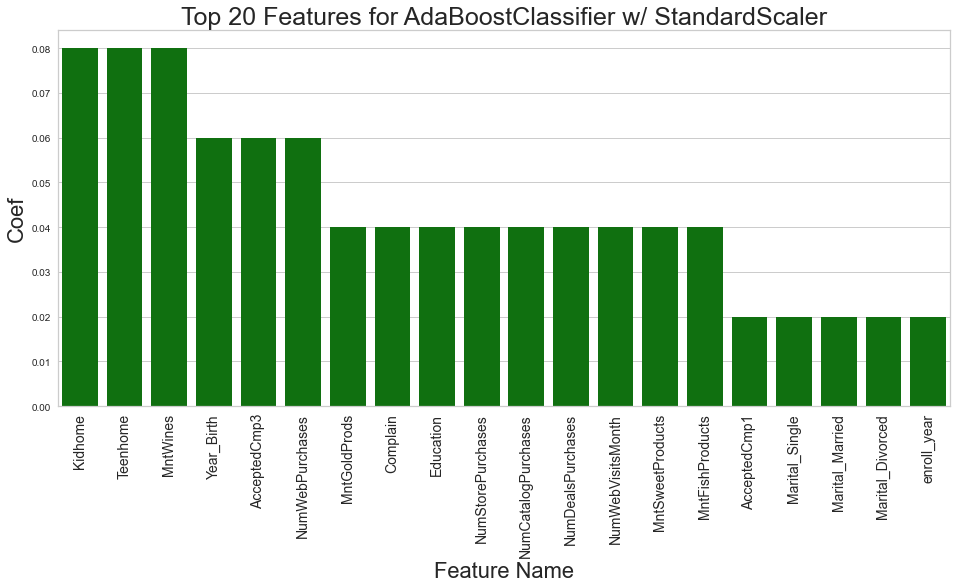

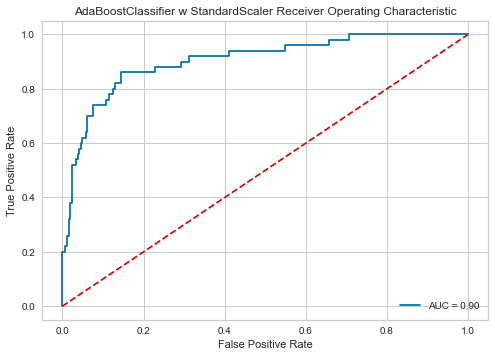

Mean Training Accuracy: 0.9150194755269194 | Standard Deviation: 0.015550760329891345
Mean Validation Accuracy: 0.8845648236706619 | Standard Deviation: 0.015550760329891345




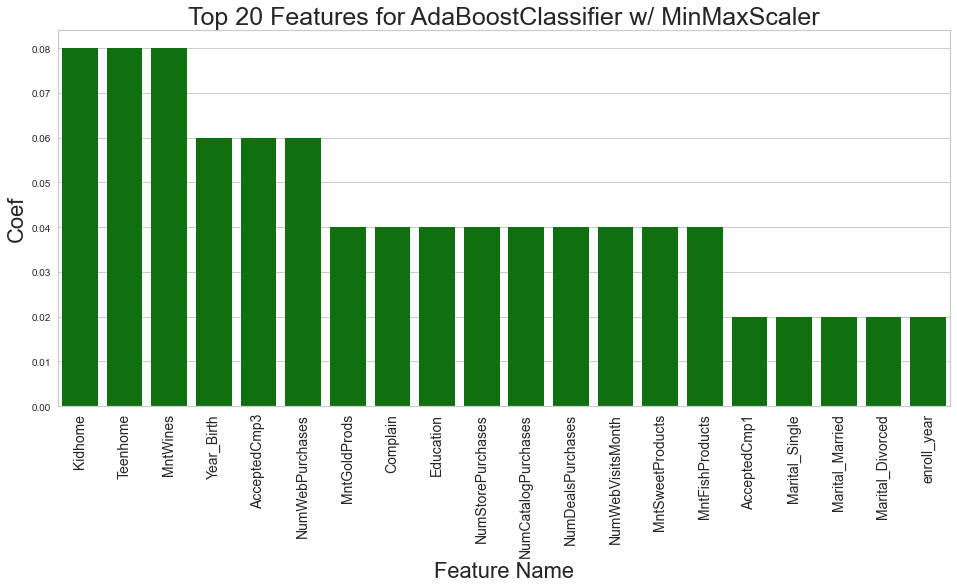

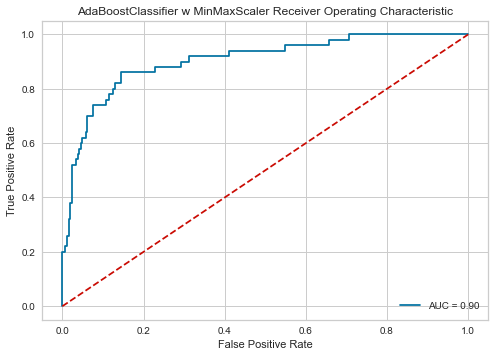

Mean Training Accuracy: 0.9150194755269194 | Standard Deviation: 0.015550760329891345
Mean Validation Accuracy: 0.8845648236706619 | Standard Deviation: 0.015550760329891345




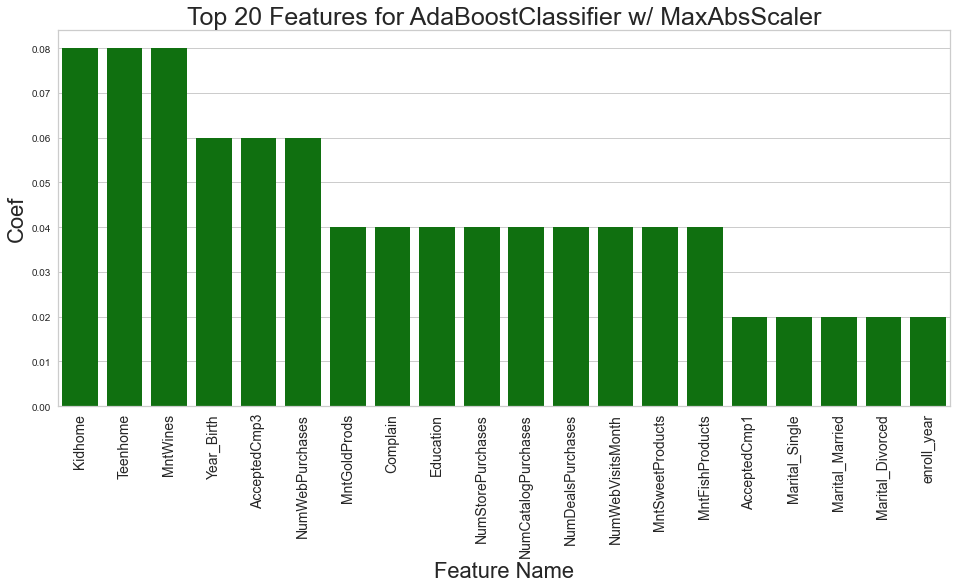

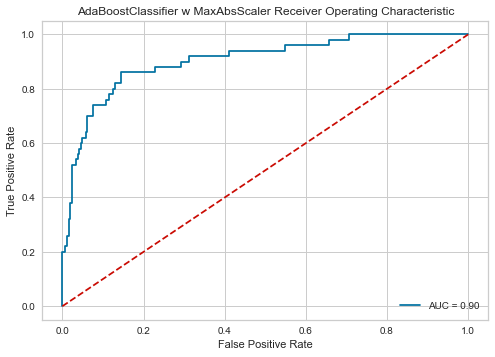

Mean Training Accuracy: 0.9150194755269194 | Standard Deviation: 0.015550760329891345
Mean Validation Accuracy: 0.8845648236706619 | Standard Deviation: 0.015550760329891345




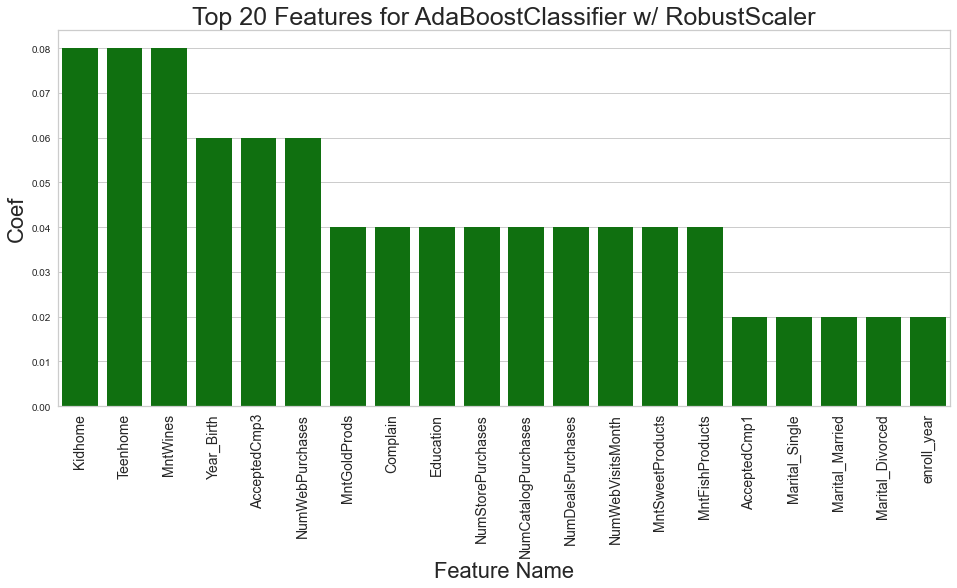

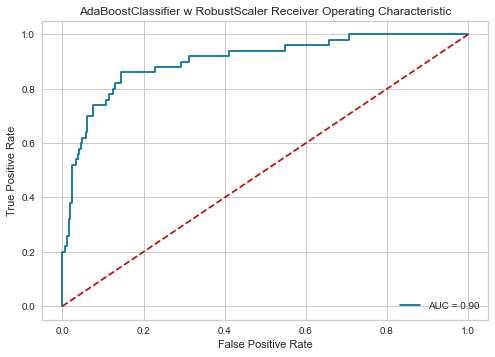

In [50]:
models = [
	SGDClassifier(max_iter = 1000,penalty = "elasticnet"),#tol=1e-3),
	LinearSVC(max_iter=5000), 
	GaussianProcessClassifier(),
	ExtraTreeClassifier(),
	BernoulliNB(),
	LogisticRegressionCV(max_iter= 100000), 
	RidgeClassifier(),
	SVC(kernel = 'linear',max_iter= -1), 
	Perceptron(),
	PassiveAggressiveClassifier(), 
	DecisionTreeClassifier(), #no coef 
	KNeighborsClassifier(),#no feat_import, use permutation_importance 
	GaussianNB(), #no feat_import, use permutation_importance 
	LGBMClassifier(),#no coef 
	RandomForestClassifier(), #no coef 
	GradientBoostingClassifier(),#no coef 
	PassiveAggressiveClassifier(), 
	ExtraTreesClassifier(), #no coef 
	XGBClassifier(),
	AdaBoostClassifier(), #no coef 
	]

model_result = []
model_no_feature_imp= ['GaussianProcessClassifier','GaussianNB']

classes = ["no", "yes"]
for model in models:
	print(model.__class__.__name__)
	model_result.append(cross_validate(model,KFold()))
# 	overallClassificationReport(model,classes)
# 	if hasmethod(model, 'predict_proba'):
# 		ROC_Curve_Plot(model,X_test,y_test,"Overall "+model.__class__.__name__)
# 	precision_recall_curve(model)
# 	class_predict_err_plot(model, classes=classes)
# 	learning_curve_plot(model)
# 	cv_scores_plot(model)
# 	if has_feature_imp(model) :
# 		overall_feature_importance(model)
		#RFECV_plot(model)
warnings.filterwarnings("default")

In [51]:
standardScalerList = []
minMaxScalerList = []
maxAbsScalerList = []
robustScalerList = []

for collection in model_result:
    standard = collection[0]
    standardScalerList.append({'classifier':standard['classifier'],'metrics_summ':standard['metrics_summ'],'fpr':standard['fpr'],'tpr':standard['tpr'] })
    minMax = collection[1]
    minMaxScalerList.append({'classifier':minMax['classifier'],'metrics_summ':minMax['metrics_summ'],'fpr':minMax['fpr'],'tpr':minMax['tpr'] })
    maxAbs = collection[2]
    maxAbsScalerList.append({'classifier':maxAbs['classifier'],'metrics_summ':maxAbs['metrics_summ'],'fpr':maxAbs['fpr'],'tpr':maxAbs['tpr'] })
    robust = collection[3]
    robustScalerList.append({'classifier':robust['classifier'],'metrics_summ':robust['metrics_summ'],'fpr':robust['fpr'],'tpr':robust['tpr'] })


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


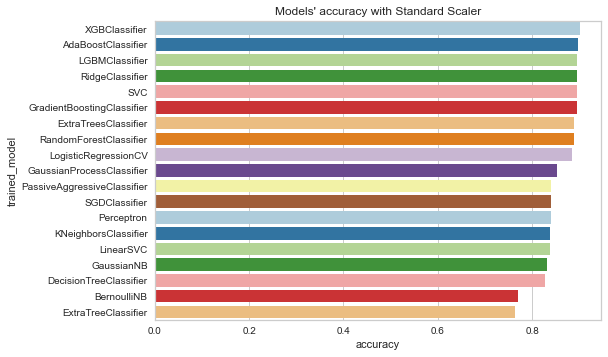

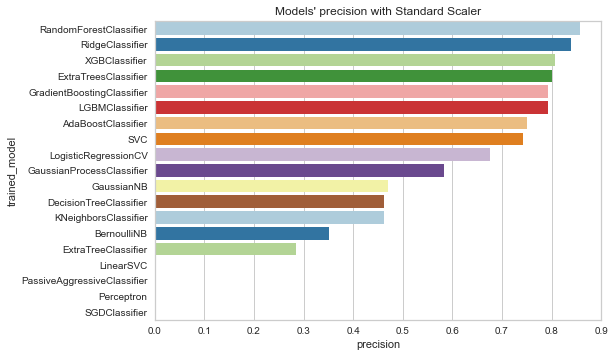

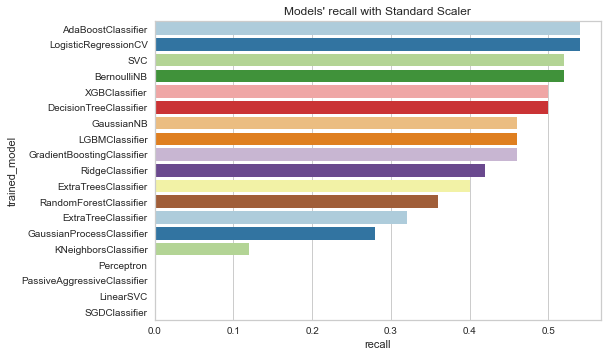

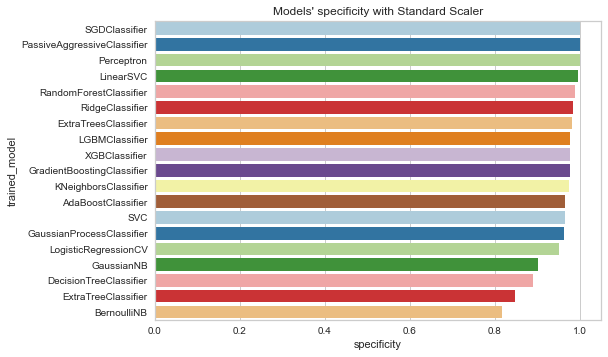

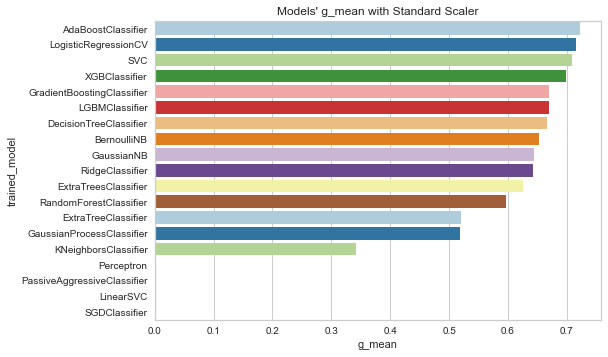

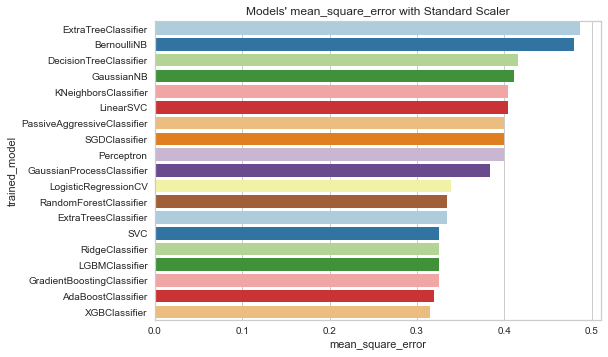

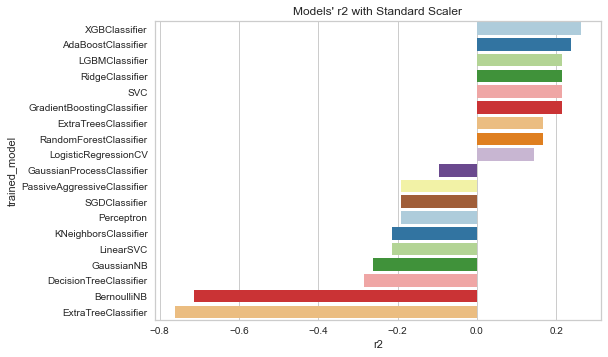

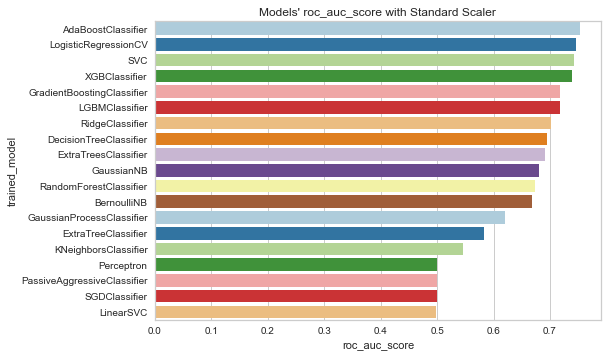

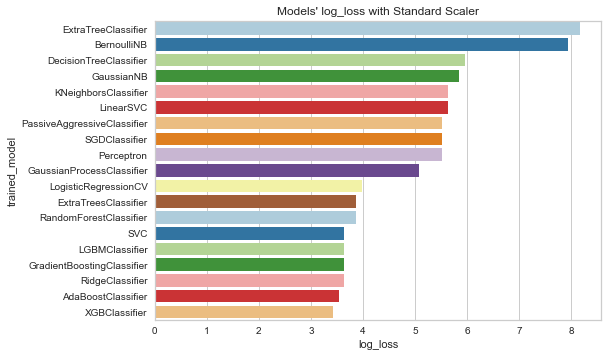

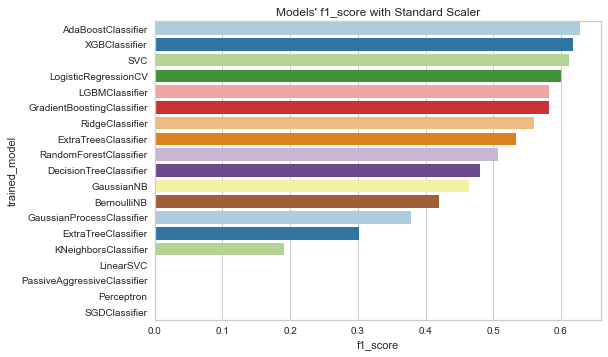

In [78]:
nameList = []



for object in model_result:
    nameList.append(object[0]['classifier'])
metric_list = ['accuracy','precision','recall','specificity','g_mean'
                   ,'mean_square_error','r2','roc_auc_score','log_loss','f1_score']
scaler = ['Standard Scaler','Min Max Scaler','Max Abs Scaler','robust Scaler']

selectedMetricColumns = ["Classifier","Scaler","Accuracy"]
testingDF = pd.DataFrame(columns=selectedMetricColumns)
for metric in metric_list:
    resultList = []
    for model in model_result:
        resultList.append(model[0]['metrics_summ'][metric][1])
        
    accDF = pd.DataFrame(list(zip(nameList,resultList)),columns=['trained_model',metric])
    plt.title("Models' "+metric+ " with Standard Scaler")
    ax = sns.barplot(data=accDF.sort_values(metric,ascending=False),orient='h',palette ="Paired" , y = 'trained_model',x=metric)
    plt.show()

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


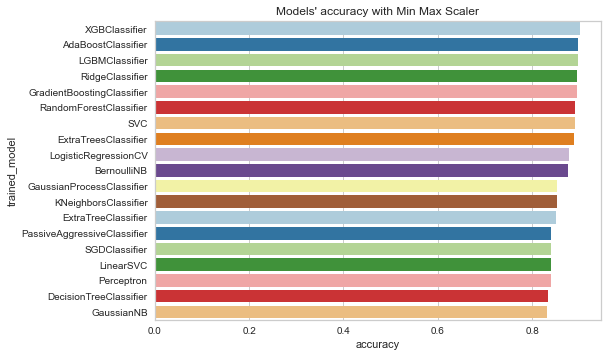

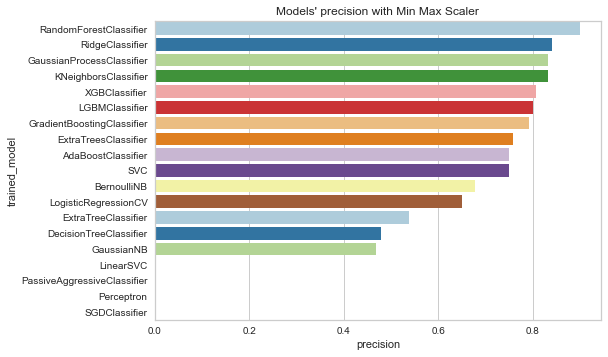

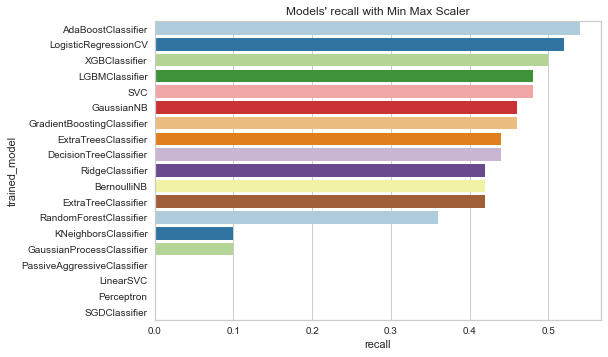

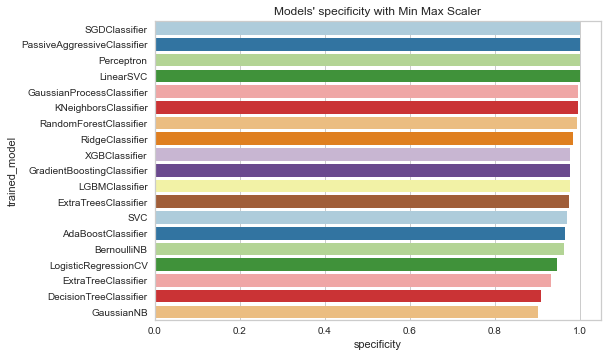

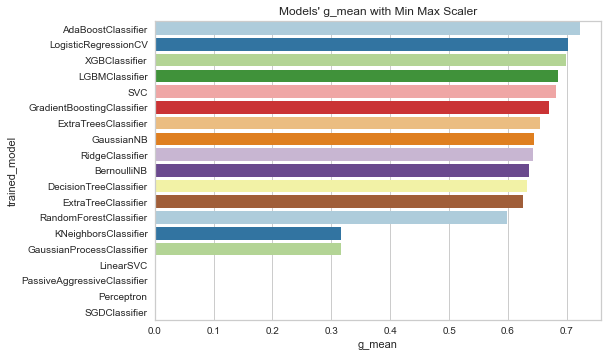

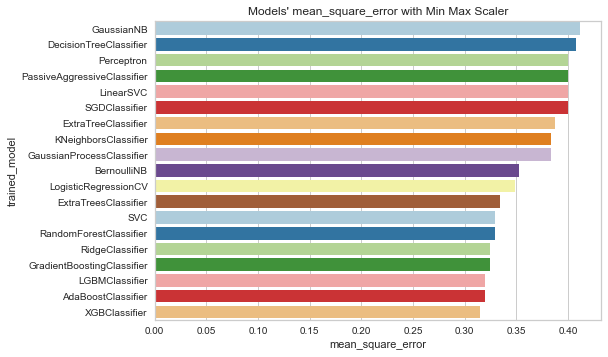

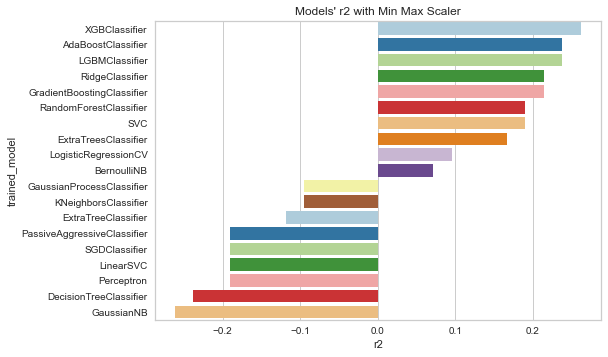

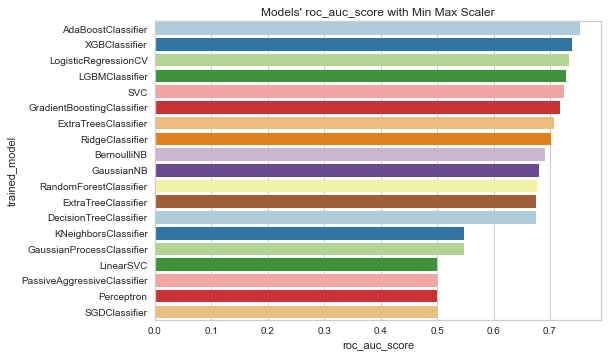

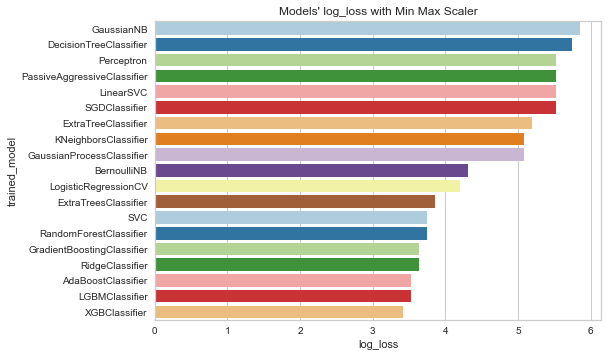

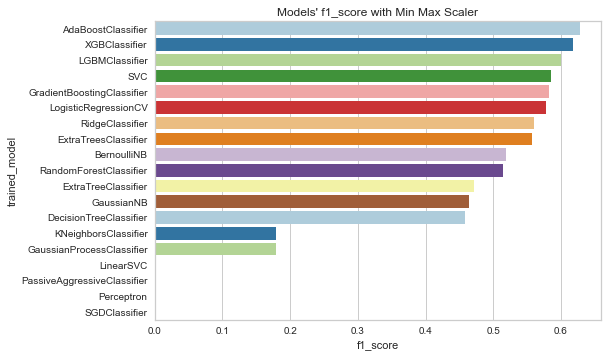

In [53]:
for metric in metric_list:
    resultList = []
    for model in model_result:
        resultList.append(model[1]['metrics_summ'][metric][1])
        
    accDF = pd.DataFrame(list(zip(nameList,resultList)),columns=['trained_model',metric])
    plt.title("Models' "+metric+ " with Min Max Scaler")
    ax = sns.barplot(data=accDF.sort_values(metric,ascending=False),orient='h',palette ="Paired" , y = 'trained_model',x=metric)
    plt.show()

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


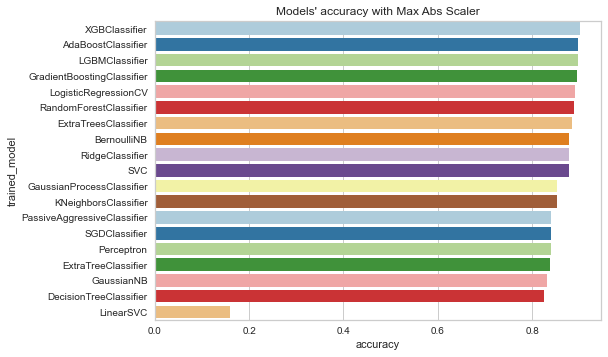

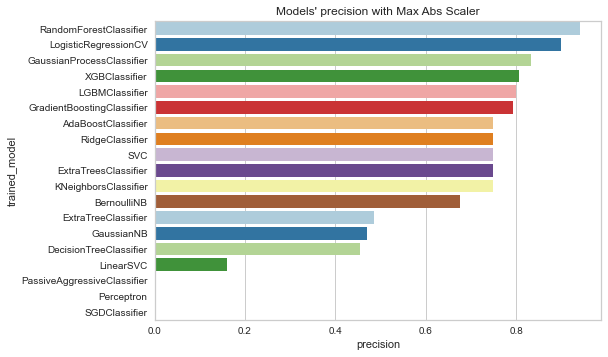

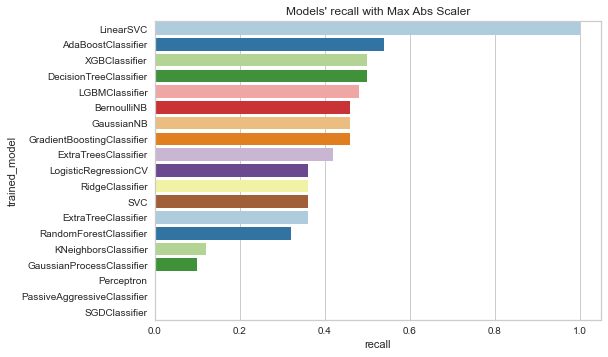

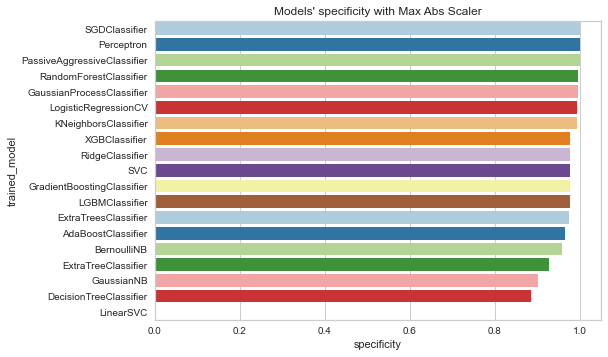

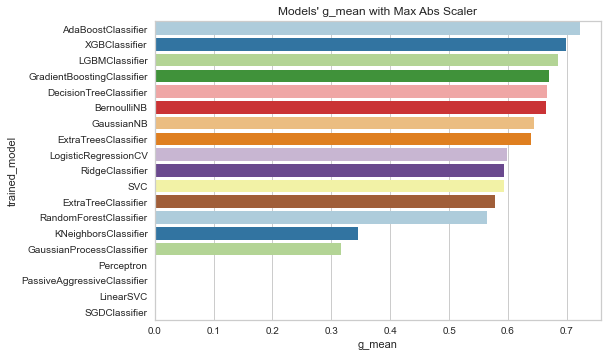

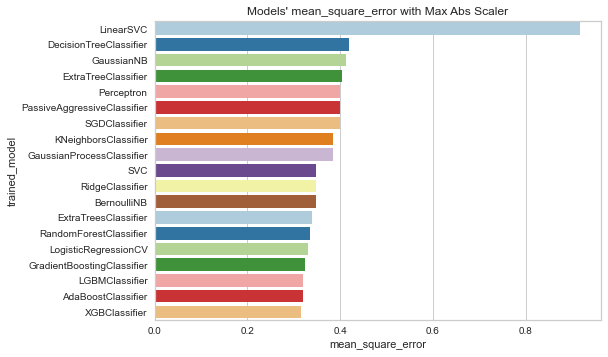

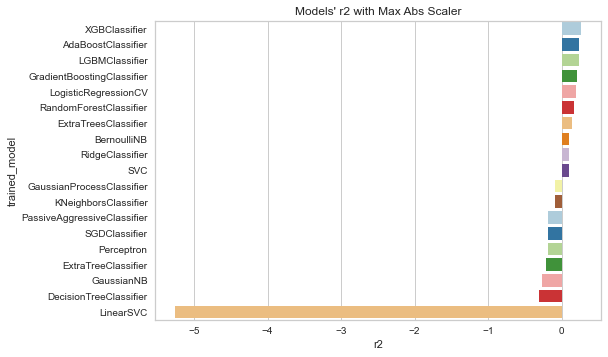

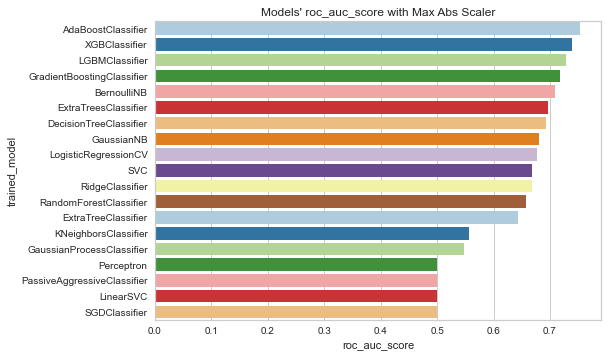

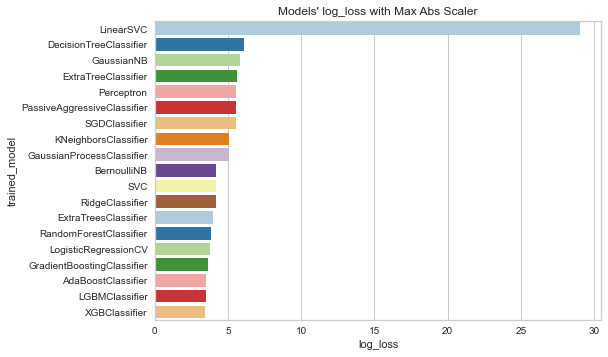

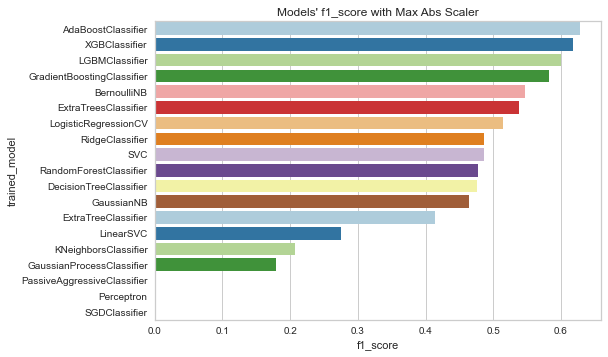

In [54]:
for metric in metric_list:
    resultList = []
    for model in model_result:
        resultList.append(model[2]['metrics_summ'][metric][1])
        
    accDF = pd.DataFrame(list(zip(nameList,resultList)),columns=['trained_model',metric])
    plt.title("Models' "+metric+ " with Max Abs Scaler")
    ax = sns.barplot(data=accDF.sort_values(metric,ascending=False),orient='h',palette ="Paired" , y = 'trained_model',x=metric)
    plt.show()

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


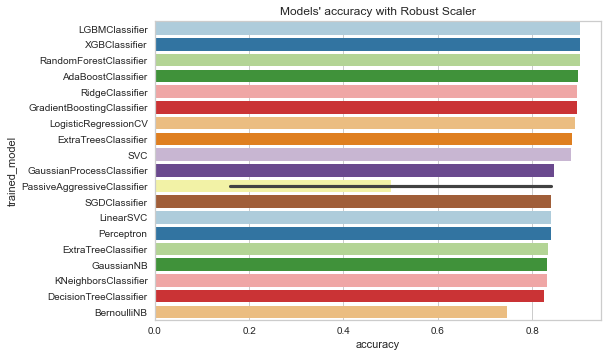

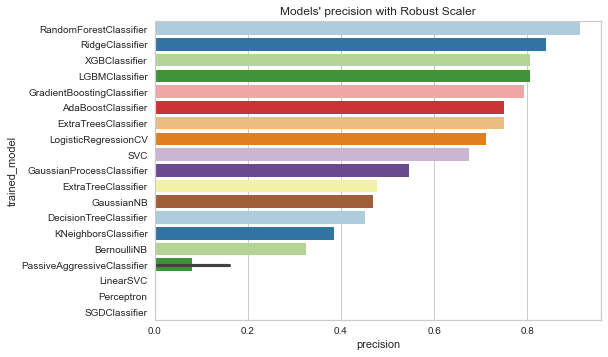

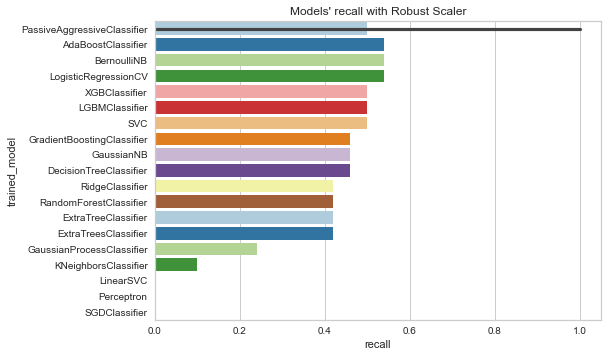

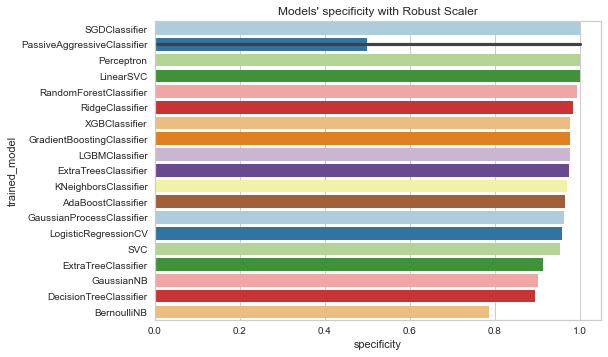

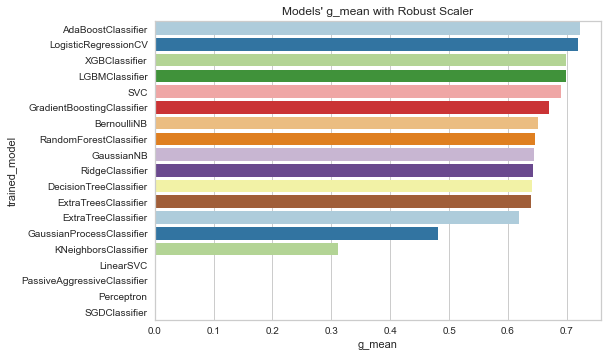

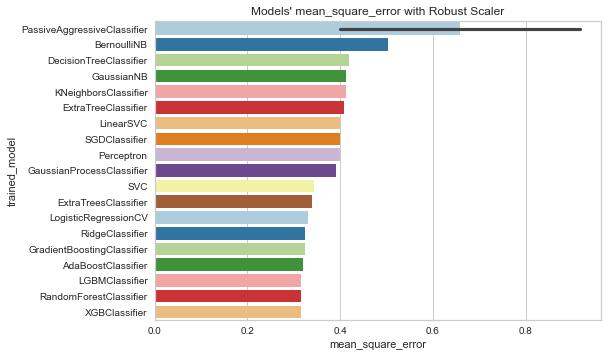

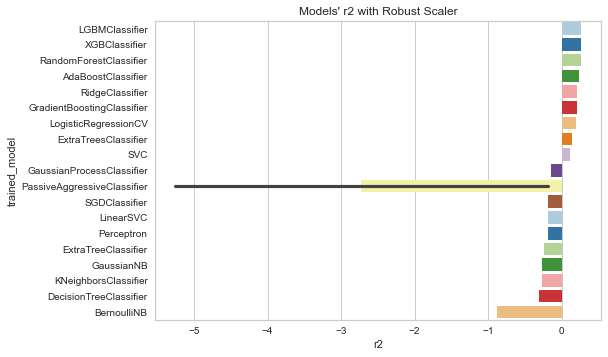

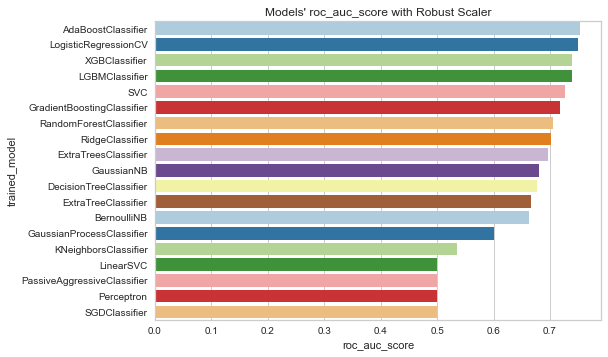

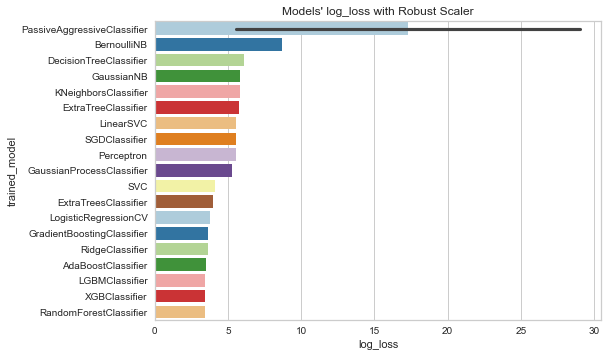

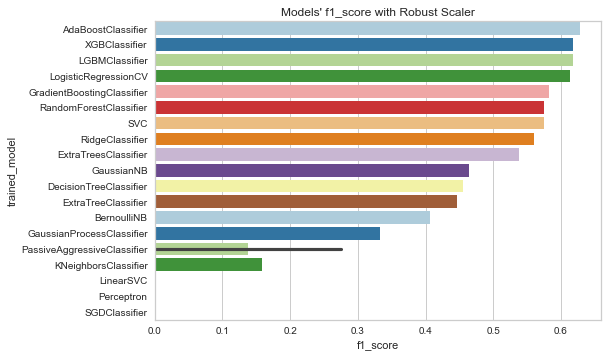

In [55]:

for metric in metric_list:
    resultList = []
    for model in model_result:
        resultList.append(model[3]['metrics_summ'][metric][1])
        
    accDF = pd.DataFrame(list(zip(nameList,resultList)),columns=['trained_model',metric])
    plt.title("Models' "+metric+ " with Robust Scaler")
    ax = sns.barplot(data=accDF.sort_values(metric,ascending=False),orient='h',palette ="Paired" , y = 'trained_model',x=metric)
    plt.show()

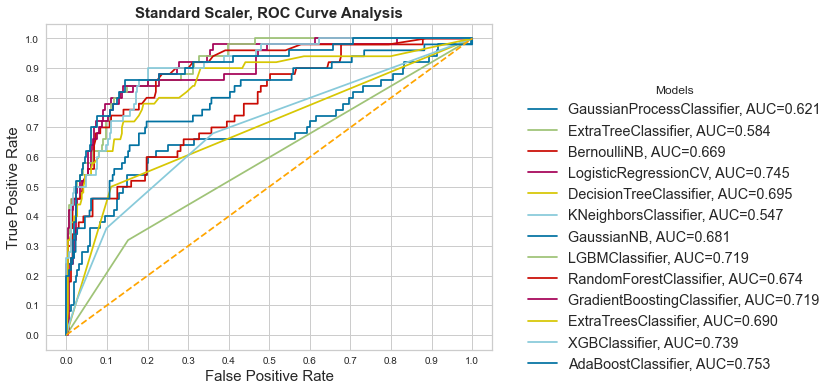

Average auc scores : 0.6795817490494296


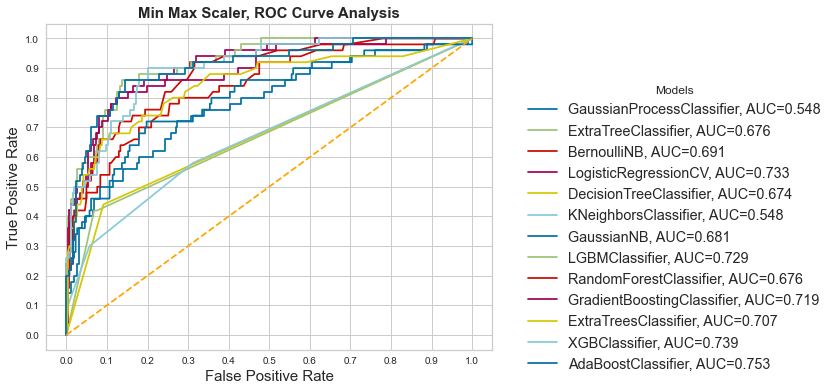

Average auc scores : 0.682527054694355


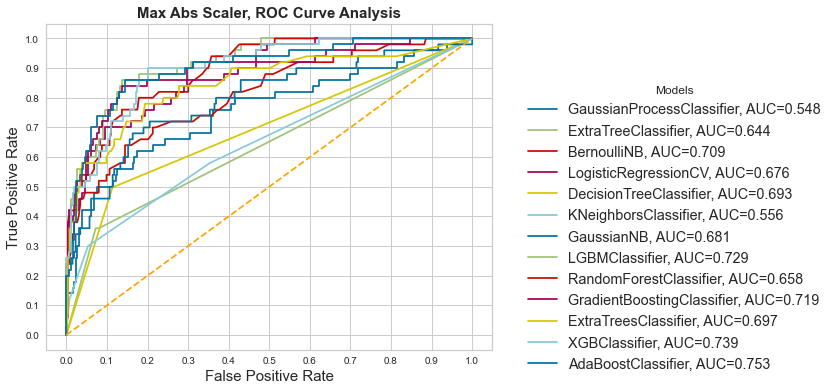

Average auc scores : 0.6769581749049429


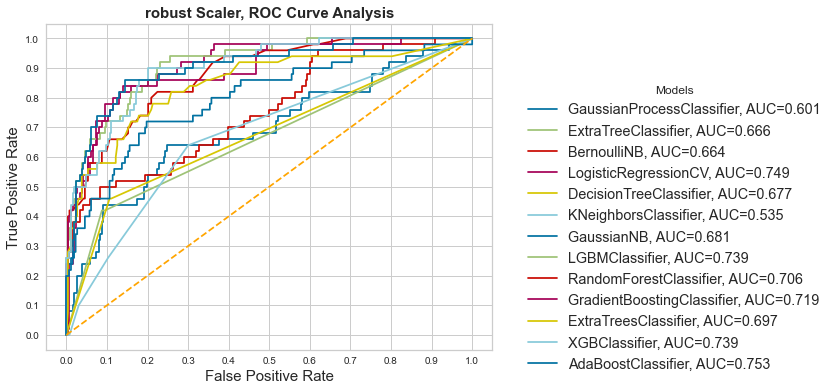

Average auc scores : 0.6864287803451301


In [96]:
scaler = ['Standard Scaler','Min Max Scaler','Max Abs Scaler','robust Scaler']
scalerIndex = [0,1,2,3]

for scalerIndex, scalerName in zip(scalerIndex,scaler):
    aucList=[]
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
    for model in model_result:

        fpr = model[scalerIndex]['fpr']
        if(fpr is not None):
            tpr = model[scalerIndex]['tpr']
            auc = model[scalerIndex]['metrics_summ']['roc_auc_score'][1]
            result_table = result_table.append({'classifiers':model[scalerIndex]['classifier'],
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)
            aucList.append(auc)
            
    result_table.set_index('classifiers', inplace=True)
    fontP = FontProperties()
    fontP.set_size('large')
    fig = plt.figure(figsize=(8,6))
    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    plt.plot([0,1], [0,1], color='orange', linestyle='--')
    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)
    plt.title(scalerName+', ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend( title='Models', bbox_to_anchor=(1.05, 0.85), loc='upper left', prop=fontP)
    plt.show()
    print("Average auc scores : "+str(np.average(aucList)))

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


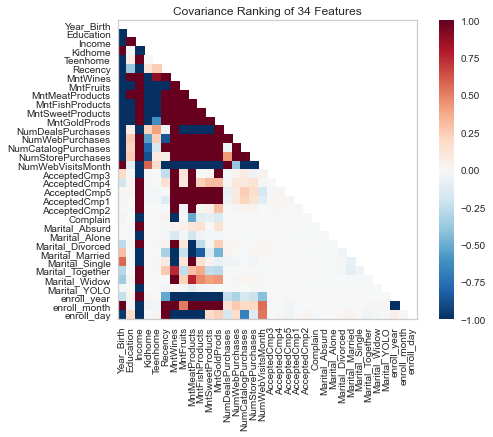

In [59]:
#plot correlationPlot
correlationPlot()

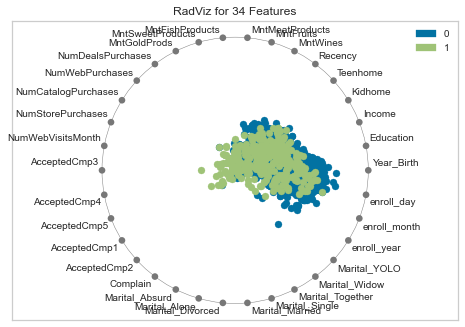

In [60]:
#plot to test separatability of classes
radVisualize()

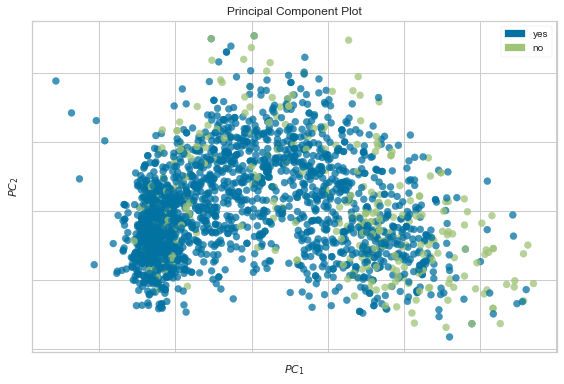

In [61]:
#plot scatter plot
pca_scatter_plot()

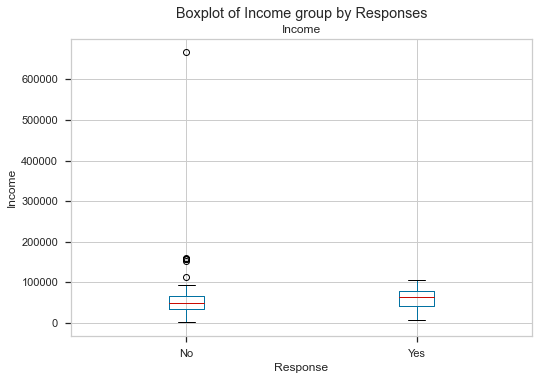

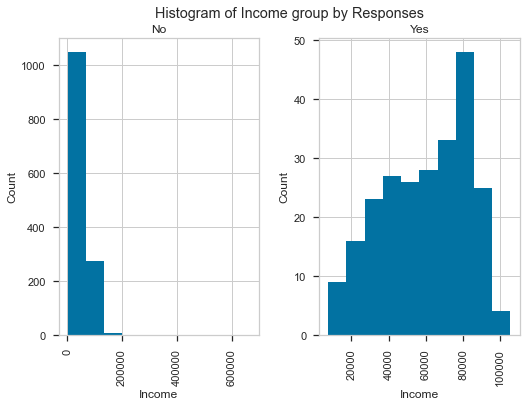

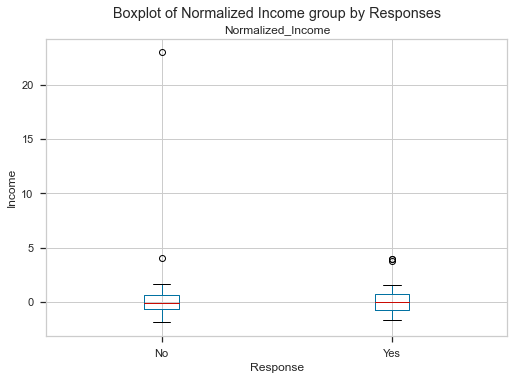

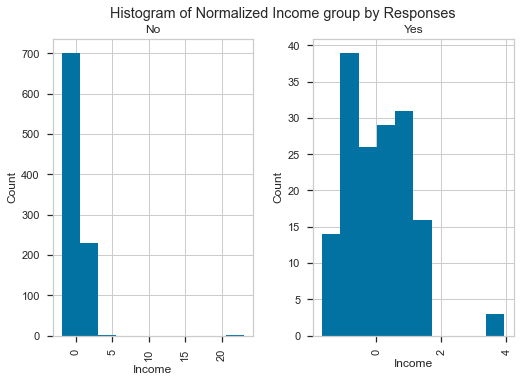

In [272]:
#get data distribution from x train and train
pd.options.plotting.backend = 'matplotlib'
incomeNResponse = pd.concat([X_train["Income"],y_train],axis=1)

incomeNResponse["Response"] = incomeNResponse["Response"].replace(to_replace={0:"No",1:"Yes"})

ax = incomeNResponse.boxplot(by="Response")

plt.Axes.set_xlabel(ax,"Response")
plt.Axes.set_ylabel(ax,"Income")
plt.suptitle("Boxplot of Income group by Responses")


axList = incomeNResponse.hist(column = "Income",by='Response')
sns.set_context('notebook')
plt.suptitle("Histogram of Income group by Responses")


for ax in axList.flatten():
    plt.Axes.set_xlabel(ax,"Income")
    plt.Axes.set_ylabel(ax,"Count")

#get normalized income
standardScaler = StandardScaler()
normalizedXTrainIncome=standardScaler.fit_transform((incomeNResponse["Income"].values).reshape(len(incomeNResponse),1))
normalizedXTrainIncome = pd.DataFrame(normalizedXTrainIncome,columns=["Normalized_Income"])
normalizedXTestIncome = standardScaler.transform((X_test["Income"].values).reshape(len(X_test),1))
normalizedXTestIncome = pd.DataFrame(normalizedXTestIncome,columns=["Normalized_Income"])
incomeNResponse["Normalized_Income"] = normalizedXTrainIncome

ax = incomeNResponse.boxplot(column ="Normalized_Income", by="Response")

plt.Axes.set_xlabel(ax,"Response")
plt.Axes.set_ylabel(ax,"Income")
plt.suptitle("Boxplot of Normalized Income group by Responses")


axList = incomeNResponse.hist(column = "Normalized_Income",by='Response')
sns.set_context('notebook')
plt.suptitle("Histogram of Normalized Income group by Responses")


for ax in axList.flatten():
    plt.Axes.set_xlabel(ax,"Income")
    plt.Axes.set_ylabel(ax,"Count")
pd.set_option('plotting.backend','pandas_bokeh')

In [296]:
standard = StandardScaler()
scaledXTrain = pd.DataFrame(standard.fit_transform(X_train_cont),columns=X_only_column)
scaledXTest = pd.DataFrame(standard.transform(X_test_cont),columns=X_only_column)

km_list = list()
for clust in range(2,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(scaledXTrain)
    y_pred = km.predict(scaledXTrain)
    sh = silhouette_score(scaledXTrain,y_pred)
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km,
                             'sil':sh}))
io.reset_output()
io.output_notebook()

plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia','sil']]
             .set_index('clusters'))
plot_dataInertia=plot_data['inertia'].astype(float)
ax = plot_dataInertia.plot(marker='o')

#concat so show sihhoutte score
plot_dataSil=plot_data['sil'].astype(float)
ax = plot_dataSil.plot(marker='o')


Loading BokehJS ...

In [231]:
#saw 5 cluster has a good silhouette score, create kmean column with 5 cluster
km = KMeans(n_clusters=5, random_state=42)
km = km.fit(scaledXTrain)
kmeanTrainColumn = pd.Series(km.predict(scaledXTrain), name="KMeansTrain")
kmeanTestColumn = pd.Series(km.predict(scaledXTest), name="KMeansTest")

In [287]:
#reset all train test columns to ensure consistency before merging
X_train = X_train.reset_index()
X_test = X_test.reset_index()
y_train = y_train.reset_index()
y_test = y_test.reset_index()


In [292]:
# replace x train and x test with scaled columns
X_train[X_cont_column] = scaledXTrain[X_cont_column]
X_test[X_cont_column] = scaledXTest[X_cont_column]
X_train["Income"] = normalizedXTrainIncome["Normalized_Income"]
X_test["Income"] = normalizedXTestIncome["Normalized_Income"]
X_train["KMean"]=kmeanTrainColumn
X_test["KMean"]=kmeanTestColumn

In [293]:
X_test

index  Year_Birth  Education    Income   Kidhome  Teenhome   Recency  \
0      324        1953          2 -0.428323 -0.852404  0.923845  1.028227   
1       96        1960          2 -0.149302 -0.852404  0.923845  0.819741   
2     2104        1972          1 -1.412162 -0.852404 -0.914466 -0.292187   
3     1259        1969          2  0.926683 -0.852404 -0.914466  1.479948   
4     1061        1958          2  0.497704 -0.852404  2.762155 -0.500673   
..     ...         ...        ...       ...       ...       ...       ...   
667   2064        1974          2  0.581913 -0.852404  0.923845  0.507011   
668   1735        1954          2  0.679226 -0.852404  0.923845 -0.083700   
669   1057        1951          4  0.052738 -0.852404 -0.914466 -0.570169   
670   1461        1959          2  0.226658 -0.852404  0.923845 -0.848150   
671   1175        1960          3 -0.170382 -0.852404  0.923845  1.549443   

     MntWines  MntFruits  MntMeatProducts  ...  Marital_Divorced  \
0    0.369993  -0.229848        -0.215887  ...                 0   
1    0.608206  -0.659651        -0.610152  ...                 0   
2   -0.871063  -0.482674        -0.674434  ...                 0   
3    1.287552   0.933148         3.332499  ...                 0   
4    1.308138  -0.179283         0.054099  ...                 0   
..        ...        ...              ...  ...               ...   
667  1.349310   1.362950         0.208376  ...                 0   
668  2.278632  -0.659651         0.349798  ...                 1   
669 -0.168190  -0.659651        -0.670149  ...                 0   
670 -0.024086   0.832017         0.036957  ...                 0   
671 -0.335821  -0.609086        -0.640151  ...                 0   

     Marital_Married  Marital_Single  Marital_Together  Marital_Widow  \
0                  0               1                 0              0   
1                  0               0                 0              1   
2                  1               0                 0              0   
3                  0               0                 1              0   
4                  0               0                 1              0   
..               ...             ...               ...            ...   
667                1               0                 0              0   
668                0               0                 0              0   
669                1               0                 0              0   
670                0               0                 1              0   
671                1               0                 0              0   

     Marital_YOLO  enroll_year  enroll_month  enroll_day  KMean  
0               0         2013             1          11      1  
1               0         2012            11          22      1  
2               0         2013             2          28      4  
3               0         2013             8          16      0  
4               0         2013             7          25      1  
..            ...          ...           ...         ...    ...  
667             0         2012             8          12      1  
668             0         2013             2          18      1  
669             0         2013             8           9      4  
670             0         2013             8          19      1  
671             0         2013            11          13      2  

[672 rows x 36 columns]

In [ ]:
pcaParamGrid = [{
    'transformer':PCA(),'param_grid':{'n_components':list(range(2,8)),'random_state':[42]
                                      ,'whiten':[True,False]
                                      ,'svd_solver':['full', 'arpack', 'randomized']}
},{
    'transformer':KernelPCA(),
    'param_grid':{'gamma':loguniform(1e-6, 100),'n_components':list(range(2,8))
                  ,'random_state':[42],'kernel':['rbf'],
                  'alpha':loguniform(1e-6, 100),'eigen_solver':['dense', 'arpack']
                  ,'n_jobs':[-1],'max_iter':list(range(1,1000)),'fit_inverse_transform':[True,False]}
},
    {
        'transformer':KernelPCA(),
    'param_grid':{'gamma':loguniform(1e-6, 100),'n_components':list(range(2,8))
                  ,'random_state':[42],'kernel':['poly'],
                  'alpha':loguniform(1e-6, 100),'degree':list(range(3,8))
                  ,'n_jobs':[-1],'max_iter':list(range(1,1000)),'eigen_solver':['dense', 'arpack'],
                 'fit_inverse_transform':[True,False]}
    }
]


In [ ]:
pcaResult = pcaComparison(pcaX_train,y_train,pcaX_test,y_test)

In [ ]:
pcaResult

In [ ]:
print(pcaResult['Model'].head(1))
for i in pcaResult['Parameter'].head(1):
    print(str(i))

In [ ]:
#Grid search params
scoring = 'f1'
fold=10
featureNumList = list(range(1,X_train.shape[1]))
modelsWithParam = [
    {
        'model':GradientBoostingClassifier(),'param': {
        'loss':['deviance', 'exponential'],
        'learning_rate': [0.1,0.01,0.005,0.001,0.0005,0.0001],
        'min_samples_split': [0.1, 0.5, 5.0,10.0,20.0,40.0,80.0],
        'min_samples_leaf': [0.1, 0.5, 5,10,20,40,80],
        'max_depth':[5,10, 20, 30, 40, 60, 100, None],
        'max_features':featureNumList,
        'subsample':['0.8','1','1.2','1.4','1.6'],
        'random_state': [42]
        }}
    ,{
        'model':RandomForestClassifier(),'param':{'bootstrap': [True, False],
        'max_depth': [5,10, 20, 30, 40, 60, 100, None],
        'max_features': featureNumList,
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [0.1, 0.5, 5.0,10.0,20.0,40.0,80.0],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
        'random_state': [42]
        }
},{
        'model':LGBMClassifier(),'param':{
        'learning_rate': [0.1,0.01,0.005,0.001,0.0005,0.0001],
        'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
        'max_depth': [5,10, 20, 30, 40, 60, 100, None],
        'min_samples_split': [0.1, 0.5, 5.0,10.0,20.0,40.0,80.0],
        'min_samples_leaf':[0.1, 0.5, 5,10,20,40,80],
        'random_state': [42]
    }},{
            
        'model':SVC(),'param':{
        'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
        'kernel': ['linear', 'rbf', 'sigmoid', 'precomputed'],
        'random_state': [42] 
    }},
    {
        'model':SVC(),'param':{
        'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
        'kernel': ['poly'],
        'degree':[3,4,5,6],
        'random_state': [42] 
    }},{
        'model':RidgeClassifier(),'param':{'alpha': [100,10,1, 0.1,0.05,0.001,0.0005],#100,10,1, 0.1, 0.01, 0.001
                                 'fit_intercept':[True,False],
                                 'normalize':[True,False],
                                 'copy_X':[True],
                                 'max_iter':[1,5,10,20,40,80,160,320,740,1480],#[50,100,500,1000,2000,4000,8000]
                                 'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                                 'random_state':[42]
        }}]

In [ ]:
#gridsearchcv
def modelBestFit(item):
    model = item['model']
    paramGrid = item['param']
    search = GridSearchCV(model, paramGrid,n_jobs=-1,pre_dispatch='1*n_jobs',scoring = scoring,refit = True)
    search.fit(X_train,y_train)
    best_score =search.score(X_test,y_test)
    model_name = model.__class__.__name__
    return {'model_name':model_name,'best_score':best_score,'best_model':search.best_estimator_}

def bestModel(modelsAndParams):
    modelPerformance = pd.DataFrame()
    for item in modelsAndParams:
        result = modelBestFit(item)
        
        modelPerformance = modelPerformance.append(result,ignore_index=True)
        
    modelPerformance.sort_values(by='best_score',ascending=False,inplace=True)
    return modelPerformance
result = bestModel(modelsWithParam)

result

In [ ]:
#randomised search and bayesian search params
scoring = 'f1'
fold = 10
featureNumList = list(range(1,X_train.shape[1]))
modelsWithParam = [ {
        'model':GradientBoostingClassifier(),'param': {
        'loss':['deviance', 'exponential'],
        'learning_rate': loguniform(1e-5, 100),
        'min_samples_split': loguniform(1e-5, 100),
        'min_samples_leaf': loguniform(1e-5, 100),
        'max_depth':list(range(5,100)),
        'max_features':featureNumList,
        'subsample':loguniform(0.1, 2),
        'random_state': [42]
        }}
    ,
   {
        'model':RandomForestClassifier(),'param':{'bootstrap': [True, False],
        'max_depth': list(range(5,100)),
        'max_features': featureNumList,
        'min_samples_leaf': loguniform(1e-5, 100),
        'min_samples_split': loguniform(1e-5, 100),
        'n_estimators': list(range(1,5000)),
        'random_state': [42]
        }
},{
        'model':LGBMClassifier(),'param':{
        'learning_rate': loguniform(1e-5, 100),
        'n_estimators': list(range(1,200)),
        'max_depth': list(range(5,100)),
        'min_samples_split': loguniform(1e-5, 100),
        'min_samples_leaf':loguniform(1e-5, 100),
        'random_state': [42]
    }},{
            
        'model':SVC(),'param':{
        'C': loguniform(1e-5, 10),  
        'gamma': loguniform(1e-5, 100), 
        'kernel': ['linear', 'rbf', 'sigmoid', 'precomputed'],
        'random_state': [42] 
    }},
    {
        'model':SVC(),'param':{
        'C': loguniform(1e-5, 100),  
        'gamma': loguniform(1e-5, 100), 
        'kernel': ['poly'],
        'degree':list(range(3,12)),
        'random_state': [42] 
    }},{
        'model':RidgeClassifier(),'param':{'alpha': loguniform(1e-5, 100),#100,10,1, 0.1, 0.01, 0.001
                                 'fit_intercept':[True,False],
                                 'normalize':[True,False],
                                 'copy_X':[True],
                                 'max_iter':list(range(1,5000)),#[50,100,500,1000,2000,4000,8000]
                                 'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                                 'random_state':[42]
        }}]

In [ ]:
#randomised search cv
def modelBestFit(item):
    model = item['model']
    paramGrid = item['param']
    search = RandomizedSearchCV(model, paramGrid,n_jobs=-1,pre_dispatch='1*n_jobs',scoring = scoring,refit = True,cv=fold)
    search.fit(X_train,y_train)
    best_score =search.score(X_test,y_test)
    model_name = model.__class__.__name__
    return {'model_name':model_name,'best_score':best_score,'best_model':search.best_estimator_}

def bestModel(modelsAndParams):
    modelPerformance = pd.DataFrame()
    for item in modelsAndParams:
        result = modelBestFit(item)
        
        modelPerformance = modelPerformance.append(result,ignore_index=True)
        
    modelPerformance.sort_values(by='best_score',ascending=False,inplace=True)
    return modelPerformance
 
result = bestModel(modelsWithParam)

In [ ]:
result

In [298]:
#bayesian search cv
def modelBestFit(item,x_train,y_train,x_test,y_test):
    model = item['model']
    paramGrid = item['param']
    search = BayesSearchCV(model, paramGrid,n_jobs=-1,pre_dispatch='1*n_jobs'
                           ,scoring = scoring,refit = True,cv = fold)
    search.fit(x_train,y_train)
    best_score =search.score(x_test,y_test)
    model_name = model.__class__.__name__
    return {'model_name':model_name,'best_score':best_score,'best_model':search.best_estimator_}

def bestModel(modelsAndParams,x_train,y_train,x_test,y_test):
    modelPerformance = pd.DataFrame()
    for item in modelsAndParams:
        result = modelBestFit(item,x_train,y_train,x_test,y_test)
        
        modelPerformance = modelPerformance.append(result,ignore_index=True)
        
    modelPerformance.sort_values(by='best_score',ascending=False,inplace=True)
    return modelPerformance
 
result = bestModel(modelsWithParam)

In [ ]:
#ignore column below

In [ ]:

from sklearn.decomposition import KernelPCA
def scorer(pcamodel, X, y=None):

    try:
        X_val = X.values
    except:
        X_val = X
        
    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val,y).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)
    
    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())
    
    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

In [ ]:
pcaParamGrid = {{
    'transformer':KernelPCA(),
    'param_grid':{'gamma':[0.0001,0.001, 0.01, 0.05, 0.1, 0.5, 1.0,1.5,2],'n_components':[2, 3, 4,5,6,7,8],'random_state':[42]}
},{
    'transformer':PCA(),'param_grid':{'n_components':[2, 3, 4,5,6,7,8],'random_state':[42]}
}
}

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def pcaVSKernelPCA(model,X_train,y_train,X_test,y_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train,y_train)
    X_test_scaled = scaler.transform(X_test)
    for(transformer in pcaParamGrid):
        pca = transformer['transformer']
        param_grid =  transformer['param_grid']
        PCA = GridSearchCV(pca,
                         param_grid=param_grid,
                         scoring="f1",
                         n_jobs=-1)
        PCA = PCA.fit(X_train_scaled,y_train)
        best_pca = PCA.best_estimator_
        t_X_train = best_pca.transform(X_train_scaled)
        t_X_test = best_pca.transform(X_test_scaled)
        
        visualizer = ClassificationReport(sgd, classes=["Responded","Ignored"], support=True) #might can change
        visualizer.fit(t_X_train, y_train)        # Fit the visualizer and the model
        visualizer.score(t_X_test, y_test)        # Evaluate the model on the test data
        t_X_train
        visualizer.show()


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled )

In [ ]:
sgd = SGDClassifier(max_iter = 1000,penalty = "elasticnet")
param_grid = {'gamma':[0.0001,0.001, 0.01, 0.05, 0.1, 0.5, 1.0,1.5,2],
               'n_components': [2, 3, 4,5,6,7,8]}

#param_grid = {'n_components': [2, 3, 4,5,6,7,8]}
pPCA = GridSearchCV(KernelPCA(),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)
pPCA = pPCA.fit(X_train_scaled, y_train)
best_kernel = pPCA.best_estimator_

In [ ]:

y_pred = sgd.predict(t_X_test)

In [ ]:

t_X_test = best_kernel.transform(X_test_scaled)
t_X_train = best_kernel.transform(X_train_scaled)
best_kernel
visualizer = ClassificationReport(sgd, classes=["Yes","No"], support=True) #might can change
visualizer.fit(t_X_train, y_train)        # Fit the visualizer and the model
visualizer.score(t_X_test, y_test)        # Evaluate the model on the test data
visualizer.show()



1. get most suitable scaler
2. scale current data ( continuous column and salary in
                       X-train,x-test) using robust scaler
3. add cluster column from k-mean
4. for pca, transformation using standard scaled data(using continous column)
5. add kmean column & graph
6. use pca generated column+kmean column to do
model hyperparameter search on top 5 model
7. use top 8 feature + kmean column to do
model hyperparameter search on top 5 model
8. compare performance
9. use best model in ensemble method

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV 
from sklearn.linear_model import Perceptron, LogisticRegressionCV, RidgeClassifierCV, SGDClassifier, PassiveAggressiveClassifier, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve, auc, classification_report,precision_score,recall_score,log_loss,f1_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, LabelEncoder, OneHotEncoder, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer,minmax_scale,PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
import pandas_bokeh
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV
from numpy import mean, std
import pandas.testing as tm
from scipy import stats
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import ExtraTreeClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.kernel_approximation import RBFSampler, Nystroem

#other
from math import sqrt

import eli5

from yellowbrick.features import Rank2D

from yellowbrick.features import PCA as PCA_YB
from yellowbrick.features.radviz import RadViz
from yellowbrick.features import pca_decomposition
from yellowbrick.features import Manifold
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import CVScores
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import ParallelCoordinates
from yellowbrick.model_selection import RFECV
from yellowbrick.classifier import ROCAUC

from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE,SVMSMOTE,ADASYN, KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler,CondensedNearestNeighbour, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, InstanceHardnessThreshold, NearMiss, NeighbourhoodCleaningRule, OneSidedSelection,TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek


DATASET_URL = "https://gist.githubusercontent.com/YHYeoh/ad1a7f7170c72d621d05a70637540152/raw/5a6059c199e2c46d2f3d258f03d93cfea98e2749/marketing_campaign.csv"
data = pd.read_csv(DATASET_URL, sep = ';')

pd.set_option('plotting.backend','pandas_bokeh')

#data.fillna(method = "ffill", inplace = True)
# data.interpolate(method="linear",inplace = True)
#imr = KNNImputer(missing_values = np.nan)
imr = IterativeImputer(random_state=42, max_iter=100, min_value=data['Income'].min())
imr = imr.fit(data[['Income']])
data['Income'] = imr.transform(data[['Income']]).ravel()
# iter_imp = IterativeImputer(random_state= 42)
# data["Income"] = iter_imp.fit_transform(data["Income"])
print(data.isnull().values.any())

label_encoder = LabelEncoder()
enc = OneHotEncoder()
data["Education"] = label_encoder.fit_transform(data["Education"])
print(label_encoder.classes_)
# enc_df = pd.DataFrame(enc.fit_transform(data[["Marital_Status"]]).toarray())
# print(enc.get_feature_names())
# data = data.join(enc_df)

# data = data[(np.abs(stats.zscore(data[['Income']])) < 3)]

data = pd.concat([data, pd.get_dummies(data["Marital_Status"],prefix="Marital")], axis=1)

data['enroll_year'] = pd.DatetimeIndex(data.Dt_Customer).year
data['enroll_month'] = pd.DatetimeIndex(data.Dt_Customer).month
data['enroll_day'] = pd.DatetimeIndex(data.Dt_Customer).day

data.drop(["ID", 'Dt_Customer',"Z_CostContact","Z_Revenue","Marital_Status"], axis=1, inplace=True)

categorical = ['Marital_Status']
numerical = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'enroll_year', 'enroll_month', 'enroll_day']
numerical_no_bool = ['Education','Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','enroll_day','enroll_month','enroll_year']

y = data.Response
X = data.drop(['Response'], axis=1)

polynomial_features= PolynomialFeatures(degree=2)
X = polynomial_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30, shuffle = True, stratify = y)

pca = PCA(.95,whiten=True)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#oversample = SMOTE()
#oversample = RandomOverSampler(sampling_strategy='minority')
#oversample =BorderlineSMOTE()
#oversample = SVMSMOTE()
#oversample = ADASYN()
combine = SMOTEENN()
#combine = SMOTETomek()
#undersample = RandomUnderSampler(sampling_strategy="majority")
#undersample = CondensedNearestNeighbour(sampling_strategy="majority")
#undersample = EditedNearestNeighbours(sampling_strategy="majority")
#undersample = RepeatedEditedNearestNeighbours(sampling_strategy="majority")
#undersample = AllKNN(sampling_strategy="majority")
# undersample = InstanceHardnessThreshold(sampling_strategy="majority") 
# undersample = NearMiss(sampling_strategy="majority") 
# undersample = NeighbourhoodCleaningRule(sampling_strategy="majority") 
# undersample = OneSidedSelection(sampling_strategy="majority")
# undersample = TomekLinks(sampling_strategy="majority")
#X_train, y_train = oversample.fit_resample(X_train, y_train)
#X_train, y_train = undersample.fit_resample(X_train, y_train)
X_train, y_train = combine.fit_resample(X_train, y_train)

# 'majority': resample only the majority class;

# 'not minority': resample all classes but the minority class;

# 'not majority': resample all classes but the majority class;

# 'all': resample all classes;

# 'auto': equivalent to 'not minority'.


feature_map_nystroem = Nystroem(kernel = 'linear', n_components=500)
X_train = feature_map_nystroem.fit_transform(X_train)
X_test = feature_map_nystroem.transform(X_test)

# rbf_sampler = RBFSampler(gamma = 5.0,n_components=100)
# X_train = rbf_sampler.fit_transform(X_train)
# X_test = rbf_sampler.transform(X_test)

# visualizer = Rank2D(
#     features=X.columns, algorithm='covariance'
# )
# visualizer.fit(X, y)                # Fit the data to the visualizer
# visualizer.transform(X)             # Transform the data
# visualizer.show()                   # Finalize and render the figure
# plt.figure(figsize=(3,3))

# visualizer = PCA_YB(proj_features=True)
# visualizer.fit_transform(X, y)
# visualizer.show()

# visualizer = RadViz()
# visualizer.fit(X, y)
# visualizer.transform(X)
# visualizer.show()

# visualizer = pca_decomposition(
#     X, y, scale=True, classes=[]
# )
# visualizer.show()
z

models = [
	#Lasso(),
	SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet"),
	LinearSVC(), 
	GaussianProcessClassifier(),
	ExtraTreeClassifier(),
	BernoulliNB(),
	LogisticRegressionCV(max_iter= 1200), 
	RidgeClassifierCV(),
	SVC(kernel = 'linear',max_iter= -1), 
	Perceptron(),
	PassiveAggressiveClassifier(), 
	DecisionTreeClassifier(), #no coef 
	KNeighborsClassifier(),#no feat_import, use permutation_importance 
	GaussianNB(), #no feat_import, use permutation_importance 
	LGBMClassifier(),#no coef 
	RandomForestClassifier(), #no coef 
	GradientBoostingClassifier(),#no coef 
	PassiveAggressiveClassifier(), 
	ExtraTreesClassifier(), #no coef 
	XGBClassifier(),
	AdaBoostClassifier(), #no coef 
	]

classes = ["no", "yes"]
for model in models:
	#print(model.__class__.__name__)
	#cross_validate(model,KFold())
	visualizer = ClassificationReport(model, classes=classes, support=True)
	visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
	visualizer.score(X_test, y_test)        # Evaluate the model on the test data
	visualizer.show()
	# visualizer = ROCAUC(model, classes=classes)
	# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
	# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
	# visualizer.show()
	viz = PrecisionRecallCurve(
    model
	)
	viz.fit(X_train, y_train)
	viz.score(X_test, y_test)
	viz.show()
	# visualizer = ClassPredictionError(
 #    model, classes=classes
	# )

	# # Fit the training data to the visualizer
	# visualizer.fit(X_train, y_train)

	# # Evaluate the model on the test data
	# visualizer.score(X_test, y_test)

	# # Draw visualization
	# visualizer.show()

	# cv = StratifiedKFold(n_splits=12)
	# sizes = np.linspace(0.3, 1.0, 10)

	# # Instantiate the classification model and visualizer
	# visualizer = LearningCurve(
	#     model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
	# )

	# visualizer.fit(X, y)        # Fit the data to the visualizer
	# visualizer.show()  

	cv = StratifiedKFold(n_splits=12, random_state=42)
	visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

	visualizer.fit(X, y)        # Fit the data to the visualizer
	visualizer.show()    

	# labels = list(map(lambda s: s.title(), X.columns))
	# viz = FeatureImportances(model, labels=labels, relative=False, topn = 8)

	# # Fit and show the feature importances
	# viz.fit(X, y)
	# viz.show()

	# classes = ["no", "yes"]
	# visualizer = ParallelCoordinates(
 #    classes=classes, features=X.columns,#columns need to filter top 8
 #    normalize='standard', sample=0.05, shuffle=True,fast=True
	# )# normalize : minmax, maxabs, standard, l1, or l2

	# # Fit the visualizer and display it
	# visualizer.fit_transform(X, y)
	# visualizer.show()z

	#cv = StratifiedKFold(5)
	# # Instantiate RFECV visualizer with a linear SVM classifier
	# visualizer = RFECV(model)

	# visualizer.fit(data_transformed, y)        # Fit the data to the visualizer
	# visualizer.show() 
